### New
Instead of using CAMB to compute the distance modulus, I directly integrate the Hubble function.

In [357]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import emcee

import sys
sys.path.append("../")
from pyACC.cosmology import Dc_w0waCDM

### Why Direct Substitution is Incorrect

Inserting $w(z) = w_0 + w_a \frac{z}{1+z}$ directly into the Hubble parameter expression without proper integration will not capture the correct evolution of dark energy. The correct approach requires integrating the varying equation of state to accurately reflect its impact on the dark energy density.

#### Derivation with Variable $w(z)$

For a time-varying $w(z)$, the dark energy density evolves as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} \exp \left( 3 \int_0^z \frac{1 + w(z')}{1 + z'} \, dz' \right)
$$

Given $w(z) = w_0 + w_a \frac{z}{1+z}$, the integral becomes:

$$
\int_0^z \frac{1 + w(z')}{1 + z'} \, dz' = \int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz'
$$

Evaluating this integral:

$$
\int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz' = (1 + w_0) \ln(1 + z) + w_a \frac{z}{1 + z}
$$

Thus, the dark energy density can be written as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)
$$

#### Correct Expression for $H(z)$

Incorporating this into the Hubble parameter, we get:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + \Omega_\Lambda (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

For a flat universe ($\Omega_k = 0$), where $\Omega_\Lambda = 1 - \Omega_m - \Omega_r$, this simplifies to:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

#### Why Direct Substitution is Incorrect

Directly substituting $w = w_0 + w_a (1 - a)$ into:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w)}}
$$

would give:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0 + w_a (1 - a))}}
$$

This approach ignores the integral needed to correctly account for the varying $w(z)$ over time. The exponential factor $\exp \left( 3 w_a \frac{z}{1+z} \right)$ from proper integration is crucial for accurately describing the effects of the time-varying equation of state.


The Hubble parameter $ H(z) $ for the $w_0 w_a$ CDM model is given by:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} \exp\left[ 3 \int_0^z \frac{w(z')}{1+z'} \, dz' \right]}
$$

where the dark energy equation of state $ w(z) $ is:

$$
w(z) = w_0 + w_a \frac{z}{1+z}
$$

and

$$
3 \int_0^z \frac{w(z')}{1+z'} \, dz' = 3 \left[ w_0 \ln(1+z) - w_a \frac{z}{1+z} \right]
$$

Thus, the Hubble parameter becomes:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} (1+z)^{3(1+w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

$\rightarrow$

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1-\Omega_{m}-\Omega_{r}) (1+z)^{3(1+w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

In [358]:
#'''
def hubble_function(z,Omega_m,Omega_r,w0,wa,H0):
    DE_contribution=(1+z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z))
    return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*DE_contribution)#(1+z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z)))
#'''
'''
def hubble_function(z, Omega_m, Omega_r, w0, wa, H0):
    # Calculate the dark energy contribution
    dark_energy_contribution = (1 + z)**(3 * (1 + w0 + wa)) * np.exp(-3 * wa * z / (1 + z))
    
    # Calculate H(z)
    Hz = H0 * np.sqrt(
        Omega_m * (1 + z)**3 +
        Omega_r * (1 + z)**4 +
        (1-Omega_m-Omega_r) * dark_energy_contribution
    )
    
    return Hz
'''
'''
#chat GPT suggests:
def hubble_function(z, H0, Omega_m, Omega_r, w0, wa):
    # Calculate the dark energy density parameter Omega_Lambda
    Omega_Lambda = 1 - Omega_m - Omega_r
    
    # Calculate the integral term for the evolving dark energy
    integral_term = 3 * (1+w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    
    # Calculate the Hubble parameter
    return H0 * np.sqrt(
        Omega_m * (1 + z)**3 + 
        Omega_r * (1 + z)**4 + 
        Omega_Lambda * (1 + z)**integral_term
    )
'''

'\n#chat GPT suggests:\ndef hubble_function(z, H0, Omega_m, Omega_r, w0, wa):\n    # Calculate the dark energy density parameter Omega_Lambda\n    Omega_Lambda = 1 - Omega_m - Omega_r\n    \n    # Calculate the integral term for the evolving dark energy\n    integral_term = 3 * (1+w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)\n    \n    # Calculate the Hubble parameter\n    return H0 * np.sqrt(\n        Omega_m * (1 + z)**3 + \n        Omega_r * (1 + z)**4 + \n        Omega_Lambda * (1 + z)**integral_term\n    )\n'

### File

In [359]:
file_path = 'lcparam_full_long.txt' #'lcparam_full_long.txt' #'lcparam_DS17f.txt'

with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

z_data = data['zcmb'].values
mb = data['mb'].values #B-band peak magnitude
dmb = data['dmb'].values

Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

### Relationship Between Hubble Function and Distance Modulus

1. **Luminosity Distance $d_L(z)$**

   The luminosity distance $d_L(z)$ is given by:

   $$
   d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
   $$

   For the Hubble parameter $H(z)$ in the $w_0w_a$ CDM model:

   $$
   H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(w_0 + w_a)} \exp\left(-3 w_a \frac{z}{1+z}\right)},
   $$

   you can plug this into the integral to find $d_L(z)$.

2. **Distance Modulus $\mu(z)$**

   The distance modulus $\mu(z)$ is given by:

   $$
   \mu(z) = 5 \log_{10}(d_L(z)) + 25.
   $$

### Summary

- **Compute the Luminosity Distance:**
  
  Integrate the inverse of $H(z)$:

  $$
  d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
  $$

- **Compute the Distance Modulus:**
  
  Once $d_L(z)$ is computed, use:

  $$
  \mu(z) = 5 \log_{10}(d_L(z)) + 25.
  $$

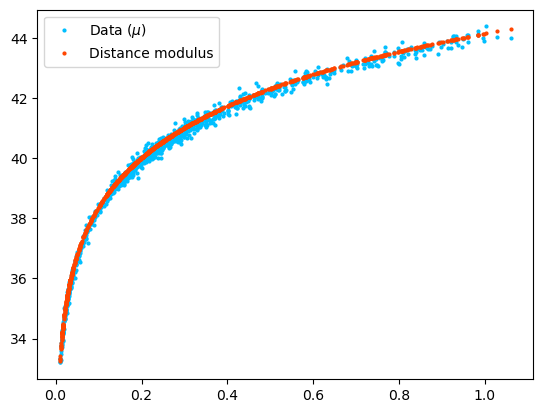

In [360]:
def get_mu(z,H0,Omega_m,Omega_r,w0,wa):
    #z=np.linspace(np.min(z),np.max(z),1000)
    comoving_distance=[]
    distance_modulus=[]
    '''
    for i in range(len(z)):
        comoving_distance.append(Dc_w0waCDM(hubble_function,z[i],Omega_m,Omega_r,w0,wa,H0))
        #print(comoving_distance[i])
        if comoving_distance[i]<=0:
            print(f"Invalid distance value: {comoving_distance[i]} for index {i} with redshift {z[i]}")
        distance_modulus.append(5*np.log10(comoving_distance[i]*(1+z[i]))+25)
        #print(distance_modulus[i])
    '''
    #'''
    for i in range(len(z)):
        # Compute comoving distance
        dc = Dc_w0waCDM(hubble_function, z[i], Omega_m, Omega_r, w0, wa, H0)
        comoving_distance.append(dc)

        # Calculate distance * (1 + z)
        distance = dc * (1 + z[i])
        if distance <= 0:
            print(f"Error at index {i}: Invalid distance value {distance} for comoving_distance {dc} and redshift {z[i]}")
            sys.exit("Stopping execution due to invalid distance value.")

        # Compute distance modulus
        modulus = 5 * np.log10(distance) + 25
        distance_modulus.append(modulus)
    #'''
    return np.array(distance_modulus)

#distance modulus of the data: mu_data=mb-M with M the absolute magnitude of a type Ia supernova, so M=-19.3
M=-19.3
mu_data=mb-M

plt.plot(z_data,mu_data,'o',markersize=2,color='deepskyblue',label='Data ($\mu$)')
plt.plot(z_data,get_mu(z_data,68,0.319,0,-1,0),'o',markersize=2,color='orangered',label='Distance modulus')
plt.legend()
plt.show()

### Prior

In [361]:
def log_prior(params):
    H0, Omega_m, Omega_r, w0, wa = params
    if 0 < H0 < 100 or 0 < Omega_m < 1 or -1e-3 < Omega_r < 1 or -2 < w0 < 0 or -2 < wa < 2:
        return 0
    '''
    if 0 < H0 < 100:
        print('H0')
        return 0
    if 0 < Omega_m < 1:
        print('Omega_m')
        return 0
    if 0 < Omega_r < 1:
        print('Omega_r')
        return 0
    if -3 < w0 < 0:
        print('w0')
        return 0
    if -3 < wa < 3:
        print('wa')
        return 0
    '''
    return -np.inf

### Likelihood

In [362]:
def log_likelihood(params,z,d,cov_inv):
    H0,Omega_m,Omega_r,w0,wa=params
    if H0<0:
        print(f"H0 < 0: {H0}")
        return -np.inf
    if Omega_m<0:
        #print(f"Omega_m out of bounds: {Omega_m}")
        return -np.inf
    if Omega_r<0:
        #print(f"Omega_r out of bounds: {Omega_r}")
        return -np.inf
    mu=get_mu(z,H0,Omega_m,Omega_r,w0,wa)
    diff=d-mu
    #return -0.5 * diff @ cov_inv @ diff
    term1 = -0.5 * diff @ cov_inv @ diff
    term2 = 0.5 * ((np.ones_like(diff) @ cov_inv @ diff) ** 2) / (np.ones_like(diff) @ cov_inv @ np.ones_like(diff))
    #return term1 + term2
    if np.any(np.isnan(params)):
        print(f"NaN value found in params: {params}")
        return -np.inf
    if len(z)==len(z_data):
        return term1+term2
    else:
        return term1

### Posterior

In [363]:
def log_posterior(params,z,d,cov_inv):
    prior = log_prior(params)
    #check for NaNs
    if any(np.isnan(params)):
        print(f"NaNs in params: {params}")
    if np.isnan(prior):
        print(f"NaN in prior: {prior}")
    if np.isnan(log_likelihood(params,z,d,cov_inv)):
        print(f"NaN in likelihood: {log_likelihood(params,z,d,cov_inv)}")
        return prior
    if np.isfinite(prior):
        return prior + log_likelihood(params,z,d,cov_inv)
    return prior

### $\chi^2$

In [364]:
def chi(params,z,d,cov_inv):
    return -2*log_posterior(params,z,d,cov_inv)

### Parameter Optimization

In [365]:
initial_guess = [68, 0.319, 0, -0.5, -1]

#result = minimize(lambda params: -log_likelihood(params,z_data,mu_data,Sigma_inv), initial_guess, method='Powell')
result = minimize(chi, initial_guess, args=(z_data, mu_data, Sigma_inv), method='Powell')
best_fit_params = result.x

mu_model_best = get_mu(z_data, *best_fit_params)

/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2577: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


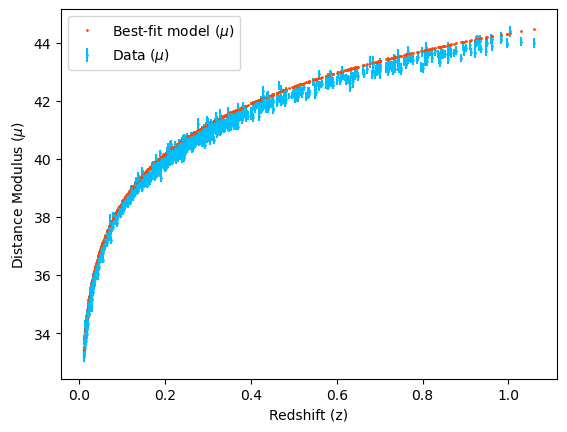

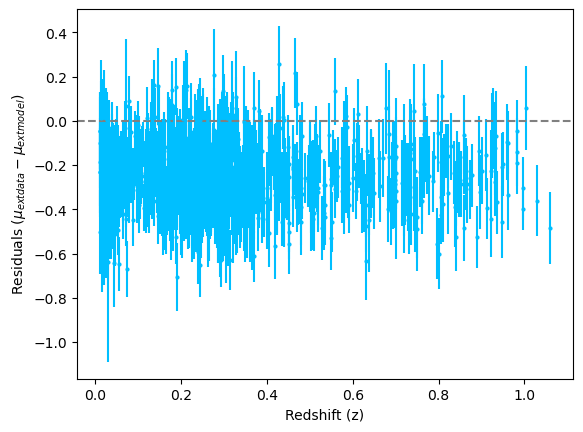

--------------------------------------
Best-fit parameters:
H0: 64.20432368676946
Omega_m: 0.014246991319508524
Omega_r: 0.027893502947820524
w0: -0.8542416334903112
wa: 1.1651510729050742
--------------------------------------
Chi-square: 1011.1560067481591
Degrees of freedom: 1017
Reduced chi-square: 0.9942536939509923
--------------------------------------


In [366]:
plt.errorbar(z_data, mu_data, yerr=dmb, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data, mu_model_best, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals = mu_data - mu_model_best
plt.errorbar(z_data, residuals, yerr=dmb, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters:")
print("H0:", best_fit_params[0])
print("Omega_m:", best_fit_params[1])
print("Omega_r:", best_fit_params[2])
print("w0:", best_fit_params[3])
print("wa:", best_fit_params[4])
print("--------------------------------------")
chi2 = -2 * log_posterior(best_fit_params, z_data, mu_data, Sigma_inv)
print("Chi-square:", chi2)
print("Degrees of freedom:", len(z_data) - len(best_fit_params))
print("Reduced chi-square:", chi2 / (len(z_data) - len(best_fit_params)))
print("--------------------------------------")

## $z<0.4$

In [367]:
#array with all the redshift in z_data < 0.4
z_data_low=[]
mu_data_low=[]
dmb_low=[]
for i in range(len(z_data)):
    if z_data[i]<0.4:
        z_data_low.append(z_data[i])
        mu_data_low.append(mu_data[i])
        dmb_low.append(dmb[i])

#array with all the redshift in z_data > 0.4
z_data_high=[]
mu_data_high=[]
dmb_high=[]
for i in range(len(z_data)):
    if z_data[i]>0.4:
        z_data_high.append(z_data[i])
        mu_data_high.append(mu_data[i])
        dmb_high.append(dmb[i])

z_data_low=np.array(z_data_low)
mu_data_low=np.array(mu_data_low)
dmb_low=np.array(dmb_low)

z_data_high=np.array(z_data_high)
mu_data_high=np.array(mu_data_high)
dmb_high=np.array(dmb_high)

#covariance matrix
Sigma_low = np.diag(dmb_low**2)
Sigma_inv_low = np.linalg.inv(Sigma_low)

Sigma_high = np.diag(dmb_high**2)
Sigma_inv_high = np.linalg.inv(Sigma_high)

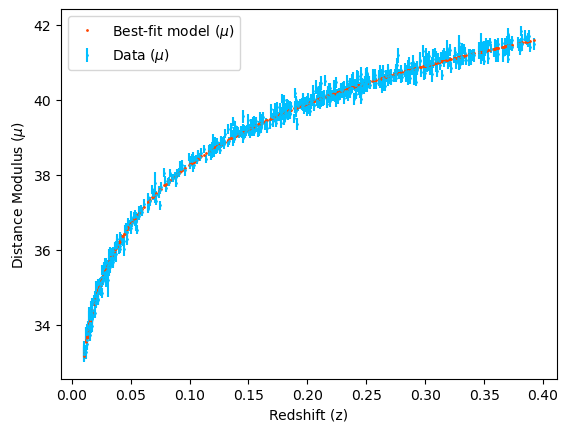

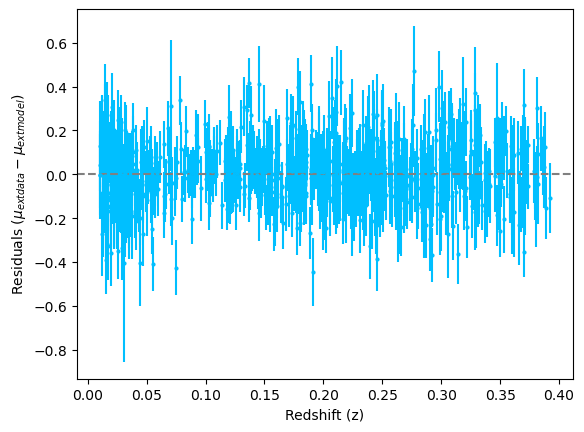

--------------------------------------
Best-fit parameters (low redshift):
H0: 71.24305640460045
Omega_m: 0.00029297764555809
Omega_r: 1.971389476235178e-05
w0: -0.6187860390901757
wa: 0.014925211187456027
--------------------------------------
Chi-square (low redshift): 788.0831525167548
Degrees of freedom (low redshift): 761
Reduced chi-square (low redshift): 1.0355888994963927
--------------------------------------


In [368]:
result_low = minimize(chi, initial_guess, args=(z_data_low, mu_data_low, Sigma_inv_low), method='Powell')
best_fit_params_low = result_low.x

mu_model_best_low = get_mu(z_data_low, *best_fit_params_low)

plt.errorbar(z_data_low, mu_data_low, yerr=dmb_low, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data_low, mu_model_best_low, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals_low = mu_data_low - mu_model_best_low
plt.errorbar(z_data_low, residuals_low, yerr=dmb_low, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters (low redshift):")
print("H0:", best_fit_params_low[0])
print("Omega_m:", best_fit_params_low[1])
print("Omega_r:", best_fit_params_low[2])
print("w0:", best_fit_params_low[3])
print("wa:", best_fit_params_low[4])
print("--------------------------------------")
chi2_low = -2 * log_likelihood(best_fit_params_low, z_data_low, mu_data_low, Sigma_inv_low)
print("Chi-square (low redshift):", chi2_low)
print("Degrees of freedom (low redshift):", len(z_data_low) - len(best_fit_params_low))
print("Reduced chi-square (low redshift):", chi2_low / (len(z_data_low) - len(best_fit_params_low)))
print("--------------------------------------")

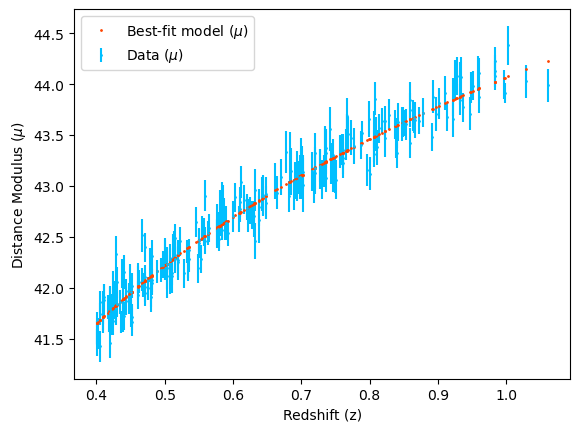

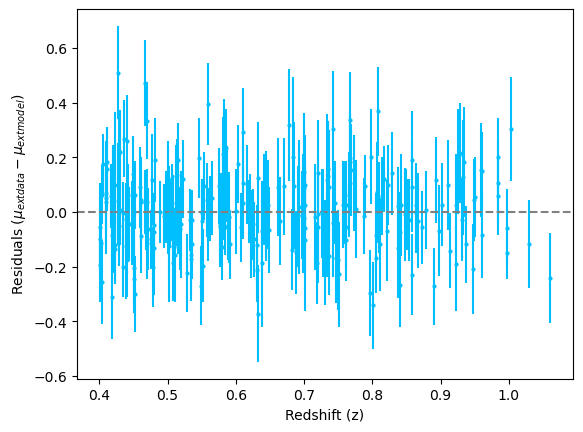

--------------------------------------
Best-fit parameters (high redshift):
H0: 67.18748178368465
Omega_m: 0.2759692032181486
Omega_r: 5.320203182497212e-06
w0: -0.4711598546202483
wa: -1.2340188289556258
--------------------------------------
Chi-square (high redshift): 230.71838418442871
Degrees of freedom (high redshift): 251
Reduced chi-square (high redshift): 0.9191967497387599
--------------------------------------


In [369]:
result_high = minimize(chi, initial_guess, args=(z_data_high, mu_data_high, Sigma_inv_high), method='Powell')
best_fit_params_high = result_high.x

mu_model_best_high = get_mu(z_data_high, *best_fit_params_high)

plt.errorbar(z_data_high, mu_data_high, yerr=dmb_high, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data_high, mu_model_best_high, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals_high = mu_data_high - mu_model_best_high
plt.errorbar(z_data_high, residuals_high, yerr=dmb_high, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters (high redshift):")
print("H0:", best_fit_params_high[0])
print("Omega_m:", best_fit_params_high[1])
print("Omega_r:", best_fit_params_high[2])
print("w0:", best_fit_params_high[3])
print("wa:", best_fit_params_high[4])
print("--------------------------------------")
chi2_high = -2 * log_likelihood(best_fit_params_high, z_data_high, mu_data_high, Sigma_inv_high)
print("Chi-square (high redshift):", chi2_high)
print("Degrees of freedom (high redshift):", len(z_data_high) - len(best_fit_params_high))
print("Reduced chi-square (high redshift):", chi2_high / (len(z_data_high) - len(best_fit_params_high)))
print("--------------------------------------")

## MCMC

In [370]:
'''
#Monte Carlo Markov Chain
n_walkers = 100
n_steps = 1000
n_params = len(initial_guess)
walkers = np.random.randn(n_walkers, n_params) * 1e-4 + initial_guess

for i in range(n_walkers):
    walkers[i] = result.x

chain = np.zeros((n_walkers, n_steps, n_params))
chain[:, 0, :] = walkers

for i in range(1, n_steps):
    for j in range(n_walkers):
        current_params = chain[j, i - 1, :]
        proposed_params = current_params + np.random.randn(n_params) * 0.1
        log_prob_current = log_posterior(current_params, z_data, mu_data, Sigma_inv)
        log_prob_proposed = log_posterior(proposed_params, z_data, mu_data, Sigma_inv)
        
        if log_prob_proposed > log_prob_current:
            chain[j, i, :] = proposed_params
        else:
            accept_prob = np.exp(log_prob_proposed - log_prob_current)
            if np.random.rand() < accept_prob:
                chain[j, i, :] = proposed_params
            else:
                chain[j, i, :] = current_params

# Plot the chains
for i in range(n_params):
    plt.figure()
    for j in range(n_walkers):
        plt.plot(chain[j, :, i], alpha=0.5)
    plt.xlabel('Step')
    plt.ylabel(f'Parameter {i}')
    plt.show()
'''

"\n#Monte Carlo Markov Chain\nn_walkers = 100\nn_steps = 1000\nn_params = len(initial_guess)\nwalkers = np.random.randn(n_walkers, n_params) * 1e-4 + initial_guess\n\nfor i in range(n_walkers):\n    walkers[i] = result.x\n\nchain = np.zeros((n_walkers, n_steps, n_params))\nchain[:, 0, :] = walkers\n\nfor i in range(1, n_steps):\n    for j in range(n_walkers):\n        current_params = chain[j, i - 1, :]\n        proposed_params = current_params + np.random.randn(n_params) * 0.1\n        log_prob_current = log_posterior(current_params, z_data, mu_data, Sigma_inv)\n        log_prob_proposed = log_posterior(proposed_params, z_data, mu_data, Sigma_inv)\n        \n        if log_prob_proposed > log_prob_current:\n            chain[j, i, :] = proposed_params\n        else:\n            accept_prob = np.exp(log_prob_proposed - log_prob_current)\n            if np.random.rand() < accept_prob:\n                chain[j, i, :] = proposed_params\n            else:\n                chain[j, i, :] =

In [371]:
# Initialize the MCMC sampler
initial = np.array([68, 0.319, 0, -0.5, -1])
ndim = len(initial)
nwalkers = 50
#pos = initial + 1e-1 * np.random.randn(nwalkers, ndim)

# Separate standard deviations for different parameter groups
std_H0= 1e-8
std_Om0 = 1e-2
std_Omr = 1e-7
std_w0_wa = 1e-1

# Create the initial positions with different standard deviations
pos = np.empty((nwalkers, ndim))
pos[:, 0] = initial[0] + std_H0 * np.random.randn(nwalkers)
pos[:, 1] = initial[1] + std_Om0 * np.random.randn(nwalkers)
pos[:, 2] = initial[2] + std_Omr * np.random.randn(nwalkers)
pos[:, 3] = initial[3] + std_w0_wa * np.random.randn(nwalkers)
pos[:, 4] = initial[4] + std_w0_wa * np.random.randn(nwalkers)

#'''
# Check initial likelihoods
for i in range(nwalkers):
    print(log_likelihood(pos[i], z_data, mu_data, Sigma_inv))

# Check initial posteriors
for i in range(nwalkers):
    print(log_posterior(pos[i], z_data, mu_data, Sigma_inv))
#'''

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z_data, mu_data, Sigma_inv))

-inf
-684.7405353797604
-inf
-568.5193767354536
-inf
-inf
-inf
-605.4469975655504
-inf
-598.8443085347019
-inf
-inf
-681.4669783041927
-inf
-626.21448306732
-540.2311140189967
-557.1187163153575
-inf
-inf
-inf
-688.4082232089432
-inf
-inf
-595.8747810506921
-563.5041848485597
-inf
-inf
-inf
-523.7631041484452
-623.3902462354741
-591.8332798465262
-inf
-706.0759375268692
-inf
-inf
-707.2113429249101
-561.281233856209
-602.2349435196685
-641.8699056889355
-558.3385308108572
-641.4114496585694
-681.9695974317942
-604.944224522466
-536.2935737833635
-inf
-616.3984650779947
-inf
-inf
-inf
-inf
-inf
-684.7405353797604
-inf
-568.5193767354536
-inf
-inf
-inf
-605.4469975655504
-inf
-598.8443085347019
-inf
-inf
-681.4669783041927
-inf
-626.21448306732
-540.2311140189967
-557.1187163153575
-inf
-inf
-inf
-688.4082232089432
-inf
-inf
-595.8747810506921
-563.5041848485597
-inf
-inf
-inf
-523.7631041484452
-623.3902462354741
-591.8332798465262
-inf
-706.0759375268692
-inf
-inf
-707.2113429249101
-5

In [372]:
# Run the MCMC sampler
nsteps = 1000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=200,thin=10,flat=True)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
 46%|████▌     | 462/1000 [43:05<48:43,  5.43s/it]  

H0 < 0: -7.814468053348065
H0 < 0: -7.814468053348065


 47%|████▋     | 469/1000 [43:42<47:16,  5.34s/it]

H0 < 0: -33.40448855525315
H0 < 0: -33.40448855525315
H0 < 0: -16.909367951969898
H0 < 0: -16.909367951969898
H0 < 0: -8.974202758218766
H0 < 0: -8.974202758218766


 47%|████▋     | 474/1000 [44:12<51:29,  5.87s/it]

H0 < 0: -62.546408648295696
H0 < 0: -62.546408648295696


 48%|████▊     | 477/1000 [44:28<48:28,  5.56s/it]

H0 < 0: -27.126536744284692
H0 < 0: -27.126536744284692


 48%|████▊     | 478/1000 [44:33<47:01,  5.41s/it]

H0 < 0: -6.469942080798845
H0 < 0: -6.469942080798845
H0 < 0: -1.4528709006158635
H0 < 0: -1.4528709006158635


 48%|████▊     | 479/1000 [44:38<45:52,  5.28s/it]

H0 < 0: -2.3869823733676867
H0 < 0: -2.3869823733676867


 48%|████▊     | 480/1000 [44:44<46:24,  5.36s/it]

H0 < 0: -24.247054022834007
H0 < 0: -24.247054022834007
H0 < 0: -3.4345916492035826
H0 < 0: -3.4345916492035826


 48%|████▊     | 482/1000 [44:55<47:14,  5.47s/it]

H0 < 0: -11.156512168350332
H0 < 0: -11.156512168350332


 48%|████▊     | 483/1000 [45:00<47:17,  5.49s/it]

H0 < 0: -10.206610203205543
H0 < 0: -10.206610203205543
H0 < 0: -3.3090097280920645
H0 < 0: -3.3090097280920645


 48%|████▊     | 484/1000 [45:06<46:40,  5.43s/it]

H0 < 0: -2.008944853329197
H0 < 0: -2.008944853329197


 48%|████▊     | 485/1000 [45:11<46:43,  5.44s/it]

H0 < 0: -10.326526468125167
H0 < 0: -10.326526468125167
H0 < 0: -56.3433335538669
H0 < 0: -56.3433335538669
H0 < 0: -15.8035975912521
H0 < 0: -15.8035975912521


 49%|████▊     | 486/1000 [45:16<46:13,  5.40s/it]

H0 < 0: -0.5945370275262007
H0 < 0: -0.5945370275262007
H0 < 0: -10.26835341467698
H0 < 0: -10.26835341467698


 49%|████▊     | 487/1000 [45:22<47:20,  5.54s/it]

H0 < 0: -70.23333912179748
H0 < 0: -70.23333912179748
H0 < 0: -24.803611520583452
H0 < 0: -24.803611520583452


 49%|████▉     | 488/1000 [45:28<46:19,  5.43s/it]

H0 < 0: -2.585645554811066
H0 < 0: -2.585645554811066
H0 < 0: -3.500447776511969
H0 < 0: -3.500447776511969
H0 < 0: -8.083957279424524
H0 < 0: -8.083957279424524
H0 < 0: -21.063650366028128
H0 < 0: -21.063650366028128


 49%|████▉     | 489/1000 [45:32<44:29,  5.22s/it]

H0 < 0: -8.209364893507512
H0 < 0: -8.209364893507512
H0 < 0: -1.8659025154852458
H0 < 0: -1.8659025154852458
H0 < 0: -11.582863160078361
H0 < 0: -11.582863160078361


 49%|████▉     | 490/1000 [45:38<44:47,  5.27s/it]

H0 < 0: -45.799934341221444
H0 < 0: -45.799934341221444


 49%|████▉     | 491/1000 [45:43<45:32,  5.37s/it]

H0 < 0: -6.804041131541375
H0 < 0: -6.804041131541375


 49%|████▉     | 492/1000 [45:49<45:57,  5.43s/it]

H0 < 0: -13.423812479761324
H0 < 0: -13.423812479761324
H0 < 0: -20.043206105117548
H0 < 0: -20.043206105117548
H0 < 0: -40.062290989754814
H0 < 0: -40.062290989754814
H0 < 0: -45.370155653370816
H0 < 0: -45.370155653370816
H0 < 0: -16.414293954805686
H0 < 0: -16.414293954805686


 49%|████▉     | 493/1000 [45:54<44:52,  5.31s/it]

H0 < 0: -3.4784387402835932
H0 < 0: -3.4784387402835932


 49%|████▉     | 494/1000 [45:59<45:03,  5.34s/it]

H0 < 0: -6.250898059096649
H0 < 0: -6.250898059096649
H0 < 0: -24.76200292556897
H0 < 0: -24.76200292556897
H0 < 0: -19.99187934809018
H0 < 0: -19.99187934809018
H0 < 0: -16.961676912020067
H0 < 0: -16.961676912020067
H0 < 0: -77.2087694493897
H0 < 0: -77.2087694493897
H0 < 0: -108.59154003578027
H0 < 0: -108.59154003578027


 50%|████▉     | 495/1000 [46:04<44:23,  5.27s/it]

H0 < 0: -20.32201129824827
H0 < 0: -20.32201129824827


 50%|████▉     | 496/1000 [46:09<42:32,  5.07s/it]

H0 < 0: -40.94771865511811
H0 < 0: -40.94771865511811
H0 < 0: -14.779400477177973
H0 < 0: -14.779400477177973


 50%|████▉     | 497/1000 [46:15<44:05,  5.26s/it]

H0 < 0: -4.267011685724341
H0 < 0: -4.267011685724341
H0 < 0: -137.761395627079
H0 < 0: -137.761395627079


 50%|████▉     | 498/1000 [46:20<43:48,  5.24s/it]

H0 < 0: -51.326706786821404
H0 < 0: -51.326706786821404
H0 < 0: -16.009050036841103
H0 < 0: -16.009050036841103
H0 < 0: -11.522893635559612
H0 < 0: -11.522893635559612
H0 < 0: -97.37761012919725
H0 < 0: -97.37761012919725
H0 < 0: -11.53324157005332
H0 < 0: -11.53324157005332


 50%|█████     | 500/1000 [46:30<43:43,  5.25s/it]

H0 < 0: -18.241144825803076
H0 < 0: -18.241144825803076
H0 < 0: -5.79400030394531
H0 < 0: -5.79400030394531
H0 < 0: -61.6523144128315
H0 < 0: -61.6523144128315
H0 < 0: -31.084600696801914
H0 < 0: -31.084600696801914
H0 < 0: -0.542053920686314
H0 < 0: -0.542053920686314
H0 < 0: -37.479861872604545
H0 < 0: -37.479861872604545


 50%|█████     | 501/1000 [46:35<43:39,  5.25s/it]

H0 < 0: -22.02731219066331
H0 < 0: -22.02731219066331
H0 < 0: -22.48052012628959
H0 < 0: -22.48052012628959
H0 < 0: -55.76499236502298
H0 < 0: -55.76499236502298


 50%|█████     | 502/1000 [46:41<44:02,  5.31s/it]

H0 < 0: -0.26305654067469675
H0 < 0: -0.26305654067469675
H0 < 0: -19.762956138287677
H0 < 0: -19.762956138287677
H0 < 0: -3.8012660178296755
H0 < 0: -3.8012660178296755


 50%|█████     | 503/1000 [46:47<44:39,  5.39s/it]

H0 < 0: -4.693911803789234
H0 < 0: -4.693911803789234
H0 < 0: -75.17942130531156
H0 < 0: -75.17942130531156
H0 < 0: -85.80809014409573
H0 < 0: -85.80809014409573
H0 < 0: -12.135507415592166
H0 < 0: -12.135507415592166


 50%|█████     | 504/1000 [46:51<43:17,  5.24s/it]

H0 < 0: -6.4188338069618
H0 < 0: -6.4188338069618
H0 < 0: -96.20259948549915
H0 < 0: -96.20259948549915
H0 < 0: -37.8302747788657
H0 < 0: -37.8302747788657


 50%|█████     | 505/1000 [46:57<43:49,  5.31s/it]

H0 < 0: -32.14041701517297
H0 < 0: -32.14041701517297
H0 < 0: -27.932129769288522
H0 < 0: -27.932129769288522
H0 < 0: -4.703018034208611
H0 < 0: -4.703018034208611


 51%|█████     | 506/1000 [47:02<43:44,  5.31s/it]

H0 < 0: -60.635791910029894
H0 < 0: -60.635791910029894
H0 < 0: -50.25313115981372
H0 < 0: -50.25313115981372
H0 < 0: -9.437743120434241
H0 < 0: -9.437743120434241
H0 < 0: -6.088113719055372
H0 < 0: -6.088113719055372
H0 < 0: -5.488760511880983
H0 < 0: -5.488760511880983


 51%|█████     | 507/1000 [47:07<43:31,  5.30s/it]

H0 < 0: -70.15703391334353
H0 < 0: -70.15703391334353
H0 < 0: -60.872311553942154
H0 < 0: -60.872311553942154
H0 < 0: -22.933732455645483
H0 < 0: -22.933732455645483
H0 < 0: -59.29171528157269
H0 < 0: -59.29171528157269


 51%|█████     | 508/1000 [47:13<43:41,  5.33s/it]

H0 < 0: -4.278204107130918
H0 < 0: -4.278204107130918
H0 < 0: -16.071644279605792
H0 < 0: -16.071644279605792
H0 < 0: -22.055733769999236
H0 < 0: -22.055733769999236
H0 < 0: -152.75357619790225
H0 < 0: -152.75357619790225


 51%|█████     | 509/1000 [47:18<43:09,  5.27s/it]

H0 < 0: -29.512625804254597
H0 < 0: -29.512625804254597
H0 < 0: -30.247067310727374
H0 < 0: -30.247067310727374
H0 < 0: -11.890833433434103
H0 < 0: -11.890833433434103
H0 < 0: -2.233732933738551
H0 < 0: -2.233732933738551
H0 < 0: -1.0875510520643132
H0 < 0: -1.0875510520643132


 51%|█████     | 510/1000 [47:23<43:19,  5.30s/it]

H0 < 0: -2.484653985234928
H0 < 0: -2.484653985234928
H0 < 0: -41.131340560542355
H0 < 0: -41.131340560542355
H0 < 0: -35.30015560211693
H0 < 0: -35.30015560211693
H0 < 0: -38.16550734552334
H0 < 0: -38.16550734552334


 51%|█████     | 511/1000 [47:29<43:53,  5.38s/it]

H0 < 0: -84.9394036398968
H0 < 0: -84.9394036398968
H0 < 0: -77.22665207257273
H0 < 0: -77.22665207257273


 51%|█████     | 512/1000 [47:35<44:37,  5.49s/it]

H0 < 0: -40.93823316621027
H0 < 0: -40.93823316621027
H0 < 0: -90.0013110404019
H0 < 0: -90.0013110404019
H0 < 0: -21.782910595124136
H0 < 0: -21.782910595124136
H0 < 0: -37.281683866836545
H0 < 0: -37.281683866836545
H0 < 0: -7.453303847294819
H0 < 0: -7.453303847294819
H0 < 0: -18.895817415121584
H0 < 0: -18.895817415121584


 51%|█████▏    | 513/1000 [47:40<43:27,  5.35s/it]

H0 < 0: -27.689145690191566
H0 < 0: -27.689145690191566
H0 < 0: -24.390924207097157
H0 < 0: -24.390924207097157
H0 < 0: -1.8594039073443351
H0 < 0: -1.8594039073443351


 51%|█████▏    | 514/1000 [47:45<43:15,  5.34s/it]

H0 < 0: -52.34501935496348
H0 < 0: -52.34501935496348
H0 < 0: -108.78206569992358
H0 < 0: -108.78206569992358
H0 < 0: -13.55010186771166
H0 < 0: -13.55010186771166
H0 < 0: -22.6205735174737
H0 < 0: -22.6205735174737


 52%|█████▏    | 515/1000 [47:50<42:15,  5.23s/it]

H0 < 0: -8.989943983957886
H0 < 0: -8.989943983957886
H0 < 0: -43.01829543270543
H0 < 0: -43.01829543270543
H0 < 0: -48.37802703204409
H0 < 0: -48.37802703204409
H0 < 0: -29.55313974169006
H0 < 0: -29.55313974169006
H0 < 0: -25.400615936689775
H0 < 0: -25.400615936689775
H0 < 0: -34.8808677658611
H0 < 0: -34.8808677658611
H0 < 0: -61.06918804428979
H0 < 0: -61.06918804428979


 52%|█████▏    | 516/1000 [47:55<41:39,  5.16s/it]

H0 < 0: -24.036918824285948
H0 < 0: -24.036918824285948
H0 < 0: -17.277506497936372
H0 < 0: -17.277506497936372
H0 < 0: -90.22884432794882
H0 < 0: -90.22884432794882
H0 < 0: -3.926543513081384
H0 < 0: -3.926543513081384
H0 < 0: -26.332072040079808
H0 < 0: -26.332072040079808
H0 < 0: -28.528222095749015
H0 < 0: -28.528222095749015
H0 < 0: -39.086716823783235
H0 < 0: -39.086716823783235


 52%|█████▏    | 517/1000 [48:00<40:38,  5.05s/it]

H0 < 0: -29.98211646698836
H0 < 0: -29.98211646698836
H0 < 0: -59.9404537917288
H0 < 0: -59.9404537917288
H0 < 0: -5.104271042129696
H0 < 0: -5.104271042129696
H0 < 0: -58.76216972414659
H0 < 0: -58.76216972414659


 52%|█████▏    | 518/1000 [48:05<39:46,  4.95s/it]

H0 < 0: -30.579592488398333
H0 < 0: -30.579592488398333
H0 < 0: -26.709308455977265
H0 < 0: -26.709308455977265
H0 < 0: -12.42109647049233
H0 < 0: -12.42109647049233
H0 < 0: -4.407441244150647
H0 < 0: -4.407441244150647
H0 < 0: -26.237425320417174
H0 < 0: -26.237425320417174
H0 < 0: -41.874720946362515
H0 < 0: -41.874720946362515
H0 < 0: -53.54717573010063
H0 < 0: -53.54717573010063
H0 < 0: -3.7770784210070616
H0 < 0: -3.7770784210070616
H0 < 0: -16.084423915849754
H0 < 0: -16.084423915849754
H0 < 0: -7.6361455162209495
H0 < 0: -7.6361455162209495
H0 < 0: -55.87135945685091
H0 < 0: -55.87135945685091
H0 < 0: -54.47521417103468
H0 < 0: -54.47521417103468
H0 < 0: -33.22484233101051
H0 < 0: -33.22484233101051


 52%|█████▏    | 519/1000 [48:10<40:11,  5.01s/it]

H0 < 0: -25.39450904863638
H0 < 0: -25.39450904863638
H0 < 0: -2.859141492474137
H0 < 0: -2.859141492474137
H0 < 0: -8.630063177100936
H0 < 0: -8.630063177100936
H0 < 0: -17.754754331233585
H0 < 0: -17.754754331233585
H0 < 0: -82.75827670030208
H0 < 0: -82.75827670030208
H0 < 0: -24.05938427852749
H0 < 0: -24.05938427852749
H0 < 0: -38.754624633080255
H0 < 0: -38.754624633080255
H0 < 0: -12.810834729006295
H0 < 0: -12.810834729006295


 52%|█████▏    | 520/1000 [48:15<41:03,  5.13s/it]

H0 < 0: -41.29599185832129
H0 < 0: -41.29599185832129
H0 < 0: -95.5861376087588
H0 < 0: -95.5861376087588
H0 < 0: -9.85185676882763
H0 < 0: -9.85185676882763
H0 < 0: -29.638698338415153
H0 < 0: -29.638698338415153
H0 < 0: -8.265348314573288
H0 < 0: -8.265348314573288


 52%|█████▏    | 521/1000 [48:20<41:38,  5.22s/it]

H0 < 0: -55.78092268640859
H0 < 0: -55.78092268640859
H0 < 0: -225.57984415146103
H0 < 0: -225.57984415146103
H0 < 0: -19.36956864978478
H0 < 0: -19.36956864978478
H0 < 0: -58.50476625043126
H0 < 0: -58.50476625043126
H0 < 0: -33.64329791632579
H0 < 0: -33.64329791632579
H0 < 0: -1.5060176912314063
H0 < 0: -1.5060176912314063
H0 < 0: -75.78549116260096
H0 < 0: -75.78549116260096
H0 < 0: -15.650496787714545
H0 < 0: -15.650496787714545


 52%|█████▏    | 522/1000 [48:26<41:05,  5.16s/it]

H0 < 0: -14.046536220775664
H0 < 0: -14.046536220775664
H0 < 0: -42.437327133704144
H0 < 0: -42.437327133704144
H0 < 0: -9.35937614260287
H0 < 0: -9.35937614260287
H0 < 0: -25.25194388027407
H0 < 0: -25.25194388027407


 52%|█████▏    | 523/1000 [48:32<43:16,  5.44s/it]

H0 < 0: -29.87866068004776
H0 < 0: -29.87866068004776
H0 < 0: -55.668911347988555
H0 < 0: -55.668911347988555
H0 < 0: -83.42688318039905
H0 < 0: -83.42688318039905
H0 < 0: -12.81124768601628
H0 < 0: -12.81124768601628
H0 < 0: -19.172913771914295
H0 < 0: -19.172913771914295
H0 < 0: -26.104586982870828
H0 < 0: -26.104586982870828
H0 < 0: -15.893047539351954
H0 < 0: -15.893047539351954
H0 < 0: -7.047094287622961
H0 < 0: -7.047094287622961
H0 < 0: -0.4603516694268066
H0 < 0: -0.4603516694268066
H0 < 0: -22.18395667001522
H0 < 0: -22.18395667001522
H0 < 0: -22.216521765366878
H0 < 0: -22.216521765366878


 52%|█████▏    | 524/1000 [48:37<41:52,  5.28s/it]

H0 < 0: -30.77114231687601
H0 < 0: -30.77114231687601
H0 < 0: -38.37298193653318
H0 < 0: -38.37298193653318
H0 < 0: -135.23288562352113
H0 < 0: -135.23288562352113
H0 < 0: -83.76256639614104
H0 < 0: -83.76256639614104
H0 < 0: -3.439866254602123
H0 < 0: -3.439866254602123
H0 < 0: -27.310666858178934
H0 < 0: -27.310666858178934
H0 < 0: -18.157662529343696
H0 < 0: -18.157662529343696
H0 < 0: -13.780027482656337
H0 < 0: -13.780027482656337
H0 < 0: -87.59697679717183
H0 < 0: -87.59697679717183


 52%|█████▎    | 525/1000 [48:42<41:26,  5.24s/it]

H0 < 0: -56.78115368980622
H0 < 0: -56.78115368980622
H0 < 0: -20.899491716680174
H0 < 0: -20.899491716680174
H0 < 0: -23.954754416865285
H0 < 0: -23.954754416865285
H0 < 0: -181.7184108827434
H0 < 0: -181.7184108827434
H0 < 0: -16.513993153672672
H0 < 0: -16.513993153672672
H0 < 0: -17.804358744757465
H0 < 0: -17.804358744757465
H0 < 0: -27.998126792099782
H0 < 0: -27.998126792099782
H0 < 0: -7.667696386559967
H0 < 0: -7.667696386559967


 53%|█████▎    | 526/1000 [48:47<41:01,  5.19s/it]

H0 < 0: -72.17795616339697
H0 < 0: -72.17795616339697
H0 < 0: -52.54289826711218
H0 < 0: -52.54289826711218
H0 < 0: -123.31711009054112
H0 < 0: -123.31711009054112


 53%|█████▎    | 527/1000 [48:52<41:07,  5.22s/it]

H0 < 0: -7.360727248539561
H0 < 0: -7.360727248539561
H0 < 0: -16.980562020299914
H0 < 0: -16.980562020299914
H0 < 0: -17.117392309886498
H0 < 0: -17.117392309886498
H0 < 0: -161.08802392480465
H0 < 0: -161.08802392480465
H0 < 0: -296.3847957726113
H0 < 0: -296.3847957726113
H0 < 0: -8.643901874963635
H0 < 0: -8.643901874963635
H0 < 0: -92.49221983892784
H0 < 0: -92.49221983892784


 53%|█████▎    | 528/1000 [48:57<41:18,  5.25s/it]

H0 < 0: -34.29808205796016
H0 < 0: -34.29808205796016
H0 < 0: -24.282274459343654
H0 < 0: -24.282274459343654


 53%|█████▎    | 529/1000 [49:03<42:16,  5.38s/it]

H0 < 0: -129.28226587430953
H0 < 0: -129.28226587430953
H0 < 0: -79.61467466506127
H0 < 0: -79.61467466506127
H0 < 0: -141.74318290609585
H0 < 0: -141.74318290609585
H0 < 0: -31.063795825174537
H0 < 0: -31.063795825174537
H0 < 0: -8.55842011984089
H0 < 0: -8.55842011984089
H0 < 0: -73.48469432497399
H0 < 0: -73.48469432497399


 53%|█████▎    | 530/1000 [49:09<43:37,  5.57s/it]

H0 < 0: -23.3924545727603
H0 < 0: -23.3924545727603
H0 < 0: -86.86896169377502
H0 < 0: -86.86896169377502
H0 < 0: -291.96981606057057
H0 < 0: -291.96981606057057


 53%|█████▎    | 531/1000 [49:15<45:05,  5.77s/it]

H0 < 0: -3.425702497473864
H0 < 0: -3.425702497473864
H0 < 0: -12.079768861283945
H0 < 0: -12.079768861283945
H0 < 0: -59.22637638296737
H0 < 0: -59.22637638296737


 53%|█████▎    | 532/1000 [49:21<44:55,  5.76s/it]

H0 < 0: -5.710933608998175
H0 < 0: -5.710933608998175
H0 < 0: -23.156981948032502
H0 < 0: -23.156981948032502
H0 < 0: -30.420887453596436
H0 < 0: -30.420887453596436
H0 < 0: -120.35642451195713
H0 < 0: -120.35642451195713
H0 < 0: -38.144854177553015
H0 < 0: -38.144854177553015
H0 < 0: -21.587509417908848
H0 < 0: -21.587509417908848
H0 < 0: -47.0721202724597
H0 < 0: -47.0721202724597


 53%|█████▎    | 533/1000 [49:26<44:08,  5.67s/it]

H0 < 0: -3.207968080438903
H0 < 0: -3.207968080438903
H0 < 0: -10.109850631147921
H0 < 0: -10.109850631147921
H0 < 0: -2.8339852719137184
H0 < 0: -2.8339852719137184
H0 < 0: -3.6240545548916714
H0 < 0: -3.6240545548916714


 53%|█████▎    | 534/1000 [49:32<44:49,  5.77s/it]

H0 < 0: -1.5878503924473542
H0 < 0: -1.5878503924473542
H0 < 0: -10.104177816852967
H0 < 0: -10.104177816852967
H0 < 0: -0.24546371967332448
H0 < 0: -0.24546371967332448
H0 < 0: -4.196705980756818
H0 < 0: -4.196705980756818


 54%|█████▎    | 535/1000 [49:38<44:48,  5.78s/it]

H0 < 0: -44.821435621826325
H0 < 0: -44.821435621826325
H0 < 0: -54.168850471067316
H0 < 0: -54.168850471067316
H0 < 0: -14.974097875767
H0 < 0: -14.974097875767
H0 < 0: -224.51204617455983
H0 < 0: -224.51204617455983
H0 < 0: -81.10181280801555
H0 < 0: -81.10181280801555
H0 < 0: -80.85444024260312
H0 < 0: -80.85444024260312
H0 < 0: -19.13095514037839
H0 < 0: -19.13095514037839
H0 < 0: -12.905920495500254
H0 < 0: -12.905920495500254


 54%|█████▎    | 536/1000 [49:44<44:15,  5.72s/it]

H0 < 0: -27.93276947021934
H0 < 0: -27.93276947021934
H0 < 0: -40.99288791855767
H0 < 0: -40.99288791855767
H0 < 0: -113.39670352669856
H0 < 0: -113.39670352669856
H0 < 0: -138.35102638714807
H0 < 0: -138.35102638714807


 54%|█████▎    | 537/1000 [49:50<44:26,  5.76s/it]

H0 < 0: -30.378787745023843
H0 < 0: -30.378787745023843
H0 < 0: -16.098199336053725
H0 < 0: -16.098199336053725
H0 < 0: -6.8137323484749714
H0 < 0: -6.8137323484749714
H0 < 0: -31.579608487305563
H0 < 0: -31.579608487305563


 54%|█████▍    | 538/1000 [49:55<44:02,  5.72s/it]

H0 < 0: -271.0279274738936
H0 < 0: -271.0279274738936
H0 < 0: -24.194704901775864
H0 < 0: -24.194704901775864
H0 < 0: -376.44972826471394
H0 < 0: -376.44972826471394
H0 < 0: -58.12661452496573
H0 < 0: -58.12661452496573
H0 < 0: -9.44073615493646
H0 < 0: -9.44073615493646
H0 < 0: -70.19138176511314
H0 < 0: -70.19138176511314
H0 < 0: -1.7037779339852968
H0 < 0: -1.7037779339852968
H0 < 0: -32.34336471776538
H0 < 0: -32.34336471776538


 54%|█████▍    | 539/1000 [50:01<42:55,  5.59s/it]

H0 < 0: -72.03697020451631
H0 < 0: -72.03697020451631
H0 < 0: -88.34236499069573
H0 < 0: -88.34236499069573
H0 < 0: -7.438865681131276
H0 < 0: -7.438865681131276


 54%|█████▍    | 540/1000 [50:05<41:03,  5.36s/it]

H0 < 0: -10.001285552821912
H0 < 0: -10.001285552821912
H0 < 0: -26.342414332798057
H0 < 0: -26.342414332798057
H0 < 0: -11.323520580346212
H0 < 0: -11.323520580346212
H0 < 0: -32.18568496065541
H0 < 0: -32.18568496065541
H0 < 0: -342.7054955769429
H0 < 0: -342.7054955769429


 54%|█████▍    | 541/1000 [50:11<41:11,  5.38s/it]

H0 < 0: -43.436166914355596
H0 < 0: -43.436166914355596
H0 < 0: -15.19499779140574
H0 < 0: -15.19499779140574
H0 < 0: -33.1775282640409
H0 < 0: -33.1775282640409
H0 < 0: -71.50108388622775
H0 < 0: -71.50108388622775
H0 < 0: -14.228327697837926
H0 < 0: -14.228327697837926
H0 < 0: -429.2034036717944
H0 < 0: -429.2034036717944
H0 < 0: -127.87713592780801
H0 < 0: -127.87713592780801
H0 < 0: -27.09169592998711
H0 < 0: -27.09169592998711


 54%|█████▍    | 542/1000 [50:16<39:56,  5.23s/it]

H0 < 0: -9.709372700920653
H0 < 0: -9.709372700920653
H0 < 0: -32.7761258951827
H0 < 0: -32.7761258951827
H0 < 0: -73.61010206623581
H0 < 0: -73.61010206623581
H0 < 0: -0.20806460984272235
H0 < 0: -0.20806460984272235


 54%|█████▍    | 543/1000 [50:21<39:38,  5.21s/it]

H0 < 0: -380.4787577231504
H0 < 0: -380.4787577231504
H0 < 0: -127.13231752480982
H0 < 0: -127.13231752480982
H0 < 0: -9.328896839736046
H0 < 0: -9.328896839736046
H0 < 0: -19.39699695288627
H0 < 0: -19.39699695288627
H0 < 0: -66.77997243071903
H0 < 0: -66.77997243071903
H0 < 0: -298.7877381349651
H0 < 0: -298.7877381349651
H0 < 0: -21.811008495038095
H0 < 0: -21.811008495038095


 54%|█████▍    | 544/1000 [50:26<39:10,  5.15s/it]

H0 < 0: -78.08752789490757
H0 < 0: -78.08752789490757
H0 < 0: -22.127291074982082
H0 < 0: -22.127291074982082
H0 < 0: -143.4995995781719
H0 < 0: -143.4995995781719
H0 < 0: -19.353579224890893
H0 < 0: -19.353579224890893


 55%|█████▍    | 545/1000 [50:32<41:22,  5.46s/it]

H0 < 0: -48.811337837521535
H0 < 0: -48.811337837521535
H0 < 0: -10.313738399564294
H0 < 0: -10.313738399564294
H0 < 0: -71.28983071279586
H0 < 0: -71.28983071279586
H0 < 0: -15.775272207017963
H0 < 0: -15.775272207017963
H0 < 0: -83.6674178113127
H0 < 0: -83.6674178113127


 55%|█████▍    | 546/1000 [50:37<39:39,  5.24s/it]

H0 < 0: -16.927123766192167
H0 < 0: -16.927123766192167
H0 < 0: -25.367419874277317
H0 < 0: -25.367419874277317
H0 < 0: -68.19475717699686
H0 < 0: -68.19475717699686
H0 < 0: -188.36689753869462
H0 < 0: -188.36689753869462
H0 < 0: -268.02210741104943
H0 < 0: -268.02210741104943
H0 < 0: -30.641067131396454
H0 < 0: -30.641067131396454
H0 < 0: -43.71325226332593
H0 < 0: -43.71325226332593
H0 < 0: -66.79598986689058
H0 < 0: -66.79598986689058


 55%|█████▍    | 547/1000 [50:42<39:59,  5.30s/it]

H0 < 0: -119.53486602903104
H0 < 0: -119.53486602903104
H0 < 0: -71.723466296428
H0 < 0: -71.723466296428
H0 < 0: -148.50442294466836
H0 < 0: -148.50442294466836
H0 < 0: -31.018790473882063
H0 < 0: -31.018790473882063
H0 < 0: -86.07180529082467
H0 < 0: -86.07180529082467
H0 < 0: -68.45008424100848
H0 < 0: -68.45008424100848
H0 < 0: -15.694722352254999
H0 < 0: -15.694722352254999
H0 < 0: -83.63280909469927
H0 < 0: -83.63280909469927
H0 < 0: -17.672729292479147
H0 < 0: -17.672729292479147


 55%|█████▍    | 548/1000 [50:47<39:16,  5.21s/it]

H0 < 0: -12.222791439124165
H0 < 0: -12.222791439124165
H0 < 0: -74.40185803956774
H0 < 0: -74.40185803956774
H0 < 0: -60.55187182703415
H0 < 0: -60.55187182703415
H0 < 0: -70.73041134461752
H0 < 0: -70.73041134461752


 55%|█████▍    | 549/1000 [50:53<41:12,  5.48s/it]

H0 < 0: -124.62008589379195
H0 < 0: -124.62008589379195
H0 < 0: -9.979180907114596
H0 < 0: -9.979180907114596
H0 < 0: -18.00651910066827
H0 < 0: -18.00651910066827
H0 < 0: -63.82891015295999
H0 < 0: -63.82891015295999
H0 < 0: -26.178883654183608
H0 < 0: -26.178883654183608
H0 < 0: -49.07383294863959
H0 < 0: -49.07383294863959


 55%|█████▌    | 550/1000 [50:59<41:18,  5.51s/it]

H0 < 0: -15.131588555308468
H0 < 0: -15.131588555308468
H0 < 0: -93.67142705612864
H0 < 0: -93.67142705612864
H0 < 0: -36.26865451935582
H0 < 0: -36.26865451935582
H0 < 0: -28.20457858849805
H0 < 0: -28.20457858849805
H0 < 0: -22.117065185344515
H0 < 0: -22.117065185344515
H0 < 0: -128.35711408994013
H0 < 0: -128.35711408994013


 55%|█████▌    | 551/1000 [51:04<39:45,  5.31s/it]

H0 < 0: -39.7929799972174
H0 < 0: -39.7929799972174
H0 < 0: -18.210171512827856
H0 < 0: -18.210171512827856
H0 < 0: -170.37997362153817
H0 < 0: -170.37997362153817
H0 < 0: -51.54829178951883
H0 < 0: -51.54829178951883


 55%|█████▌    | 552/1000 [51:09<38:58,  5.22s/it]

H0 < 0: -2.497855941934972
H0 < 0: -2.497855941934972
H0 < 0: -445.064038601771
H0 < 0: -445.064038601771
H0 < 0: -16.52090339186894
H0 < 0: -16.52090339186894
H0 < 0: -14.403700257962328
H0 < 0: -14.403700257962328
H0 < 0: -33.26800273608154
H0 < 0: -33.26800273608154
H0 < 0: -31.17668411653952
H0 < 0: -31.17668411653952
H0 < 0: -25.65399807279303
H0 < 0: -25.65399807279303
H0 < 0: -66.43961395199571
H0 < 0: -66.43961395199571
H0 < 0: -16.919265110742884
H0 < 0: -16.919265110742884


 55%|█████▌    | 553/1000 [51:13<37:15,  5.00s/it]

H0 < 0: -12.749244016851037
H0 < 0: -12.749244016851037
H0 < 0: -5.030201400370224
H0 < 0: -5.030201400370224


 55%|█████▌    | 554/1000 [51:19<38:30,  5.18s/it]

H0 < 0: -48.00362153625355
H0 < 0: -48.00362153625355
H0 < 0: -330.6330534916185
H0 < 0: -330.6330534916185
H0 < 0: -89.1155826427871
H0 < 0: -89.1155826427871
H0 < 0: -23.72011792773725
H0 < 0: -23.72011792773725


 56%|█████▌    | 555/1000 [51:25<39:18,  5.30s/it]

H0 < 0: -79.56132165094385
H0 < 0: -79.56132165094385
H0 < 0: -357.8139262811945
H0 < 0: -357.8139262811945
H0 < 0: -18.102442271136397
H0 < 0: -18.102442271136397
H0 < 0: -18.77158033575111
H0 < 0: -18.77158033575111
H0 < 0: -94.69567346184249
H0 < 0: -94.69567346184249
H0 < 0: -18.177357319683097
H0 < 0: -18.177357319683097


 56%|█████▌    | 556/1000 [51:30<39:14,  5.30s/it]

H0 < 0: -155.87089574889438
H0 < 0: -155.87089574889438
H0 < 0: -1.6294692178331047
H0 < 0: -1.6294692178331047


 56%|█████▌    | 557/1000 [51:35<38:47,  5.25s/it]

H0 < 0: -88.73914300174417
H0 < 0: -88.73914300174417
H0 < 0: -59.40461645470009
H0 < 0: -59.40461645470009
H0 < 0: -55.56158383706598
H0 < 0: -55.56158383706598
H0 < 0: -21.823437725245185
H0 < 0: -21.823437725245185


 56%|█████▌    | 558/1000 [51:41<40:47,  5.54s/it]

H0 < 0: -36.20636209338339
H0 < 0: -36.20636209338339
H0 < 0: -29.608161606858516
H0 < 0: -29.608161606858516
H0 < 0: -84.50822590096249
H0 < 0: -84.50822590096249


 56%|█████▌    | 559/1000 [51:46<39:17,  5.35s/it]

H0 < 0: -46.93087908216259
H0 < 0: -46.93087908216259
H0 < 0: -87.97926344640771
H0 < 0: -87.97926344640771
H0 < 0: -28.179402689084895
H0 < 0: -28.179402689084895
H0 < 0: -27.67345567242242
H0 < 0: -27.67345567242242


 56%|█████▌    | 560/1000 [51:52<40:01,  5.46s/it]

H0 < 0: -195.72557546741433
H0 < 0: -195.72557546741433
H0 < 0: -21.87060830603083
H0 < 0: -21.87060830603083


 56%|█████▌    | 561/1000 [51:58<40:46,  5.57s/it]

H0 < 0: -323.07810489821736
H0 < 0: -323.07810489821736
H0 < 0: -12.756565698126167
H0 < 0: -12.756565698126167
H0 < 0: -118.77730102386872
H0 < 0: -118.77730102386872
H0 < 0: -103.2353804917542
H0 < 0: -103.2353804917542
H0 < 0: -808.9410478252266
H0 < 0: -808.9410478252266
H0 < 0: -484.13748227200654
H0 < 0: -484.13748227200654
H0 < 0: -55.836474897312
H0 < 0: -55.836474897312
H0 < 0: -4.654978507282124
H0 < 0: -4.654978507282124
H0 < 0: -196.8076167930128
H0 < 0: -196.8076167930128


 56%|█████▌    | 562/1000 [52:03<39:25,  5.40s/it]

H0 < 0: -23.592824623875828
H0 < 0: -23.592824623875828
H0 < 0: -138.0059105478078
H0 < 0: -138.0059105478078
H0 < 0: -35.3199660694342
H0 < 0: -35.3199660694342
H0 < 0: -12.89460857851816
H0 < 0: -12.89460857851816
H0 < 0: -449.3500734323593
H0 < 0: -449.3500734323593
H0 < 0: -45.7165464584985
H0 < 0: -45.7165464584985
H0 < 0: -47.30901038447874
H0 < 0: -47.30901038447874


 56%|█████▋    | 563/1000 [52:07<37:58,  5.21s/it]

H0 < 0: -11.106490966802816
H0 < 0: -11.106490966802816
H0 < 0: -305.8841005441118
H0 < 0: -305.8841005441118
H0 < 0: -23.868160692861125
H0 < 0: -23.868160692861125


 56%|█████▋    | 564/1000 [52:13<38:04,  5.24s/it]

H0 < 0: -39.856284558510026
H0 < 0: -39.856284558510026
H0 < 0: -143.6538272308129
H0 < 0: -143.6538272308129
H0 < 0: -47.06886980813195
H0 < 0: -47.06886980813195
H0 < 0: -8.419826992496098
H0 < 0: -8.419826992496098
H0 < 0: -18.164338237476244
H0 < 0: -18.164338237476244
H0 < 0: -200.64750546369805
H0 < 0: -200.64750546369805


 56%|█████▋    | 565/1000 [52:18<38:23,  5.30s/it]

H0 < 0: -153.96649585271496
H0 < 0: -153.96649585271496
H0 < 0: -49.43157936921955
H0 < 0: -49.43157936921955
H0 < 0: -128.31435567027546
H0 < 0: -128.31435567027546


 57%|█████▋    | 566/1000 [52:24<39:13,  5.42s/it]

H0 < 0: -124.75820531303222
H0 < 0: -124.75820531303222
H0 < 0: -17.99924897462435
H0 < 0: -17.99924897462435
H0 < 0: -34.520711927435
H0 < 0: -34.520711927435
H0 < 0: -13.56645856030842
H0 < 0: -13.56645856030842


 57%|█████▋    | 567/1000 [52:29<39:26,  5.46s/it]

H0 < 0: -21.92969070335414
H0 < 0: -21.92969070335414
H0 < 0: -31.53074037954208
H0 < 0: -31.53074037954208
H0 < 0: -22.432617311893253
H0 < 0: -22.432617311893253
H0 < 0: -142.4322626155764
H0 < 0: -142.4322626155764
H0 < 0: -101.64206182652418
H0 < 0: -101.64206182652418
H0 < 0: -168.03000076583982
H0 < 0: -168.03000076583982
H0 < 0: -32.03304274560331
H0 < 0: -32.03304274560331


 57%|█████▋    | 568/1000 [52:34<37:24,  5.19s/it]

H0 < 0: -52.58234109602097
H0 < 0: -52.58234109602097
H0 < 0: -64.09587380638169
H0 < 0: -64.09587380638169
H0 < 0: -385.62523596013216
H0 < 0: -385.62523596013216
H0 < 0: -279.9101647922904
H0 < 0: -279.9101647922904
H0 < 0: -109.72310768719262
H0 < 0: -109.72310768719262


 57%|█████▋    | 569/1000 [52:40<38:07,  5.31s/it]

H0 < 0: -8.075553732588247
H0 < 0: -8.075553732588247
H0 < 0: -40.2182023222573
H0 < 0: -40.2182023222573
H0 < 0: -54.570629592018065
H0 < 0: -54.570629592018065
H0 < 0: -196.12965047978807
H0 < 0: -196.12965047978807
H0 < 0: -55.48281876775087
H0 < 0: -55.48281876775087
H0 < 0: -10.989799969019302
H0 < 0: -10.989799969019302
H0 < 0: -26.345004544651204
H0 < 0: -26.345004544651204
H0 < 0: -20.725044867192622
H0 < 0: -20.725044867192622


 57%|█████▋    | 570/1000 [52:45<38:40,  5.40s/it]

H0 < 0: -234.11365480183463
H0 < 0: -234.11365480183463
H0 < 0: -55.17018042249862
H0 < 0: -55.17018042249862
H0 < 0: -5.935851708353027
H0 < 0: -5.935851708353027
H0 < 0: -7.915852910810173
H0 < 0: -7.915852910810173
H0 < 0: -0.8285308475486772
H0 < 0: -0.8285308475486772


 57%|█████▋    | 571/1000 [52:50<38:10,  5.34s/it]

H0 < 0: -247.20184826992926
H0 < 0: -247.20184826992926
H0 < 0: -22.332901112418995
H0 < 0: -22.332901112418995
H0 < 0: -264.0597909166564
H0 < 0: -264.0597909166564
H0 < 0: -43.26359495875144
H0 < 0: -43.26359495875144


 57%|█████▋    | 572/1000 [52:56<39:28,  5.53s/it]

H0 < 0: -41.806798815416755
H0 < 0: -41.806798815416755
H0 < 0: -111.61574187863198
H0 < 0: -111.61574187863198
H0 < 0: -167.1145342353844
H0 < 0: -167.1145342353844
H0 < 0: -39.1442213634719
H0 < 0: -39.1442213634719
H0 < 0: -6.188454966793273
H0 < 0: -6.188454966793273
H0 < 0: -71.95726585961506
H0 < 0: -71.95726585961506


 57%|█████▋    | 573/1000 [53:02<38:53,  5.47s/it]

H0 < 0: -57.80802734825298
H0 < 0: -57.80802734825298
H0 < 0: -104.53933826767127
H0 < 0: -104.53933826767127
H0 < 0: -39.06579987055602
H0 < 0: -39.06579987055602
H0 < 0: -34.32074069186717
H0 < 0: -34.32074069186717
H0 < 0: -129.96267932563507
H0 < 0: -129.96267932563507


 57%|█████▋    | 574/1000 [53:07<39:18,  5.54s/it]

H0 < 0: -25.218490656723873
H0 < 0: -25.218490656723873
H0 < 0: -31.368637301082572
H0 < 0: -31.368637301082572
H0 < 0: -38.74420577479856
H0 < 0: -38.74420577479856
H0 < 0: -19.79692214590034
H0 < 0: -19.79692214590034
H0 < 0: -28.99074920577064
H0 < 0: -28.99074920577064
H0 < 0: -141.24198374842535
H0 < 0: -141.24198374842535


 57%|█████▊    | 575/1000 [53:12<38:23,  5.42s/it]

H0 < 0: -47.03459827651355
H0 < 0: -47.03459827651355
H0 < 0: -99.39411353838113
H0 < 0: -99.39411353838113
H0 < 0: -458.0632992109611
H0 < 0: -458.0632992109611
H0 < 0: -64.58803316482343
H0 < 0: -64.58803316482343
H0 < 0: -231.65736032023614
H0 < 0: -231.65736032023614


 58%|█████▊    | 576/1000 [53:18<38:56,  5.51s/it]

H0 < 0: -46.554540687108215
H0 < 0: -46.554540687108215
H0 < 0: -9.533006161986975
H0 < 0: -9.533006161986975
H0 < 0: -100.09664308070296
H0 < 0: -100.09664308070296
H0 < 0: -232.81287563600995
H0 < 0: -232.81287563600995
H0 < 0: -13.673941611649042
H0 < 0: -13.673941611649042
H0 < 0: -0.43935481668029297
H0 < 0: -0.43935481668029297
H0 < 0: -45.769881219702796
H0 < 0: -45.769881219702796


 58%|█████▊    | 577/1000 [53:23<37:29,  5.32s/it]

H0 < 0: -82.80867318120488
H0 < 0: -82.80867318120488
H0 < 0: -334.69852883023356
H0 < 0: -334.69852883023356
H0 < 0: -42.51600534314758
H0 < 0: -42.51600534314758
H0 < 0: -0.8201889299702145
H0 < 0: -0.8201889299702145
H0 < 0: -87.5429556988463
H0 < 0: -87.5429556988463
H0 < 0: -67.50957864553678
H0 < 0: -67.50957864553678
H0 < 0: -151.67664066259857
H0 < 0: -151.67664066259857


 58%|█████▊    | 578/1000 [53:30<40:05,  5.70s/it]

H0 < 0: -10.560501302477519
H0 < 0: -10.560501302477519
H0 < 0: -1.7272531468448165
H0 < 0: -1.7272531468448165
H0 < 0: -21.589740240862227
H0 < 0: -21.589740240862227
H0 < 0: -119.41473857390832
H0 < 0: -119.41473857390832
H0 < 0: -60.07829325072777
H0 < 0: -60.07829325072777


 58%|█████▊    | 579/1000 [53:35<39:27,  5.62s/it]

H0 < 0: -90.89453184379045
H0 < 0: -90.89453184379045
H0 < 0: -109.70125833086084
H0 < 0: -109.70125833086084
H0 < 0: -87.12927025350945
H0 < 0: -87.12927025350945
H0 < 0: -128.65487291309682
H0 < 0: -128.65487291309682
H0 < 0: -182.02033364084014
H0 < 0: -182.02033364084014
H0 < 0: -1.5667609259113533
H0 < 0: -1.5667609259113533


 58%|█████▊    | 580/1000 [53:41<39:23,  5.63s/it]

H0 < 0: -222.8162144444721
H0 < 0: -222.8162144444721
H0 < 0: -88.0750342482612
H0 < 0: -88.0750342482612
H0 < 0: -40.21722016688304
H0 < 0: -40.21722016688304
H0 < 0: -381.38625023015925
H0 < 0: -381.38625023015925
H0 < 0: -84.46947654014721
H0 < 0: -84.46947654014721
H0 < 0: -312.63062929353225
H0 < 0: -312.63062929353225
H0 < 0: -1.5756762861638975
H0 < 0: -1.5756762861638975
H0 < 0: -3.9807848670453794
H0 < 0: -3.9807848670453794
H0 < 0: -17.036295728857283
H0 < 0: -17.036295728857283


 58%|█████▊    | 581/1000 [53:46<38:23,  5.50s/it]

H0 < 0: -171.59093241959874
H0 < 0: -171.59093241959874
H0 < 0: -173.46033359722708
H0 < 0: -173.46033359722708
H0 < 0: -83.92727890803309
H0 < 0: -83.92727890803309
H0 < 0: -139.97404616443237
H0 < 0: -139.97404616443237
H0 < 0: -148.33248475598896
H0 < 0: -148.33248475598896
H0 < 0: -14.708637684743337
H0 < 0: -14.708637684743337


 58%|█████▊    | 582/1000 [53:51<37:16,  5.35s/it]

H0 < 0: -0.16079795036081457
H0 < 0: -0.16079795036081457
H0 < 0: -43.91458918447469
H0 < 0: -43.91458918447469
H0 < 0: -467.71939024091
H0 < 0: -467.71939024091
H0 < 0: -128.27385889830424
H0 < 0: -128.27385889830424
H0 < 0: -130.10846327593532
H0 < 0: -130.10846327593532
H0 < 0: -65.92121581638852
H0 < 0: -65.92121581638852
H0 < 0: -5.4569780862914286
H0 < 0: -5.4569780862914286
H0 < 0: -9.475923114391207
H0 < 0: -9.475923114391207


 58%|█████▊    | 583/1000 [53:56<36:13,  5.21s/it]

H0 < 0: -63.5877392480661
H0 < 0: -63.5877392480661
H0 < 0: -138.62400494599984
H0 < 0: -138.62400494599984
H0 < 0: -11.500328765679257
H0 < 0: -11.500328765679257
H0 < 0: -28.470387005831043
H0 < 0: -28.470387005831043
H0 < 0: -144.77583974662662
H0 < 0: -144.77583974662662


 58%|█████▊    | 584/1000 [54:01<36:51,  5.32s/it]

H0 < 0: -134.35014991471655
H0 < 0: -134.35014991471655
H0 < 0: -175.94228853529637
H0 < 0: -175.94228853529637
H0 < 0: -53.93523364090419
H0 < 0: -53.93523364090419
H0 < 0: -116.55350191562297
H0 < 0: -116.55350191562297
H0 < 0: -37.26873702260602
H0 < 0: -37.26873702260602
H0 < 0: -67.63181498399089
H0 < 0: -67.63181498399089


 58%|█████▊    | 585/1000 [54:07<36:27,  5.27s/it]

H0 < 0: -145.8229971809675
H0 < 0: -145.8229971809675
H0 < 0: -56.417574108407734
H0 < 0: -56.417574108407734
H0 < 0: -195.05195484247432
H0 < 0: -195.05195484247432
H0 < 0: -438.81074267929023
H0 < 0: -438.81074267929023
H0 < 0: -527.672283272154
H0 < 0: -527.672283272154
H0 < 0: -51.28852148993343
H0 < 0: -51.28852148993343
H0 < 0: -358.5723375596939
H0 < 0: -358.5723375596939
H0 < 0: -20.802919826406395
H0 < 0: -20.802919826406395
H0 < 0: -131.99560452410225
H0 < 0: -131.99560452410225
H0 < 0: -200.48233878056783
H0 < 0: -200.48233878056783


 59%|█████▊    | 586/1000 [54:11<35:17,  5.11s/it]

H0 < 0: -48.201873144850595
H0 < 0: -48.201873144850595
H0 < 0: -109.74641676852247
H0 < 0: -109.74641676852247
H0 < 0: -97.20992044788346
H0 < 0: -97.20992044788346
H0 < 0: -62.3349570336818
H0 < 0: -62.3349570336818


 59%|█████▊    | 587/1000 [54:16<33:51,  4.92s/it]

H0 < 0: -7.917272568485089
H0 < 0: -7.917272568485089
H0 < 0: -20.33768182892169
H0 < 0: -20.33768182892169
H0 < 0: -116.29619563014842
H0 < 0: -116.29619563014842
H0 < 0: -20.482845459881503
H0 < 0: -20.482845459881503
H0 < 0: -5.86364293224236
H0 < 0: -5.86364293224236
H0 < 0: -218.05289678174404
H0 < 0: -218.05289678174404
H0 < 0: -11.02770043954638
H0 < 0: -11.02770043954638


 59%|█████▉    | 588/1000 [54:21<33:23,  4.86s/it]

H0 < 0: -50.6418364909415
H0 < 0: -50.6418364909415
H0 < 0: -18.862322571405585
H0 < 0: -18.862322571405585
H0 < 0: -61.822468409782346
H0 < 0: -61.822468409782346
H0 < 0: -133.3795326663781
H0 < 0: -133.3795326663781
H0 < 0: -34.81985490344162
H0 < 0: -34.81985490344162


 59%|█████▉    | 589/1000 [54:26<34:27,  5.03s/it]

H0 < 0: -15.266578355768956
H0 < 0: -15.266578355768956
H0 < 0: -48.376175379658434
H0 < 0: -48.376175379658434
H0 < 0: -139.4497502869831
H0 < 0: -139.4497502869831
H0 < 0: -38.01478105304824
H0 < 0: -38.01478105304824
H0 < 0: -140.2363290874481
H0 < 0: -140.2363290874481
H0 < 0: -3.57958383381839
H0 < 0: -3.57958383381839
H0 < 0: -69.9693367049808
H0 < 0: -69.9693367049808
H0 < 0: -51.402062685822614
H0 < 0: -51.402062685822614


 59%|█████▉    | 590/1000 [54:31<34:42,  5.08s/it]

H0 < 0: -93.68695185959535
H0 < 0: -93.68695185959535
H0 < 0: -83.51781570146954
H0 < 0: -83.51781570146954
H0 < 0: -28.156680094198578
H0 < 0: -28.156680094198578
H0 < 0: -27.020796636844054
H0 < 0: -27.020796636844054
H0 < 0: -17.622937889335105
H0 < 0: -17.622937889335105


 59%|█████▉    | 591/1000 [54:37<35:34,  5.22s/it]

H0 < 0: -13.398962065542392
H0 < 0: -13.398962065542392
H0 < 0: -233.6110098966987
H0 < 0: -233.6110098966987
H0 < 0: -766.7424632306595
H0 < 0: -766.7424632306595


 59%|█████▉    | 592/1000 [54:42<35:33,  5.23s/it]

H0 < 0: -6.516712448245684
H0 < 0: -6.516712448245684
H0 < 0: -65.73707435953224
H0 < 0: -65.73707435953224
H0 < 0: -127.91576848561544
H0 < 0: -127.91576848561544
H0 < 0: -84.6685427187708
H0 < 0: -84.6685427187708
H0 < 0: -542.57002283214
H0 < 0: -542.57002283214
H0 < 0: -301.83937943841096
H0 < 0: -301.83937943841096
H0 < 0: -0.5021971722114671
H0 < 0: -0.5021971722114671
H0 < 0: -118.38562892632405
H0 < 0: -118.38562892632405


 59%|█████▉    | 593/1000 [54:47<35:20,  5.21s/it]

H0 < 0: -385.33605253414845
H0 < 0: -385.33605253414845
H0 < 0: -42.02917902767604
H0 < 0: -42.02917902767604
H0 < 0: -13.496182011199693
H0 < 0: -13.496182011199693
H0 < 0: -91.97924791162654
H0 < 0: -91.97924791162654
H0 < 0: -315.6115022302339
H0 < 0: -315.6115022302339
H0 < 0: -85.94257496546578
H0 < 0: -85.94257496546578
H0 < 0: -43.73600476151077
H0 < 0: -43.73600476151077
H0 < 0: -10.68693118195776
H0 < 0: -10.68693118195776
H0 < 0: -51.13512607082491
H0 < 0: -51.13512607082491
H0 < 0: -88.71887136203405
H0 < 0: -88.71887136203405


 59%|█████▉    | 594/1000 [54:52<34:06,  5.04s/it]

H0 < 0: -84.79697826053604
H0 < 0: -84.79697826053604
H0 < 0: -74.68993620912784
H0 < 0: -74.68993620912784
H0 < 0: -330.4931342744645
H0 < 0: -330.4931342744645
H0 < 0: -238.50898193498915
H0 < 0: -238.50898193498915
H0 < 0: -11.774534817489695
H0 < 0: -11.774534817489695
H0 < 0: -193.69779738965383
H0 < 0: -193.69779738965383
H0 < 0: -190.99952712401796
H0 < 0: -190.99952712401796
H0 < 0: -27.8742664862163
H0 < 0: -27.8742664862163
H0 < 0: -1.8131054027469418
H0 < 0: -1.8131054027469418


 60%|█████▉    | 595/1000 [54:57<34:44,  5.15s/it]

H0 < 0: -88.38622294978649
H0 < 0: -88.38622294978649
H0 < 0: -104.16404477890617
H0 < 0: -104.16404477890617
H0 < 0: -408.78220743578595
H0 < 0: -408.78220743578595
H0 < 0: -352.4234377642826
H0 < 0: -352.4234377642826
H0 < 0: -27.335962943145887
H0 < 0: -27.335962943145887
H0 < 0: -102.43313177373517
H0 < 0: -102.43313177373517
H0 < 0: -203.7889467955805
H0 < 0: -203.7889467955805
H0 < 0: -105.59460357227894
H0 < 0: -105.59460357227894
H0 < 0: -251.36037454107299
H0 < 0: -251.36037454107299
H0 < 0: -148.19716534018062
H0 < 0: -148.19716534018062


 60%|█████▉    | 596/1000 [55:02<34:25,  5.11s/it]

H0 < 0: -53.71095085592225
H0 < 0: -53.71095085592225
H0 < 0: -289.66760628310533
H0 < 0: -289.66760628310533
H0 < 0: -665.0279114847267
H0 < 0: -665.0279114847267
H0 < 0: -346.55774361197325
H0 < 0: -346.55774361197325


 60%|█████▉    | 597/1000 [55:08<35:30,  5.29s/it]

H0 < 0: -26.752007449220287
H0 < 0: -26.752007449220287
H0 < 0: -282.28358469990417
H0 < 0: -282.28358469990417
H0 < 0: -87.01628588320983
H0 < 0: -87.01628588320983
H0 < 0: -11.869932129095687
H0 < 0: -11.869932129095687
H0 < 0: -177.68190716385465
H0 < 0: -177.68190716385465


 60%|█████▉    | 598/1000 [55:13<35:54,  5.36s/it]

H0 < 0: -32.61099543330124
H0 < 0: -32.61099543330124
H0 < 0: -97.08359566655815
H0 < 0: -97.08359566655815
H0 < 0: -28.81919302821899
H0 < 0: -28.81919302821899
H0 < 0: -82.99715143803888
H0 < 0: -82.99715143803888
H0 < 0: -53.697968340463646
H0 < 0: -53.697968340463646
H0 < 0: -31.893858540005795
H0 < 0: -31.893858540005795
H0 < 0: -35.48044784153706
H0 < 0: -35.48044784153706
H0 < 0: -232.96578726326936
H0 < 0: -232.96578726326936


 60%|█████▉    | 599/1000 [55:18<35:09,  5.26s/it]

H0 < 0: -135.55695952820298
H0 < 0: -135.55695952820298
H0 < 0: -57.13015452850709
H0 < 0: -57.13015452850709
H0 < 0: -30.832910837160682
H0 < 0: -30.832910837160682
H0 < 0: -503.31812836011966
H0 < 0: -503.31812836011966
H0 < 0: -218.10790608586296
H0 < 0: -218.10790608586296


 60%|██████    | 600/1000 [55:24<36:00,  5.40s/it]

H0 < 0: -418.71301330236616
H0 < 0: -418.71301330236616
H0 < 0: -335.45513246284486
H0 < 0: -335.45513246284486
H0 < 0: -88.48342177097703
H0 < 0: -88.48342177097703
H0 < 0: -84.05783643865152
H0 < 0: -84.05783643865152
H0 < 0: -193.41798724782007
H0 < 0: -193.41798724782007
H0 < 0: -686.8862708963445
H0 < 0: -686.8862708963445
H0 < 0: -45.37521638241111
H0 < 0: -45.37521638241111
H0 < 0: -18.873451950286977
H0 < 0: -18.873451950286977


 60%|██████    | 601/1000 [55:29<34:21,  5.17s/it]

H0 < 0: -501.0549332196157
H0 < 0: -501.0549332196157
H0 < 0: -790.8076937265906
H0 < 0: -790.8076937265906
H0 < 0: -65.40638305827133
H0 < 0: -65.40638305827133
H0 < 0: -928.160760824752
H0 < 0: -928.160760824752
H0 < 0: -11.508201269669655
H0 < 0: -11.508201269669655


 60%|██████    | 602/1000 [55:34<34:45,  5.24s/it]

H0 < 0: -273.666346256001
H0 < 0: -273.666346256001
H0 < 0: -10.448628333998784
H0 < 0: -10.448628333998784
H0 < 0: -40.549835896633994
H0 < 0: -40.549835896633994
H0 < 0: -5.732302868007423
H0 < 0: -5.732302868007423
H0 < 0: -60.08957991114215
H0 < 0: -60.08957991114215


 60%|██████    | 603/1000 [55:40<35:03,  5.30s/it]

H0 < 0: -26.77096221103116
H0 < 0: -26.77096221103116
H0 < 0: -129.22701680464888
H0 < 0: -129.22701680464888
H0 < 0: -42.24501661734567
H0 < 0: -42.24501661734567
H0 < 0: -2.2202383442890437
H0 < 0: -2.2202383442890437
H0 < 0: -163.66248806377337
H0 < 0: -163.66248806377337
H0 < 0: -644.824975821768
H0 < 0: -644.824975821768
H0 < 0: -27.984975145197666
H0 < 0: -27.984975145197666
H0 < 0: -8.651717617169652
H0 < 0: -8.651717617169652
H0 < 0: -70.7015931469856
H0 < 0: -70.7015931469856
H0 < 0: -65.37593144519388
H0 < 0: -65.37593144519388
H0 < 0: -83.56846196065891
H0 < 0: -83.56846196065891
H0 < 0: -105.45904208218303
H0 < 0: -105.45904208218303
H0 < 0: -171.61243591102175
H0 < 0: -171.61243591102175


 60%|██████    | 604/1000 [55:44<33:35,  5.09s/it]

H0 < 0: -1158.206056098229
H0 < 0: -1158.206056098229
H0 < 0: -897.4284640562973
H0 < 0: -897.4284640562973
H0 < 0: -230.11404526184697
H0 < 0: -230.11404526184697


 60%|██████    | 605/1000 [55:50<35:41,  5.42s/it]

H0 < 0: -121.72430745826205
H0 < 0: -121.72430745826205
H0 < 0: -82.58384012810666
H0 < 0: -82.58384012810666
H0 < 0: -48.841020037587214
H0 < 0: -48.841020037587214


 61%|██████    | 606/1000 [55:56<36:39,  5.58s/it]

H0 < 0: -12.823807732024363
H0 < 0: -12.823807732024363
H0 < 0: -253.79134837471713
H0 < 0: -253.79134837471713
H0 < 0: -70.8669295168553
H0 < 0: -70.8669295168553
H0 < 0: -70.45443198821636
H0 < 0: -70.45443198821636
H0 < 0: -56.73677191405227
H0 < 0: -56.73677191405227
H0 < 0: -1585.3735631431437
H0 < 0: -1585.3735631431437


 61%|██████    | 607/1000 [56:02<36:02,  5.50s/it]

H0 < 0: -187.2163624160031
H0 < 0: -187.2163624160031
H0 < 0: -213.60489319831765
H0 < 0: -213.60489319831765
H0 < 0: -97.79049653458853
H0 < 0: -97.79049653458853
H0 < 0: -181.99248098332646
H0 < 0: -181.99248098332646
H0 < 0: -17.579649313449465
H0 < 0: -17.579649313449465
H0 < 0: -53.831419527497246
H0 < 0: -53.831419527497246
H0 < 0: -54.01795220518375
H0 < 0: -54.01795220518375
H0 < 0: -15.194290397143334
H0 < 0: -15.194290397143334
H0 < 0: -239.3337201198142
H0 < 0: -239.3337201198142
H0 < 0: -141.52054760408964
H0 < 0: -141.52054760408964


 61%|██████    | 608/1000 [56:07<35:34,  5.44s/it]

H0 < 0: -15.572305847007215
H0 < 0: -15.572305847007215
H0 < 0: -46.996741762098054
H0 < 0: -46.996741762098054
H0 < 0: -85.2848840236237
H0 < 0: -85.2848840236237
H0 < 0: -209.741781802726
H0 < 0: -209.741781802726
H0 < 0: -6.835553965246536
H0 < 0: -6.835553965246536


 61%|██████    | 609/1000 [56:12<35:26,  5.44s/it]

H0 < 0: -1384.1895434215003
H0 < 0: -1384.1895434215003
H0 < 0: -749.2184351610771
H0 < 0: -749.2184351610771
H0 < 0: -439.7262247296924
H0 < 0: -439.7262247296924
H0 < 0: -252.6688083804471
H0 < 0: -252.6688083804471
H0 < 0: -0.46353557855256433
H0 < 0: -0.46353557855256433
H0 < 0: -466.71266508790154
H0 < 0: -466.71266508790154
H0 < 0: -49.626743050998584
H0 < 0: -49.626743050998584
H0 < 0: -161.9730623377951
H0 < 0: -161.9730623377951


 61%|██████    | 610/1000 [56:18<36:11,  5.57s/it]

H0 < 0: -38.730169947695
H0 < 0: -38.730169947695
H0 < 0: -88.75591699013398
H0 < 0: -88.75591699013398
H0 < 0: -15.314350841532558
H0 < 0: -15.314350841532558
H0 < 0: -83.51848481046522
H0 < 0: -83.51848481046522
H0 < 0: -143.10205541078014
H0 < 0: -143.10205541078014
H0 < 0: -66.10516371746644
H0 < 0: -66.10516371746644
H0 < 0: -160.2834794911198
H0 < 0: -160.2834794911198


 61%|██████    | 611/1000 [56:23<35:20,  5.45s/it]

H0 < 0: -128.73751467140505
H0 < 0: -128.73751467140505
H0 < 0: -55.977749649971514
H0 < 0: -55.977749649971514
H0 < 0: -92.80589466190051
H0 < 0: -92.80589466190051
H0 < 0: -5.673323451180238
H0 < 0: -5.673323451180238
H0 < 0: -20.412264738390604
H0 < 0: -20.412264738390604
H0 < 0: -356.12568988173587
H0 < 0: -356.12568988173587
H0 < 0: -295.3854577868783
H0 < 0: -295.3854577868783


 61%|██████    | 612/1000 [56:28<34:25,  5.32s/it]

H0 < 0: -182.59801492206168
H0 < 0: -182.59801492206168
H0 < 0: -145.19627131039806
H0 < 0: -145.19627131039806
H0 < 0: -890.7741283396163
H0 < 0: -890.7741283396163


 61%|██████▏   | 613/1000 [56:34<35:34,  5.52s/it]

H0 < 0: -216.33974045610717
H0 < 0: -216.33974045610717
H0 < 0: -29.906667963613756
H0 < 0: -29.906667963613756
H0 < 0: -326.5277734701606
H0 < 0: -326.5277734701606


 61%|██████▏   | 614/1000 [56:41<36:46,  5.72s/it]

H0 < 0: -10.90049373804868
H0 < 0: -10.90049373804868
H0 < 0: -253.0681774725325
H0 < 0: -253.0681774725325
H0 < 0: -14.508044239602384
H0 < 0: -14.508044239602384


 62%|██████▏   | 615/1000 [56:46<35:20,  5.51s/it]

H0 < 0: -52.92418158537404
H0 < 0: -52.92418158537404
H0 < 0: -196.55171412022423
H0 < 0: -196.55171412022423
H0 < 0: -49.47202525983664
H0 < 0: -49.47202525983664
H0 < 0: -114.08584910945467
H0 < 0: -114.08584910945467
H0 < 0: -41.376406833581484
H0 < 0: -41.376406833581484


 62%|██████▏   | 616/1000 [56:51<34:39,  5.41s/it]

H0 < 0: -101.77564197279273
H0 < 0: -101.77564197279273
H0 < 0: -30.40207551615373
H0 < 0: -30.40207551615373
H0 < 0: -1350.8761465455955
H0 < 0: -1350.8761465455955
H0 < 0: -1096.4574432849122
H0 < 0: -1096.4574432849122


 62%|██████▏   | 617/1000 [56:57<35:04,  5.49s/it]

H0 < 0: -102.70807670255749
H0 < 0: -102.70807670255749
H0 < 0: -52.14355733551895
H0 < 0: -52.14355733551895
H0 < 0: -59.07763115596873
H0 < 0: -59.07763115596873
H0 < 0: -151.103877253051
H0 < 0: -151.103877253051


 62%|██████▏   | 618/1000 [57:03<36:20,  5.71s/it]

H0 < 0: -9.472684570773708
H0 < 0: -9.472684570773708
H0 < 0: -164.4509476528993
H0 < 0: -164.4509476528993
H0 < 0: -792.3543688466661
H0 < 0: -792.3543688466661
H0 < 0: -90.49041508268891
H0 < 0: -90.49041508268891
H0 < 0: -230.92342648367242
H0 < 0: -230.92342648367242
H0 < 0: -300.0606034317133
H0 < 0: -300.0606034317133
H0 < 0: -113.25209320212002
H0 < 0: -113.25209320212002


 62%|██████▏   | 619/1000 [57:08<35:32,  5.60s/it]

H0 < 0: -15.918096543932677
H0 < 0: -15.918096543932677
H0 < 0: -16.683548280195424
H0 < 0: -16.683548280195424
H0 < 0: -291.47159007063306
H0 < 0: -291.47159007063306
H0 < 0: -0.14654306566369257
H0 < 0: -0.14654306566369257
H0 < 0: -131.13624909939142
H0 < 0: -131.13624909939142
H0 < 0: -69.89799683664657
H0 < 0: -69.89799683664657
H0 < 0: -93.57824619448417
H0 < 0: -93.57824619448417
H0 < 0: -3125.064954346706
H0 < 0: -3125.064954346706


 62%|██████▏   | 620/1000 [57:13<33:48,  5.34s/it]

H0 < 0: -13.432082718034664
H0 < 0: -13.432082718034664
H0 < 0: -49.23141499434078
H0 < 0: -49.23141499434078
H0 < 0: -381.53931078288815
H0 < 0: -381.53931078288815
H0 < 0: -2498.9624980618605
H0 < 0: -2498.9624980618605
H0 < 0: -18.082970914069904
H0 < 0: -18.082970914069904
H0 < 0: -23.220097697861753
H0 < 0: -23.220097697861753


 62%|██████▏   | 621/1000 [57:18<32:50,  5.20s/it]

H0 < 0: -230.05390603706473
H0 < 0: -230.05390603706473
H0 < 0: -158.20025408835113
H0 < 0: -158.20025408835113
H0 < 0: -414.0625765256407
H0 < 0: -414.0625765256407
H0 < 0: -106.64016964486134
H0 < 0: -106.64016964486134
H0 < 0: -2256.4330440075814
H0 < 0: -2256.4330440075814
H0 < 0: -5.679764589490276
H0 < 0: -5.679764589490276
H0 < 0: -2791.232090426563
H0 < 0: -2791.232090426563
H0 < 0: -89.96873639049431
H0 < 0: -89.96873639049431
H0 < 0: -136.78532687811287
H0 < 0: -136.78532687811287
H0 < 0: -120.53436681209695
H0 < 0: -120.53436681209695
H0 < 0: -1086.0566567783267
H0 < 0: -1086.0566567783267
H0 < 0: -111.42672884246792
H0 < 0: -111.42672884246792


 62%|██████▏   | 622/1000 [57:22<31:22,  4.98s/it]

H0 < 0: -71.77006516860774
H0 < 0: -71.77006516860774
H0 < 0: -136.92998577567653
H0 < 0: -136.92998577567653
H0 < 0: -202.7363158247656
H0 < 0: -202.7363158247656
H0 < 0: -65.42656944076805
H0 < 0: -65.42656944076805
H0 < 0: -41.439696103481765
H0 < 0: -41.439696103481765
H0 < 0: -106.0295376954083
H0 < 0: -106.0295376954083


 62%|██████▏   | 623/1000 [57:28<32:16,  5.14s/it]

H0 < 0: -200.40839701580273
H0 < 0: -200.40839701580273
H0 < 0: -217.92070586429304
H0 < 0: -217.92070586429304
H0 < 0: -5.513273580393445
H0 < 0: -5.513273580393445
H0 < 0: -139.25483559524275
H0 < 0: -139.25483559524275
H0 < 0: -150.65431221149032
H0 < 0: -150.65431221149032
H0 < 0: -10.712611002270393
H0 < 0: -10.712611002270393
H0 < 0: -147.53092890840583
H0 < 0: -147.53092890840583


 62%|██████▏   | 624/1000 [57:33<32:14,  5.14s/it]

H0 < 0: -244.44038889770042
H0 < 0: -244.44038889770042
H0 < 0: -46.16287153665564
H0 < 0: -46.16287153665564
H0 < 0: -1275.1891288161203
H0 < 0: -1275.1891288161203
H0 < 0: -28.042636290420603
H0 < 0: -28.042636290420603
H0 < 0: -9.239127459178945
H0 < 0: -9.239127459178945
H0 < 0: -153.59388546296134
H0 < 0: -153.59388546296134
H0 < 0: -397.9326697273643
H0 < 0: -397.9326697273643
H0 < 0: -74.25032985650029
H0 < 0: -74.25032985650029
H0 < 0: -71.1309837156017
H0 < 0: -71.1309837156017


 62%|██████▎   | 625/1000 [57:38<31:24,  5.03s/it]

H0 < 0: -10.770608420334788
H0 < 0: -10.770608420334788
H0 < 0: -2.412626871547843
H0 < 0: -2.412626871547843
H0 < 0: -86.97554872776283
H0 < 0: -86.97554872776283
H0 < 0: -22.844737599451904
H0 < 0: -22.844737599451904
H0 < 0: -87.64525635734404
H0 < 0: -87.64525635734404
H0 < 0: -46.31113898710305
H0 < 0: -46.31113898710305
H0 < 0: -6.148933638757171
H0 < 0: -6.148933638757171
H0 < 0: -32.093536974083946
H0 < 0: -32.093536974083946


 63%|██████▎   | 626/1000 [57:42<30:31,  4.90s/it]

H0 < 0: -103.35512852986972
H0 < 0: -103.35512852986972
H0 < 0: -900.4720951919892
H0 < 0: -900.4720951919892
H0 < 0: -137.0349724555615
H0 < 0: -137.0349724555615
H0 < 0: -1490.552128941677
H0 < 0: -1490.552128941677
H0 < 0: -180.2083415559747
H0 < 0: -180.2083415559747
H0 < 0: -219.5437050505215
H0 < 0: -219.5437050505215
H0 < 0: -122.06451306309782
H0 < 0: -122.06451306309782
H0 < 0: -447.3560128416615
H0 < 0: -447.3560128416615
H0 < 0: -58.65592220107135
H0 < 0: -58.65592220107135
H0 < 0: -93.77716463341466
H0 < 0: -93.77716463341466


 63%|██████▎   | 627/1000 [57:47<30:08,  4.85s/it]

H0 < 0: -22.322185443758514
H0 < 0: -22.322185443758514
H0 < 0: -7.486766147819537
H0 < 0: -7.486766147819537
H0 < 0: -78.10508249582426
H0 < 0: -78.10508249582426
H0 < 0: -184.9034357487678
H0 < 0: -184.9034357487678
H0 < 0: -339.2612191212378
H0 < 0: -339.2612191212378
H0 < 0: -604.024510623045
H0 < 0: -604.024510623045
H0 < 0: -2209.122389814897
H0 < 0: -2209.122389814897
H0 < 0: -857.9361722496456
H0 < 0: -857.9361722496456
H0 < 0: -104.66712541077203
H0 < 0: -104.66712541077203


 63%|██████▎   | 628/1000 [57:52<30:39,  4.94s/it]

H0 < 0: -49.09207115899795
H0 < 0: -49.09207115899795
H0 < 0: -14.369670875913243
H0 < 0: -14.369670875913243
H0 < 0: -30.53918412388674
H0 < 0: -30.53918412388674
H0 < 0: -90.54957484439873
H0 < 0: -90.54957484439873
H0 < 0: -243.86866807828676
H0 < 0: -243.86866807828676
H0 < 0: -85.02081774498362
H0 < 0: -85.02081774498362
H0 < 0: -84.35678016984585
H0 < 0: -84.35678016984585


 63%|██████▎   | 629/1000 [57:57<31:06,  5.03s/it]

H0 < 0: -1046.4130997687785
H0 < 0: -1046.4130997687785
H0 < 0: -42.484226309418375
H0 < 0: -42.484226309418375
H0 < 0: -24.233520013087343
H0 < 0: -24.233520013087343
H0 < 0: -342.4524981155174
H0 < 0: -342.4524981155174
H0 < 0: -241.95604120872213
H0 < 0: -241.95604120872213
H0 < 0: -246.30120906250545
H0 < 0: -246.30120906250545


 63%|██████▎   | 630/1000 [58:02<31:00,  5.03s/it]

H0 < 0: -106.07821224998645
H0 < 0: -106.07821224998645
H0 < 0: -281.5175277090425
H0 < 0: -281.5175277090425
H0 < 0: -2.5139963367472546
H0 < 0: -2.5139963367472546
H0 < 0: -600.009474065098
H0 < 0: -600.009474065098
H0 < 0: -58.41573154156538
H0 < 0: -58.41573154156538
H0 < 0: -0.4922620403938396
H0 < 0: -0.4922620403938396


 63%|██████▎   | 631/1000 [58:08<31:12,  5.07s/it]

H0 < 0: -733.2718749582868
H0 < 0: -733.2718749582868
H0 < 0: -10.199524887444314
H0 < 0: -10.199524887444314
H0 < 0: -1.2708338697566433
H0 < 0: -1.2708338697566433


 63%|██████▎   | 632/1000 [58:13<32:23,  5.28s/it]

H0 < 0: -136.14889529650327
H0 < 0: -136.14889529650327
H0 < 0: -190.5690471516657
H0 < 0: -190.5690471516657
H0 < 0: -35.21764093906302
H0 < 0: -35.21764093906302
H0 < 0: -15.556699469062096
H0 < 0: -15.556699469062096
H0 < 0: -660.3589228100107
H0 < 0: -660.3589228100107
H0 < 0: -386.1839209372598
H0 < 0: -386.1839209372598
H0 < 0: -73.51940140583758
H0 < 0: -73.51940140583758
H0 < 0: -387.25472592672384
H0 < 0: -387.25472592672384
H0 < 0: -178.06716078809006
H0 < 0: -178.06716078809006
H0 < 0: -518.1600422745192
H0 < 0: -518.1600422745192


 63%|██████▎   | 633/1000 [58:18<30:48,  5.04s/it]

H0 < 0: -6.708989640036407
H0 < 0: -6.708989640036407
H0 < 0: -156.70328175117515
H0 < 0: -156.70328175117515
H0 < 0: -30.936542542236225
H0 < 0: -30.936542542236225
H0 < 0: -16.728265639137078
H0 < 0: -16.728265639137078
H0 < 0: -4.462709392919521
H0 < 0: -4.462709392919521
H0 < 0: -305.3789188827599
H0 < 0: -305.3789188827599
H0 < 0: -19.860652262165388
H0 < 0: -19.860652262165388
H0 < 0: -146.87991333080174
H0 < 0: -146.87991333080174


 63%|██████▎   | 634/1000 [58:23<30:58,  5.08s/it]

H0 < 0: -1.4224404312206644
H0 < 0: -1.4224404312206644
H0 < 0: -22.575068426962503
H0 < 0: -22.575068426962503
H0 < 0: -272.39030772490173
H0 < 0: -272.39030772490173
H0 < 0: -226.14733027370124
H0 < 0: -226.14733027370124


 64%|██████▎   | 635/1000 [58:28<31:02,  5.10s/it]

H0 < 0: -317.4402727177738
H0 < 0: -317.4402727177738
H0 < 0: -13.975539307390079
H0 < 0: -13.975539307390079
H0 < 0: -19.21633314135866
H0 < 0: -19.21633314135866
H0 < 0: -347.590536923532
H0 < 0: -347.590536923532
H0 < 0: -193.18841037401614
H0 < 0: -193.18841037401614
H0 < 0: -25.986563251329414
H0 < 0: -25.986563251329414
H0 < 0: -71.07721616346856
H0 < 0: -71.07721616346856
H0 < 0: -166.19354627734998
H0 < 0: -166.19354627734998


 64%|██████▎   | 636/1000 [58:33<30:34,  5.04s/it]

H0 < 0: -1485.867695404073
H0 < 0: -1485.867695404073
H0 < 0: -305.2313357390136
H0 < 0: -305.2313357390136
H0 < 0: -441.8431581008556
H0 < 0: -441.8431581008556
H0 < 0: -83.74813773350178
H0 < 0: -83.74813773350178


 64%|██████▎   | 637/1000 [58:38<30:55,  5.11s/it]

H0 < 0: -16.468677591851048
H0 < 0: -16.468677591851048
H0 < 0: -207.6227010138473
H0 < 0: -207.6227010138473
H0 < 0: -53.0294187984922
H0 < 0: -53.0294187984922
H0 < 0: -22.344948323049664
H0 < 0: -22.344948323049664
H0 < 0: -489.24684958340015
H0 < 0: -489.24684958340015
H0 < 0: -1863.3022314610153
H0 < 0: -1863.3022314610153
H0 < 0: -735.1054180212336
H0 < 0: -735.1054180212336


 64%|██████▍   | 638/1000 [58:44<32:45,  5.43s/it]

H0 < 0: -94.69330471492924
H0 < 0: -94.69330471492924
H0 < 0: -145.6009180899457
H0 < 0: -145.6009180899457
H0 < 0: -161.007302564937
H0 < 0: -161.007302564937
H0 < 0: -1784.4933418478377
H0 < 0: -1784.4933418478377
H0 < 0: -167.9135076468961
H0 < 0: -167.9135076468961


 64%|██████▍   | 639/1000 [58:50<32:25,  5.39s/it]

H0 < 0: -295.8538770805074
H0 < 0: -295.8538770805074
H0 < 0: -217.4453351127429
H0 < 0: -217.4453351127429
H0 < 0: -35.49266443335296
H0 < 0: -35.49266443335296
H0 < 0: -58.04774880498394
H0 < 0: -58.04774880498394
H0 < 0: -50.61601276668853
H0 < 0: -50.61601276668853
H0 < 0: -71.7230066929161
H0 < 0: -71.7230066929161


 64%|██████▍   | 640/1000 [58:55<32:09,  5.36s/it]

H0 < 0: -20.76814514850092
H0 < 0: -20.76814514850092
H0 < 0: -35.43818910981446
H0 < 0: -35.43818910981446
H0 < 0: -377.52163593845825
H0 < 0: -377.52163593845825
H0 < 0: -29.158264700766836
H0 < 0: -29.158264700766836
H0 < 0: -283.22682082398217
H0 < 0: -283.22682082398217


 64%|██████▍   | 641/1000 [59:00<31:57,  5.34s/it]

H0 < 0: -798.6370751855284
H0 < 0: -798.6370751855284
H0 < 0: -60.691600089126325
H0 < 0: -60.691600089126325
H0 < 0: -529.5584300436822
H0 < 0: -529.5584300436822
H0 < 0: -178.52259502430348
H0 < 0: -178.52259502430348


 64%|██████▍   | 642/1000 [59:07<33:35,  5.63s/it]

H0 < 0: -200.05434249119253
H0 < 0: -200.05434249119253
H0 < 0: -11.675409085232104
H0 < 0: -11.675409085232104
H0 < 0: -313.39334502305496
H0 < 0: -313.39334502305496
H0 < 0: -473.88977164976177
H0 < 0: -473.88977164976177
H0 < 0: -82.31179086920696
H0 < 0: -82.31179086920696
H0 < 0: -155.963322065029
H0 < 0: -155.963322065029
H0 < 0: -138.56575299788688
H0 < 0: -138.56575299788688
H0 < 0: -23.884618360556914
H0 < 0: -23.884618360556914


 64%|██████▍   | 643/1000 [59:11<31:10,  5.24s/it]

H0 < 0: -65.79184887793426
H0 < 0: -65.79184887793426
H0 < 0: -381.91733176640446
H0 < 0: -381.91733176640446
H0 < 0: -13.907240670703004
H0 < 0: -13.907240670703004
H0 < 0: -191.39045356384014
H0 < 0: -191.39045356384014
H0 < 0: -401.51955252480445
H0 < 0: -401.51955252480445
H0 < 0: -247.76231633816542
H0 < 0: -247.76231633816542
H0 < 0: -150.41137500029794
H0 < 0: -150.41137500029794
H0 < 0: -26.436400387361118
H0 < 0: -26.436400387361118
H0 < 0: -134.50203087534567
H0 < 0: -134.50203087534567
H0 < 0: -296.019966147428
H0 < 0: -296.019966147428
H0 < 0: -13.836711905545151
H0 < 0: -13.836711905545151


 64%|██████▍   | 644/1000 [59:16<31:25,  5.30s/it]

H0 < 0: -158.10472033620698
H0 < 0: -158.10472033620698
H0 < 0: -36.2808425386886
H0 < 0: -36.2808425386886
H0 < 0: -21.23888035902283
H0 < 0: -21.23888035902283
H0 < 0: -131.0121335883225
H0 < 0: -131.0121335883225
H0 < 0: -208.91388165356943
H0 < 0: -208.91388165356943
H0 < 0: -205.65730272221776
H0 < 0: -205.65730272221776
H0 < 0: -89.93170607917239
H0 < 0: -89.93170607917239


 64%|██████▍   | 645/1000 [59:21<31:03,  5.25s/it]

H0 < 0: -579.0828663524775
H0 < 0: -579.0828663524775
H0 < 0: -1744.0834557099515
H0 < 0: -1744.0834557099515
H0 < 0: -362.95657883120055
H0 < 0: -362.95657883120055
H0 < 0: -262.2541881059749
H0 < 0: -262.2541881059749
H0 < 0: -137.24143046462268
H0 < 0: -137.24143046462268
H0 < 0: -109.2516838679744
H0 < 0: -109.2516838679744
H0 < 0: -259.95706478727584
H0 < 0: -259.95706478727584


 65%|██████▍   | 646/1000 [59:27<31:18,  5.31s/it]

H0 < 0: -77.72047352639487
H0 < 0: -77.72047352639487
H0 < 0: -583.2470571578917
H0 < 0: -583.2470571578917
H0 < 0: -2496.8012580457653
H0 < 0: -2496.8012580457653
H0 < 0: -326.81572022532714
H0 < 0: -326.81572022532714
H0 < 0: -120.01055548575954
H0 < 0: -120.01055548575954
H0 < 0: -1296.5211566627568
H0 < 0: -1296.5211566627568
H0 < 0: -16.837610033587225
H0 < 0: -16.837610033587225
H0 < 0: -458.22806900847434
H0 < 0: -458.22806900847434
H0 < 0: -170.41168579621058
H0 < 0: -170.41168579621058
H0 < 0: -9.67518891139116
H0 < 0: -9.67518891139116
H0 < 0: -39.01650711324163
H0 < 0: -39.01650711324163
H0 < 0: -157.95803292060373
H0 < 0: -157.95803292060373


 65%|██████▍   | 647/1000 [59:32<30:02,  5.11s/it]

H0 < 0: -517.1614124506864
H0 < 0: -517.1614124506864
H0 < 0: -537.7718459797786
H0 < 0: -537.7718459797786
H0 < 0: -777.21837238079
H0 < 0: -777.21837238079
H0 < 0: -66.1027783464865
H0 < 0: -66.1027783464865


 65%|██████▍   | 648/1000 [59:37<29:47,  5.08s/it]

H0 < 0: -429.59170539712875
H0 < 0: -429.59170539712875
H0 < 0: -280.24419817677085
H0 < 0: -280.24419817677085
H0 < 0: -168.25678089262362
H0 < 0: -168.25678089262362
H0 < 0: -115.27645985782198
H0 < 0: -115.27645985782198
H0 < 0: -53.263611984947886
H0 < 0: -53.263611984947886
H0 < 0: -106.50791877365373
H0 < 0: -106.50791877365373
H0 < 0: -266.3313125270033
H0 < 0: -266.3313125270033
H0 < 0: -28.633116561054393
H0 < 0: -28.633116561054393
H0 < 0: -452.8542683784899
H0 < 0: -452.8542683784899


 65%|██████▍   | 649/1000 [59:42<29:58,  5.12s/it]

H0 < 0: -294.44359729592884
H0 < 0: -294.44359729592884
H0 < 0: -966.0511435498456
H0 < 0: -966.0511435498456
H0 < 0: -178.91457552897805
H0 < 0: -178.91457552897805
H0 < 0: -316.1657748173145
H0 < 0: -316.1657748173145
H0 < 0: -2.0955818398239217
H0 < 0: -2.0955818398239217
H0 < 0: -3.151387461158521
H0 < 0: -3.151387461158521
H0 < 0: -55.195502443986925
H0 < 0: -55.195502443986925


 65%|██████▌   | 650/1000 [59:47<30:33,  5.24s/it]

H0 < 0: -469.99099903729086
H0 < 0: -469.99099903729086
H0 < 0: -505.4861083802249
H0 < 0: -505.4861083802249
H0 < 0: -22.652785054167737
H0 < 0: -22.652785054167737
H0 < 0: -427.406181608005
H0 < 0: -427.406181608005
H0 < 0: -632.6070662851853
H0 < 0: -632.6070662851853
H0 < 0: -343.9437965922366
H0 < 0: -343.9437965922366
H0 < 0: -204.8082193248755
H0 < 0: -204.8082193248755
H0 < 0: -116.63015195423918
H0 < 0: -116.63015195423918
H0 < 0: -156.25072752813986
H0 < 0: -156.25072752813986
H0 < 0: -712.0480184358848
H0 < 0: -712.0480184358848


 65%|██████▌   | 651/1000 [59:52<29:19,  5.04s/it]

H0 < 0: -0.053973006693723846
H0 < 0: -0.053973006693723846
H0 < 0: -1009.3549810980021
H0 < 0: -1009.3549810980021
H0 < 0: -227.20705314548195
H0 < 0: -227.20705314548195
H0 < 0: -121.05806225095489
H0 < 0: -121.05806225095489
H0 < 0: -1678.0572528068528
H0 < 0: -1678.0572528068528
H0 < 0: -744.8840822352747
H0 < 0: -744.8840822352747


 65%|██████▌   | 652/1000 [59:57<30:09,  5.20s/it]

H0 < 0: -26.18486595616912
H0 < 0: -26.18486595616912
H0 < 0: -114.32628718209321
H0 < 0: -114.32628718209321
H0 < 0: -230.5928234441817
H0 < 0: -230.5928234441817
H0 < 0: -250.74781622616513
H0 < 0: -250.74781622616513
H0 < 0: -596.1472876351204
H0 < 0: -596.1472876351204
H0 < 0: -487.63029212881884
H0 < 0: -487.63029212881884


 65%|██████▌   | 653/1000 [1:00:02<29:30,  5.10s/it]

H0 < 0: -234.5139420118012
H0 < 0: -234.5139420118012
H0 < 0: -391.1368190108594
H0 < 0: -391.1368190108594
H0 < 0: -157.21006239612234
H0 < 0: -157.21006239612234


 65%|██████▌   | 654/1000 [1:00:08<30:27,  5.28s/it]

H0 < 0: -10.9721928033062
H0 < 0: -10.9721928033062
H0 < 0: -259.970570778234
H0 < 0: -259.970570778234
H0 < 0: -452.5225634320593
H0 < 0: -452.5225634320593
H0 < 0: -516.8343747470901
H0 < 0: -516.8343747470901
H0 < 0: -86.26156447793483
H0 < 0: -86.26156447793483
H0 < 0: -606.9887429420678
H0 < 0: -606.9887429420678
H0 < 0: -207.0557057052382
H0 < 0: -207.0557057052382
H0 < 0: -61.62104594618279
H0 < 0: -61.62104594618279
H0 < 0: -284.46475427018413
H0 < 0: -284.46475427018413


 66%|██████▌   | 655/1000 [1:00:13<29:26,  5.12s/it]

H0 < 0: -1367.9752882203088
H0 < 0: -1367.9752882203088
H0 < 0: -2191.7705403973573
H0 < 0: -2191.7705403973573
H0 < 0: -5.320905478334879
H0 < 0: -5.320905478334879
H0 < 0: -152.42031557155565
H0 < 0: -152.42031557155565
H0 < 0: -309.55168415123603
H0 < 0: -309.55168415123603


 66%|██████▌   | 656/1000 [1:00:20<32:45,  5.71s/it]

H0 < 0: -254.72010621081347
H0 < 0: -254.72010621081347
H0 < 0: -1058.6114885175998
H0 < 0: -1058.6114885175998
H0 < 0: -66.67801866780587
H0 < 0: -66.67801866780587
H0 < 0: -844.6875550428144
H0 < 0: -844.6875550428144
H0 < 0: -22.91167278528377
H0 < 0: -22.91167278528377
H0 < 0: -138.65605136564182
H0 < 0: -138.65605136564182


 66%|██████▌   | 657/1000 [1:00:25<32:02,  5.61s/it]

H0 < 0: -74.95060649808693
H0 < 0: -74.95060649808693
H0 < 0: -447.0016780756192
H0 < 0: -447.0016780756192
H0 < 0: -128.38277854866396
H0 < 0: -128.38277854866396
H0 < 0: -496.816109622411
H0 < 0: -496.816109622411
H0 < 0: -239.45136246625475
H0 < 0: -239.45136246625475


 66%|██████▌   | 658/1000 [1:00:31<32:09,  5.64s/it]

H0 < 0: -312.3829164548695
H0 < 0: -312.3829164548695
H0 < 0: -1426.0643817540417
H0 < 0: -1426.0643817540417


 66%|██████▌   | 659/1000 [1:00:37<32:12,  5.67s/it]

H0 < 0: -408.59878872605896
H0 < 0: -408.59878872605896
H0 < 0: -17.14708810571051
H0 < 0: -17.14708810571051
H0 < 0: -5.350536734463105
H0 < 0: -5.350536734463105
H0 < 0: -1110.8690210066966
H0 < 0: -1110.8690210066966
H0 < 0: -379.6406199429405
H0 < 0: -379.6406199429405
H0 < 0: -58.75408499751745
H0 < 0: -58.75408499751745
H0 < 0: -221.98706127346236
H0 < 0: -221.98706127346236


 66%|██████▌   | 660/1000 [1:00:42<31:27,  5.55s/it]

H0 < 0: -197.79445766066897
H0 < 0: -197.79445766066897
H0 < 0: -867.1669633148263
H0 < 0: -867.1669633148263
H0 < 0: -175.4126814893159
H0 < 0: -175.4126814893159
H0 < 0: -45.46683013312742
H0 < 0: -45.46683013312742
H0 < 0: -924.775887757718
H0 < 0: -924.775887757718
H0 < 0: -52.23856897269064
H0 < 0: -52.23856897269064
H0 < 0: -0.12783167983315025
H0 < 0: -0.12783167983315025
H0 < 0: -1322.6770501929093
H0 < 0: -1322.6770501929093


 66%|██████▌   | 661/1000 [1:00:47<30:40,  5.43s/it]

H0 < 0: -402.09053521399164
H0 < 0: -402.09053521399164
H0 < 0: -195.09157984590684
H0 < 0: -195.09157984590684
H0 < 0: -70.71885266860497
H0 < 0: -70.71885266860497
H0 < 0: -27.735206324959904
H0 < 0: -27.735206324959904
H0 < 0: -531.1264187420797
H0 < 0: -531.1264187420797
H0 < 0: -3.4277386977720425
H0 < 0: -3.4277386977720425
H0 < 0: -1637.3798491560533
H0 < 0: -1637.3798491560533
H0 < 0: -1308.208715572086
H0 < 0: -1308.208715572086
H0 < 0: -1599.949192185758
H0 < 0: -1599.949192185758


 66%|██████▌   | 662/1000 [1:00:52<29:27,  5.23s/it]

H0 < 0: -29.966204963661994
H0 < 0: -29.966204963661994
H0 < 0: -410.62805146501705
H0 < 0: -410.62805146501705
H0 < 0: -703.7022199565847
H0 < 0: -703.7022199565847
H0 < 0: -100.46561218067961
H0 < 0: -100.46561218067961
H0 < 0: -8.309010088113382
H0 < 0: -8.309010088113382
H0 < 0: -59.79613822563897
H0 < 0: -59.79613822563897
H0 < 0: -205.9356701105914
H0 < 0: -205.9356701105914
H0 < 0: -76.1643706546497
H0 < 0: -76.1643706546497


 66%|██████▋   | 663/1000 [1:00:56<28:18,  5.04s/it]

H0 < 0: -205.4283122649158
H0 < 0: -205.4283122649158
H0 < 0: -314.3275678947773
H0 < 0: -314.3275678947773
H0 < 0: -322.69634287698887
H0 < 0: -322.69634287698887
H0 < 0: -57.33237045164282
H0 < 0: -57.33237045164282
H0 < 0: -594.9704846918482
H0 < 0: -594.9704846918482
H0 < 0: -380.96252739018837
H0 < 0: -380.96252739018837
H0 < 0: -33.870751888289305
H0 < 0: -33.870751888289305
H0 < 0: -87.57376950581272
H0 < 0: -87.57376950581272
H0 < 0: -397.545140774047
H0 < 0: -397.545140774047


 66%|██████▋   | 664/1000 [1:01:01<27:57,  4.99s/it]

H0 < 0: -98.8517472585603
H0 < 0: -98.8517472585603
H0 < 0: -1893.65582251581
H0 < 0: -1893.65582251581
H0 < 0: -960.614398582918
H0 < 0: -960.614398582918
H0 < 0: -373.4995374948671
H0 < 0: -373.4995374948671
H0 < 0: -41.980120625782604
H0 < 0: -41.980120625782604


 66%|██████▋   | 665/1000 [1:01:07<28:37,  5.13s/it]

H0 < 0: -1746.3477374837457
H0 < 0: -1746.3477374837457
H0 < 0: -136.49053823055226
H0 < 0: -136.49053823055226
H0 < 0: -159.88736533435736
H0 < 0: -159.88736533435736
H0 < 0: -115.8200469905596
H0 < 0: -115.8200469905596
H0 < 0: -133.1732539506113
H0 < 0: -133.1732539506113
H0 < 0: -76.3164683731417
H0 < 0: -76.3164683731417
H0 < 0: -395.3229333471279
H0 < 0: -395.3229333471279


 67%|██████▋   | 666/1000 [1:01:12<29:15,  5.26s/it]

H0 < 0: -425.24358210583955
H0 < 0: -425.24358210583955
H0 < 0: -1627.347616002653
H0 < 0: -1627.347616002653
H0 < 0: -118.46012682783919
H0 < 0: -118.46012682783919
H0 < 0: -36.94648105662736
H0 < 0: -36.94648105662736
H0 < 0: -22.360684831510937
H0 < 0: -22.360684831510937


 67%|██████▋   | 667/1000 [1:01:19<30:38,  5.52s/it]

H0 < 0: -502.0665390371796
H0 < 0: -502.0665390371796
H0 < 0: -27.776757879732486
H0 < 0: -27.776757879732486
H0 < 0: -1006.3036323852884
H0 < 0: -1006.3036323852884
H0 < 0: -111.52582463729652
H0 < 0: -111.52582463729652
H0 < 0: -292.2525165878501
H0 < 0: -292.2525165878501
H0 < 0: -81.83414057468804
H0 < 0: -81.83414057468804
H0 < 0: -247.49694821127707
H0 < 0: -247.49694821127707


 67%|██████▋   | 668/1000 [1:01:24<30:22,  5.49s/it]

H0 < 0: -158.55825406042356
H0 < 0: -158.55825406042356
H0 < 0: -66.61461797262041
H0 < 0: -66.61461797262041
H0 < 0: -13.019243753253818
H0 < 0: -13.019243753253818
H0 < 0: -428.0774425365073
H0 < 0: -428.0774425365073
H0 < 0: -9.0966916426853
H0 < 0: -9.0966916426853
H0 < 0: -549.612199261016
H0 < 0: -549.612199261016


 67%|██████▋   | 669/1000 [1:01:30<30:52,  5.60s/it]

H0 < 0: -511.3482078068424
H0 < 0: -511.3482078068424
H0 < 0: -78.43622130802146
H0 < 0: -78.43622130802146
H0 < 0: -241.70211630429628
H0 < 0: -241.70211630429628
H0 < 0: -1209.0067753459434
H0 < 0: -1209.0067753459434
H0 < 0: -358.886756788135
H0 < 0: -358.886756788135
H0 < 0: -75.23592941346794
H0 < 0: -75.23592941346794


 67%|██████▋   | 670/1000 [1:01:35<30:57,  5.63s/it]

H0 < 0: -541.9191860722065
H0 < 0: -541.9191860722065
H0 < 0: -183.70397600767433
H0 < 0: -183.70397600767433
H0 < 0: -256.4557955667774
H0 < 0: -256.4557955667774
H0 < 0: -525.9597355207904
H0 < 0: -525.9597355207904
H0 < 0: -346.70759076083004
H0 < 0: -346.70759076083004
H0 < 0: -2422.1272440554253
H0 < 0: -2422.1272440554253
H0 < 0: -406.7456751579066
H0 < 0: -406.7456751579066


 67%|██████▋   | 671/1000 [1:01:40<29:13,  5.33s/it]

H0 < 0: -104.08645795723828
H0 < 0: -104.08645795723828
H0 < 0: -125.57307708686733
H0 < 0: -125.57307708686733
H0 < 0: -102.9835245359767
H0 < 0: -102.9835245359767
H0 < 0: -24.361903182516244
H0 < 0: -24.361903182516244
H0 < 0: -1393.0528492305098
H0 < 0: -1393.0528492305098
H0 < 0: -373.08993248264574
H0 < 0: -373.08993248264574
H0 < 0: -642.7016508908805
H0 < 0: -642.7016508908805
H0 < 0: -594.4416774996366
H0 < 0: -594.4416774996366
H0 < 0: -192.24255575019197
H0 < 0: -192.24255575019197
H0 < 0: -651.8108272341606
H0 < 0: -651.8108272341606


 67%|██████▋   | 672/1000 [1:01:45<28:37,  5.24s/it]

H0 < 0: -507.0466257439714
H0 < 0: -507.0466257439714
H0 < 0: -93.2643145972159
H0 < 0: -93.2643145972159
H0 < 0: -103.01305007416363
H0 < 0: -103.01305007416363
H0 < 0: -41.22253009105134
H0 < 0: -41.22253009105134
H0 < 0: -2.4110211159163555
H0 < 0: -2.4110211159163555
H0 < 0: -835.0829885153641
H0 < 0: -835.0829885153641


 67%|██████▋   | 673/1000 [1:01:50<28:12,  5.18s/it]

H0 < 0: -552.3221450787389
H0 < 0: -552.3221450787389
H0 < 0: -248.21615828310587
H0 < 0: -248.21615828310587
H0 < 0: -570.3055632162695
H0 < 0: -570.3055632162695
H0 < 0: -3275.0337583353476
H0 < 0: -3275.0337583353476
H0 < 0: -124.55167673226015
H0 < 0: -124.55167673226015
H0 < 0: -100.17305909154743
H0 < 0: -100.17305909154743


 67%|██████▋   | 674/1000 [1:01:55<28:05,  5.17s/it]

H0 < 0: -261.79644403064185
H0 < 0: -261.79644403064185
H0 < 0: -754.472032854113
H0 < 0: -754.472032854113
H0 < 0: -618.4097668881075
H0 < 0: -618.4097668881075
H0 < 0: -584.2964819041485
H0 < 0: -584.2964819041485
H0 < 0: -665.6662600373835
H0 < 0: -665.6662600373835
H0 < 0: -151.9420363242291
H0 < 0: -151.9420363242291
H0 < 0: -121.06851615345397
H0 < 0: -121.06851615345397


 68%|██████▊   | 675/1000 [1:02:01<29:29,  5.44s/it]

H0 < 0: -269.25806788952707
H0 < 0: -269.25806788952707
H0 < 0: -45.01037353712832
H0 < 0: -45.01037353712832
H0 < 0: -140.31934769744657
H0 < 0: -140.31934769744657
H0 < 0: -1111.0356876071926
H0 < 0: -1111.0356876071926


 68%|██████▊   | 676/1000 [1:02:07<30:09,  5.58s/it]

H0 < 0: -369.7244278426043
H0 < 0: -369.7244278426043
H0 < 0: -124.06629936678098
H0 < 0: -124.06629936678098
H0 < 0: -406.4737283060001
H0 < 0: -406.4737283060001
H0 < 0: -33.35393979674018
H0 < 0: -33.35393979674018
H0 < 0: -196.8474441909094
H0 < 0: -196.8474441909094
H0 < 0: -772.5416260053091
H0 < 0: -772.5416260053091


 68%|██████▊   | 677/1000 [1:02:13<29:48,  5.54s/it]

H0 < 0: -37.37520946966447
H0 < 0: -37.37520946966447
H0 < 0: -166.32613175964912
H0 < 0: -166.32613175964912
H0 < 0: -727.6740449369772
H0 < 0: -727.6740449369772
H0 < 0: -523.7804701352464
H0 < 0: -523.7804701352464
H0 < 0: -64.24702740942485
H0 < 0: -64.24702740942485
H0 < 0: -882.8727414679834
H0 < 0: -882.8727414679834
H0 < 0: -2277.139744015428
H0 < 0: -2277.139744015428


 68%|██████▊   | 678/1000 [1:02:18<29:08,  5.43s/it]

H0 < 0: -136.66485159708554
H0 < 0: -136.66485159708554
H0 < 0: -116.55054556522032
H0 < 0: -116.55054556522032


 68%|██████▊   | 679/1000 [1:02:23<29:11,  5.46s/it]

H0 < 0: -141.56338283245293
H0 < 0: -141.56338283245293
H0 < 0: -2.887429840602408
H0 < 0: -2.887429840602408
H0 < 0: -302.449988358248
H0 < 0: -302.449988358248
H0 < 0: -1258.0526662080902
H0 < 0: -1258.0526662080902
H0 < 0: -803.3173222810524
H0 < 0: -803.3173222810524


 68%|██████▊   | 680/1000 [1:02:29<29:12,  5.48s/it]

H0 < 0: -306.11024252167647
H0 < 0: -306.11024252167647
H0 < 0: -1.282280074021628
H0 < 0: -1.282280074021628
H0 < 0: -59.010672389827334
H0 < 0: -59.010672389827334
H0 < 0: -633.7742420743748
H0 < 0: -633.7742420743748


 68%|██████▊   | 681/1000 [1:02:34<28:37,  5.38s/it]

H0 < 0: -1124.9959471346815
H0 < 0: -1124.9959471346815
H0 < 0: -149.24983297753715
H0 < 0: -149.24983297753715
H0 < 0: -110.64733173430022
H0 < 0: -110.64733173430022
H0 < 0: -302.14242214516855
H0 < 0: -302.14242214516855
H0 < 0: -439.6051053561979
H0 < 0: -439.6051053561979


 68%|██████▊   | 682/1000 [1:02:40<28:36,  5.40s/it]

H0 < 0: -125.22870655387612
H0 < 0: -125.22870655387612
H0 < 0: -38.95272637802452
H0 < 0: -38.95272637802452
H0 < 0: -8.440151592972711
H0 < 0: -8.440151592972711
H0 < 0: -133.58007678622448
H0 < 0: -133.58007678622448


 68%|██████▊   | 683/1000 [1:02:45<28:22,  5.37s/it]

H0 < 0: -248.6678852139803
H0 < 0: -248.6678852139803
H0 < 0: -2746.9031922705217
H0 < 0: -2746.9031922705217
H0 < 0: -17.806138925985522
H0 < 0: -17.806138925985522
H0 < 0: -258.9893482453376
H0 < 0: -258.9893482453376
H0 < 0: -878.6316191939823
H0 < 0: -878.6316191939823


 68%|██████▊   | 684/1000 [1:02:50<27:56,  5.31s/it]

H0 < 0: -633.2588951776352
H0 < 0: -633.2588951776352
H0 < 0: -1786.927417071196
H0 < 0: -1786.927417071196
H0 < 0: -206.07035720595468
H0 < 0: -206.07035720595468


 68%|██████▊   | 685/1000 [1:02:56<28:31,  5.43s/it]

H0 < 0: -73.48219465428929
H0 < 0: -73.48219465428929
H0 < 0: -438.7249551772188
H0 < 0: -438.7249551772188
H0 < 0: -310.18183361335014
H0 < 0: -310.18183361335014
H0 < 0: -6.34451972784592
H0 < 0: -6.34451972784592
H0 < 0: -1275.6928709754334
H0 < 0: -1275.6928709754334
H0 < 0: -234.14635936144703
H0 < 0: -234.14635936144703


 69%|██████▊   | 686/1000 [1:03:01<28:48,  5.51s/it]

H0 < 0: -2623.092305715722
H0 < 0: -2623.092305715722
H0 < 0: -218.19501057609034
H0 < 0: -218.19501057609034
H0 < 0: -1000.5568590507723
H0 < 0: -1000.5568590507723
H0 < 0: -38.86289138455868
H0 < 0: -38.86289138455868


 69%|██████▊   | 687/1000 [1:03:07<29:16,  5.61s/it]

H0 < 0: -326.86053964139546
H0 < 0: -326.86053964139546
H0 < 0: -238.11688876296262
H0 < 0: -238.11688876296262
H0 < 0: -8.353115494869144
H0 < 0: -8.353115494869144
H0 < 0: -786.4490958939955
H0 < 0: -786.4490958939955
H0 < 0: -793.5046561540375
H0 < 0: -793.5046561540375


 69%|██████▉   | 688/1000 [1:03:13<29:07,  5.60s/it]

H0 < 0: -268.80437095565924
H0 < 0: -268.80437095565924
H0 < 0: -359.4962345767409
H0 < 0: -359.4962345767409
H0 < 0: -286.00723418760504
H0 < 0: -286.00723418760504


 69%|██████▉   | 689/1000 [1:03:18<29:02,  5.60s/it]

H0 < 0: -450.56693436370415
H0 < 0: -450.56693436370415
H0 < 0: -65.38226109247694
H0 < 0: -65.38226109247694
H0 < 0: -322.3502785192941
H0 < 0: -322.3502785192941
H0 < 0: -197.49338046853268
H0 < 0: -197.49338046853268
H0 < 0: -67.16961469847979
H0 < 0: -67.16961469847979


 69%|██████▉   | 690/1000 [1:03:23<27:36,  5.34s/it]

H0 < 0: -450.574774919447
H0 < 0: -450.574774919447
H0 < 0: -285.5328218073711
H0 < 0: -285.5328218073711
H0 < 0: -24.13592961639398
H0 < 0: -24.13592961639398


 69%|██████▉   | 691/1000 [1:03:29<27:27,  5.33s/it]

H0 < 0: -324.86387033298524
H0 < 0: -324.86387033298524
H0 < 0: -238.3332816970401
H0 < 0: -238.3332816970401
H0 < 0: -138.1703243225511
H0 < 0: -138.1703243225511
H0 < 0: -342.65424345434167
H0 < 0: -342.65424345434167
H0 < 0: -113.74450618284527
H0 < 0: -113.74450618284527
H0 < 0: -539.5304840452893
H0 < 0: -539.5304840452893


 69%|██████▉   | 692/1000 [1:03:34<27:32,  5.36s/it]

H0 < 0: -486.6815187342536
H0 < 0: -486.6815187342536
H0 < 0: -834.4689688039307
H0 < 0: -834.4689688039307
H0 < 0: -685.4629064510304
H0 < 0: -685.4629064510304
H0 < 0: -383.2361534481904
H0 < 0: -383.2361534481904
H0 < 0: -22.45944947573753
H0 < 0: -22.45944947573753
H0 < 0: -43.69809474391673
H0 < 0: -43.69809474391673


 69%|██████▉   | 693/1000 [1:03:39<26:41,  5.22s/it]

H0 < 0: -42.90987844168137
H0 < 0: -42.90987844168137
H0 < 0: -351.963170962155
H0 < 0: -351.963170962155
H0 < 0: -618.8858187431624
H0 < 0: -618.8858187431624
H0 < 0: -2268.464647571769
H0 < 0: -2268.464647571769
H0 < 0: -62.753803908410646
H0 < 0: -62.753803908410646
H0 < 0: -653.4812463431015
H0 < 0: -653.4812463431015


 69%|██████▉   | 694/1000 [1:03:46<29:46,  5.84s/it]

H0 < 0: -242.94923421329668
H0 < 0: -242.94923421329668
H0 < 0: -714.6695508509051
H0 < 0: -714.6695508509051
H0 < 0: -143.0239774189181
H0 < 0: -143.0239774189181
H0 < 0: -175.4775475223546
H0 < 0: -175.4775475223546
H0 < 0: -1145.9359139073172
H0 < 0: -1145.9359139073172
H0 < 0: -241.44363389807586
H0 < 0: -241.44363389807586


 70%|██████▉   | 695/1000 [1:03:51<28:52,  5.68s/it]

H0 < 0: -422.32655183333486
H0 < 0: -422.32655183333486
H0 < 0: -942.7014709844545
H0 < 0: -942.7014709844545
H0 < 0: -14.673585896284521
H0 < 0: -14.673585896284521
H0 < 0: -1073.2593571587988
H0 < 0: -1073.2593571587988


 70%|██████▉   | 696/1000 [1:03:57<29:03,  5.74s/it]

H0 < 0: -8.820968537655062
H0 < 0: -8.820968537655062
H0 < 0: -523.6151966372297
H0 < 0: -523.6151966372297
H0 < 0: -36.531652600219445
H0 < 0: -36.531652600219445
H0 < 0: -5745.757907600695
H0 < 0: -5745.757907600695
H0 < 0: -81.52908487856075
H0 < 0: -81.52908487856075


 70%|██████▉   | 697/1000 [1:04:03<28:56,  5.73s/it]

H0 < 0: -427.5008023263531
H0 < 0: -427.5008023263531
H0 < 0: -714.6931741012968
H0 < 0: -714.6931741012968
H0 < 0: -319.80847005348437
H0 < 0: -319.80847005348437
H0 < 0: -504.0544772879841
H0 < 0: -504.0544772879841
H0 < 0: -455.5785079802963
H0 < 0: -455.5785079802963


 70%|██████▉   | 698/1000 [1:04:09<28:39,  5.69s/it]

H0 < 0: -44.15599401647978
H0 < 0: -44.15599401647978
H0 < 0: -19.82119821285187
H0 < 0: -19.82119821285187
H0 < 0: -168.23827997601347
H0 < 0: -168.23827997601347
H0 < 0: -369.6602745485559
H0 < 0: -369.6602745485559
H0 < 0: -101.61560504349836
H0 < 0: -101.61560504349836
H0 < 0: -5030.8401768981985
H0 < 0: -5030.8401768981985
H0 < 0: -497.4081494628382
H0 < 0: -497.4081494628382
H0 < 0: -396.5074991311783
H0 < 0: -396.5074991311783
H0 < 0: -642.5437251242604
H0 < 0: -642.5437251242604
H0 < 0: -1592.5102275100535
H0 < 0: -1592.5102275100535


 70%|██████▉   | 699/1000 [1:04:13<27:09,  5.41s/it]

H0 < 0: -20.55590562160154
H0 < 0: -20.55590562160154
H0 < 0: -552.9963928272314
H0 < 0: -552.9963928272314
H0 < 0: -533.3602686785457
H0 < 0: -533.3602686785457
H0 < 0: -1365.9070551971818
H0 < 0: -1365.9070551971818
H0 < 0: -464.9925398255284
H0 < 0: -464.9925398255284
H0 < 0: -228.26196995389557
H0 < 0: -228.26196995389557


 70%|███████   | 700/1000 [1:04:19<26:40,  5.33s/it]

H0 < 0: -212.6135347283282
H0 < 0: -212.6135347283282
H0 < 0: -5057.675127100748
H0 < 0: -5057.675127100748


 70%|███████   | 701/1000 [1:04:24<27:08,  5.45s/it]

H0 < 0: -633.1340986090787
H0 < 0: -633.1340986090787
H0 < 0: -117.60695384110181
H0 < 0: -117.60695384110181
H0 < 0: -23.413577351288467
H0 < 0: -23.413577351288467
H0 < 0: -1483.8178277964844
H0 < 0: -1483.8178277964844
H0 < 0: -192.54061289027732
H0 < 0: -192.54061289027732


 70%|███████   | 702/1000 [1:04:30<26:50,  5.40s/it]

H0 < 0: -536.9875775185874
H0 < 0: -536.9875775185874
H0 < 0: -433.8583920966046
H0 < 0: -433.8583920966046
H0 < 0: -39.78402192877985
H0 < 0: -39.78402192877985
H0 < 0: -477.9940869804701
H0 < 0: -477.9940869804701
H0 < 0: -7.629325514361881
H0 < 0: -7.629325514361881
H0 < 0: -807.628476904443
H0 < 0: -807.628476904443


 70%|███████   | 703/1000 [1:04:35<27:07,  5.48s/it]

H0 < 0: -707.8710974012681
H0 < 0: -707.8710974012681
H0 < 0: -68.51377054688032
H0 < 0: -68.51377054688032
H0 < 0: -359.76925194569117
H0 < 0: -359.76925194569117
H0 < 0: -35.45501619742072
H0 < 0: -35.45501619742072
H0 < 0: -58.910687999703214
H0 < 0: -58.910687999703214
H0 < 0: -296.1793773291861
H0 < 0: -296.1793773291861
H0 < 0: -980.8574293637148
H0 < 0: -980.8574293637148


 70%|███████   | 704/1000 [1:04:41<26:48,  5.43s/it]

H0 < 0: -175.83639586800973
H0 < 0: -175.83639586800973
H0 < 0: -918.4261126889392
H0 < 0: -918.4261126889392
H0 < 0: -56.47557156616267
H0 < 0: -56.47557156616267
H0 < 0: -1948.1246939532466
H0 < 0: -1948.1246939532466
H0 < 0: -301.59675220882946
H0 < 0: -301.59675220882946
H0 < 0: -982.1569265512269
H0 < 0: -982.1569265512269
H0 < 0: -400.20656042473183
H0 < 0: -400.20656042473183
H0 < 0: -2342.6753048221317
H0 < 0: -2342.6753048221317


 70%|███████   | 705/1000 [1:04:46<26:05,  5.31s/it]

H0 < 0: -3260.368383283211
H0 < 0: -3260.368383283211
H0 < 0: -1904.1067235521741
H0 < 0: -1904.1067235521741
H0 < 0: -147.5060586717666
H0 < 0: -147.5060586717666
H0 < 0: -88.27972245231035
H0 < 0: -88.27972245231035
H0 < 0: -65.92243719623434
H0 < 0: -65.92243719623434
H0 < 0: -251.58018062006045
H0 < 0: -251.58018062006045
H0 < 0: -148.71514785854606
H0 < 0: -148.71514785854606
H0 < 0: -13.846359829023072
H0 < 0: -13.846359829023072


 71%|███████   | 706/1000 [1:04:51<25:48,  5.27s/it]

H0 < 0: -218.3471441048738
H0 < 0: -218.3471441048738
H0 < 0: -925.5201834256802
H0 < 0: -925.5201834256802
H0 < 0: -424.84501145995864
H0 < 0: -424.84501145995864


 71%|███████   | 707/1000 [1:04:56<26:08,  5.35s/it]

H0 < 0: -270.5671114239219
H0 < 0: -270.5671114239219
H0 < 0: -24.901211664363018
H0 < 0: -24.901211664363018
H0 < 0: -1261.998891200762
H0 < 0: -1261.998891200762
H0 < 0: -520.157028750898
H0 < 0: -520.157028750898
H0 < 0: -922.8478734627956
H0 < 0: -922.8478734627956
H0 < 0: -66.31922359288274
H0 < 0: -66.31922359288274


 71%|███████   | 708/1000 [1:05:01<25:36,  5.26s/it]

H0 < 0: -794.9023396286195
H0 < 0: -794.9023396286195
H0 < 0: -309.9437722791822
H0 < 0: -309.9437722791822
H0 < 0: -634.1865370740477
H0 < 0: -634.1865370740477
H0 < 0: -52.619036171651715
H0 < 0: -52.619036171651715
H0 < 0: -83.93281700860666
H0 < 0: -83.93281700860666
H0 < 0: -49.74541282970381
H0 < 0: -49.74541282970381
H0 < 0: -125.51692063758946
H0 < 0: -125.51692063758946


 71%|███████   | 709/1000 [1:05:07<26:08,  5.39s/it]

H0 < 0: -1062.5404629376394
H0 < 0: -1062.5404629376394
H0 < 0: -463.62616460073195
H0 < 0: -463.62616460073195
H0 < 0: -1813.024767601094
H0 < 0: -1813.024767601094
H0 < 0: -1567.4480472995442
H0 < 0: -1567.4480472995442
H0 < 0: -233.56816075147435
H0 < 0: -233.56816075147435
H0 < 0: -359.9355724419768
H0 < 0: -359.9355724419768
H0 < 0: -89.64967040347881
H0 < 0: -89.64967040347881
H0 < 0: -79.1104597183338
H0 < 0: -79.1104597183338
H0 < 0: -750.9120061998299
H0 < 0: -750.9120061998299


 71%|███████   | 710/1000 [1:05:12<25:29,  5.27s/it]

H0 < 0: -283.24866972653626
H0 < 0: -283.24866972653626
H0 < 0: -46.45156427037199
H0 < 0: -46.45156427037199
H0 < 0: -301.252300828943
H0 < 0: -301.252300828943
H0 < 0: -922.6359374625613
H0 < 0: -922.6359374625613
H0 < 0: -331.2354801328904
H0 < 0: -331.2354801328904
H0 < 0: -447.393598022109
H0 < 0: -447.393598022109
H0 < 0: -2089.1847152629307
H0 < 0: -2089.1847152629307


 71%|███████   | 711/1000 [1:05:16<24:00,  4.98s/it]

H0 < 0: -828.021137294475
H0 < 0: -828.021137294475
H0 < 0: -328.40508684703957
H0 < 0: -328.40508684703957
H0 < 0: -109.78543893278106
H0 < 0: -109.78543893278106
H0 < 0: -56.154998944076965
H0 < 0: -56.154998944076965


 71%|███████   | 712/1000 [1:05:22<24:52,  5.18s/it]

H0 < 0: -103.07180073209156
H0 < 0: -103.07180073209156
H0 < 0: -1126.150369183566
H0 < 0: -1126.150369183566
H0 < 0: -919.2968511235822
H0 < 0: -919.2968511235822
H0 < 0: -1039.8993680438016
H0 < 0: -1039.8993680438016
H0 < 0: -387.2509417658305
H0 < 0: -387.2509417658305
H0 < 0: -20.078340458543607
H0 < 0: -20.078340458543607


 71%|███████▏  | 713/1000 [1:05:27<24:56,  5.21s/it]

H0 < 0: -97.65787365264714
H0 < 0: -97.65787365264714
H0 < 0: -43.20083366129302
H0 < 0: -43.20083366129302
H0 < 0: -980.916495731768
H0 < 0: -980.916495731768
H0 < 0: -89.4670387781124
H0 < 0: -89.4670387781124
H0 < 0: -13145.305305319878
H0 < 0: -13145.305305319878
H0 < 0: -11927.317550400825
H0 < 0: -11927.317550400825
H0 < 0: -213.73127690797446
H0 < 0: -213.73127690797446
H0 < 0: -675.4694455850322
H0 < 0: -675.4694455850322
H0 < 0: -651.4907534951608
H0 < 0: -651.4907534951608
H0 < 0: -369.5441378401447
H0 < 0: -369.5441378401447
H0 < 0: -91.4765209553824
H0 < 0: -91.4765209553824
H0 < 0: -569.9299117736202
H0 < 0: -569.9299117736202
H0 < 0: -41.85839306587695
H0 < 0: -41.85839306587695
H0 < 0: -397.4082928873354
H0 < 0: -397.4082928873354
H0 < 0: -699.4733478845064
H0 < 0: -699.4733478845064


 71%|███████▏  | 714/1000 [1:05:32<23:35,  4.95s/it]

H0 < 0: -900.6196927490801
H0 < 0: -900.6196927490801
H0 < 0: -400.0455712421531
H0 < 0: -400.0455712421531
H0 < 0: -938.7037312896437
H0 < 0: -938.7037312896437
H0 < 0: -182.61819025665636
H0 < 0: -182.61819025665636
H0 < 0: -965.086933032555
H0 < 0: -965.086933032555
H0 < 0: -1006.1956041035285
H0 < 0: -1006.1956041035285
H0 < 0: -659.813156327743
H0 < 0: -659.813156327743
H0 < 0: -7123.256493604222
H0 < 0: -7123.256493604222


 72%|███████▏  | 715/1000 [1:05:36<23:14,  4.89s/it]

H0 < 0: -788.5902463411817
H0 < 0: -788.5902463411817
H0 < 0: -1528.416936343469
H0 < 0: -1528.416936343469
H0 < 0: -3131.136554948709
H0 < 0: -3131.136554948709
H0 < 0: -813.3328388508617
H0 < 0: -813.3328388508617
H0 < 0: -1655.6640915194412
H0 < 0: -1655.6640915194412
H0 < 0: -145.4792086719258
H0 < 0: -145.4792086719258
H0 < 0: -526.4552198361623
H0 < 0: -526.4552198361623


 72%|███████▏  | 716/1000 [1:05:42<24:05,  5.09s/it]

H0 < 0: -7300.009556327366
H0 < 0: -7300.009556327366
H0 < 0: -91.88955732154409
H0 < 0: -91.88955732154409
H0 < 0: -331.413035188054
H0 < 0: -331.413035188054
H0 < 0: -258.540719288887
H0 < 0: -258.540719288887
H0 < 0: -569.5742173406061
H0 < 0: -569.5742173406061
H0 < 0: -108.26353631911752
H0 < 0: -108.26353631911752
H0 < 0: -423.28163210891535
H0 < 0: -423.28163210891535
H0 < 0: -94.20603919672999
H0 < 0: -94.20603919672999
H0 < 0: -767.1713284382354
H0 < 0: -767.1713284382354


 72%|███████▏  | 717/1000 [1:05:46<23:16,  4.93s/it]

H0 < 0: -170.8226178194144
H0 < 0: -170.8226178194144
H0 < 0: -185.83975844378074
H0 < 0: -185.83975844378074
H0 < 0: -68.36033441935149
H0 < 0: -68.36033441935149
H0 < 0: -878.5372525426328
H0 < 0: -878.5372525426328
H0 < 0: -130.70208003563278
H0 < 0: -130.70208003563278


 72%|███████▏  | 718/1000 [1:05:52<23:40,  5.04s/it]

H0 < 0: -463.7251904003415
H0 < 0: -463.7251904003415
H0 < 0: -251.42977932061558
H0 < 0: -251.42977932061558
H0 < 0: -76.44642747612045
H0 < 0: -76.44642747612045
H0 < 0: -47.45961155536497
H0 < 0: -47.45961155536497
H0 < 0: -3474.4167093274773
H0 < 0: -3474.4167093274773
H0 < 0: -710.8455052080619
H0 < 0: -710.8455052080619
H0 < 0: -618.9977448956158
H0 < 0: -618.9977448956158


 72%|███████▏  | 719/1000 [1:05:57<24:09,  5.16s/it]

H0 < 0: -2513.525285486454
H0 < 0: -2513.525285486454
H0 < 0: -552.1443647944297
H0 < 0: -552.1443647944297
H0 < 0: -611.0394739742615
H0 < 0: -611.0394739742615
H0 < 0: -137.1603216433116
H0 < 0: -137.1603216433116
H0 < 0: -7.882595130075515
H0 < 0: -7.882595130075515
H0 < 0: -58.631514766598684
H0 < 0: -58.631514766598684
H0 < 0: -784.620841523333
H0 < 0: -784.620841523333
H0 < 0: -5518.174017715337
H0 < 0: -5518.174017715337
H0 < 0: -2347.2831409410537
H0 < 0: -2347.2831409410537
H0 < 0: -477.10469954498876
H0 < 0: -477.10469954498876


 72%|███████▏  | 720/1000 [1:06:02<23:27,  5.03s/it]

H0 < 0: -172.17444613499492
H0 < 0: -172.17444613499492
H0 < 0: -280.8938368853078
H0 < 0: -280.8938368853078
H0 < 0: -518.1119648265999
H0 < 0: -518.1119648265999
H0 < 0: -66.10318176716191
H0 < 0: -66.10318176716191
H0 < 0: -2946.7477699348656
H0 < 0: -2946.7477699348656
H0 < 0: -49.91317431066409
H0 < 0: -49.91317431066409
H0 < 0: -718.5374543368168
H0 < 0: -718.5374543368168
H0 < 0: -207.01345657020488
H0 < 0: -207.01345657020488
H0 < 0: -420.3955892079139
H0 < 0: -420.3955892079139


 72%|███████▏  | 721/1000 [1:06:06<22:24,  4.82s/it]

H0 < 0: -510.1563835828631
H0 < 0: -510.1563835828631
H0 < 0: -310.76980462483425
H0 < 0: -310.76980462483425
H0 < 0: -165.2228122703914
H0 < 0: -165.2228122703914
H0 < 0: -356.84600379276276
H0 < 0: -356.84600379276276
H0 < 0: -5490.357755678766
H0 < 0: -5490.357755678766


 72%|███████▏  | 722/1000 [1:06:12<24:02,  5.19s/it]

H0 < 0: -2800.357778569043
H0 < 0: -2800.357778569043
H0 < 0: -679.7235430944115
H0 < 0: -679.7235430944115
H0 < 0: -641.50308170062
H0 < 0: -641.50308170062
H0 < 0: -1151.6984885758193
H0 < 0: -1151.6984885758193
H0 < 0: -226.05740153393685
H0 < 0: -226.05740153393685
H0 < 0: -822.954165120779
H0 < 0: -822.954165120779
H0 < 0: -1671.5343277900556
H0 < 0: -1671.5343277900556
H0 < 0: -1823.6852317442945
H0 < 0: -1823.6852317442945
H0 < 0: -573.1864500923805
H0 < 0: -573.1864500923805
H0 < 0: -80.57881635330614
H0 < 0: -80.57881635330614


 72%|███████▏  | 723/1000 [1:06:17<23:20,  5.06s/it]

H0 < 0: -122.75746884305556
H0 < 0: -122.75746884305556
H0 < 0: -357.03230218042427
H0 < 0: -357.03230218042427
H0 < 0: -144.90101464139707
H0 < 0: -144.90101464139707
H0 < 0: -3645.1142850822052
H0 < 0: -3645.1142850822052
H0 < 0: -228.63907764061423
H0 < 0: -228.63907764061423
H0 < 0: -4866.329022675267
H0 < 0: -4866.329022675267


 72%|███████▏  | 724/1000 [1:06:23<24:00,  5.22s/it]

H0 < 0: -146.79322357840692
H0 < 0: -146.79322357840692
H0 < 0: -120.31401388682315
H0 < 0: -120.31401388682315
H0 < 0: -146.7408148485447
H0 < 0: -146.7408148485447
H0 < 0: -482.2320474861176
H0 < 0: -482.2320474861176
H0 < 0: -6672.364888852464
H0 < 0: -6672.364888852464


 72%|███████▎  | 725/1000 [1:06:28<24:36,  5.37s/it]

H0 < 0: -133.8507800122195
H0 < 0: -133.8507800122195
H0 < 0: -653.5130557228604
H0 < 0: -653.5130557228604
H0 < 0: -1677.8387521978648
H0 < 0: -1677.8387521978648
H0 < 0: -1519.0010380913182
H0 < 0: -1519.0010380913182
H0 < 0: -263.9834992646472
H0 < 0: -263.9834992646472
H0 < 0: -497.0652678447593
H0 < 0: -497.0652678447593


 73%|███████▎  | 726/1000 [1:06:34<25:16,  5.54s/it]

H0 < 0: -982.3026768100372
H0 < 0: -982.3026768100372
H0 < 0: -389.46082552944995
H0 < 0: -389.46082552944995
H0 < 0: -1750.8226970063297
H0 < 0: -1750.8226970063297
H0 < 0: -163.2986892886795
H0 < 0: -163.2986892886795
H0 < 0: -2930.546692665759
H0 < 0: -2930.546692665759


 73%|███████▎  | 727/1000 [1:06:40<25:25,  5.59s/it]

H0 < 0: -430.7135111612515
H0 < 0: -430.7135111612515
H0 < 0: -129.37585447339598
H0 < 0: -129.37585447339598
H0 < 0: -8.712329821779349
H0 < 0: -8.712329821779349
H0 < 0: -570.3952345661078
H0 < 0: -570.3952345661078
H0 < 0: -127.02824386143266
H0 < 0: -127.02824386143266
H0 < 0: -176.59666290602036
H0 < 0: -176.59666290602036
H0 < 0: -87.44773653141328
H0 < 0: -87.44773653141328


 73%|███████▎  | 728/1000 [1:06:44<23:47,  5.25s/it]

H0 < 0: -201.82898319594915
H0 < 0: -201.82898319594915
H0 < 0: -105.62594076082723
H0 < 0: -105.62594076082723
H0 < 0: -691.683033304721
H0 < 0: -691.683033304721
H0 < 0: -8.963702371735053
H0 < 0: -8.963702371735053
H0 < 0: -4303.1269216372675
H0 < 0: -4303.1269216372675


 73%|███████▎  | 729/1000 [1:06:49<22:59,  5.09s/it]

H0 < 0: -1921.0302544639735
H0 < 0: -1921.0302544639735
H0 < 0: -219.2670954442433
H0 < 0: -219.2670954442433
H0 < 0: -56.60377932102824
H0 < 0: -56.60377932102824
H0 < 0: -749.2292859282734
H0 < 0: -749.2292859282734
H0 < 0: -280.1595265813387
H0 < 0: -280.1595265813387
H0 < 0: -774.3918719907492
H0 < 0: -774.3918719907492
H0 < 0: -760.8079916821948
H0 < 0: -760.8079916821948
H0 < 0: -43.14736276017152
H0 < 0: -43.14736276017152
H0 < 0: -677.4609851463379
H0 < 0: -677.4609851463379


 73%|███████▎  | 730/1000 [1:06:54<22:59,  5.11s/it]

H0 < 0: -390.23939206269415
H0 < 0: -390.23939206269415
H0 < 0: -1641.5039172730985
H0 < 0: -1641.5039172730985
H0 < 0: -94.20175188391886
H0 < 0: -94.20175188391886
H0 < 0: -9208.55544234418
H0 < 0: -9208.55544234418
H0 < 0: -1209.4636450999074
H0 < 0: -1209.4636450999074


 73%|███████▎  | 731/1000 [1:07:00<23:59,  5.35s/it]

H0 < 0: -425.9068659859945
H0 < 0: -425.9068659859945
H0 < 0: -114.04027378546846
H0 < 0: -114.04027378546846
H0 < 0: -2115.8225584877437
H0 < 0: -2115.8225584877437
H0 < 0: -389.60300222417345
H0 < 0: -389.60300222417345
H0 < 0: -776.1579755121797
H0 < 0: -776.1579755121797
H0 < 0: -2262.5042949735735
H0 < 0: -2262.5042949735735
H0 < 0: -195.91869387363613
H0 < 0: -195.91869387363613


 73%|███████▎  | 732/1000 [1:07:05<22:30,  5.04s/it]

H0 < 0: -3605.7597956746267
H0 < 0: -3605.7597956746267
H0 < 0: -265.61274187810363
H0 < 0: -265.61274187810363
H0 < 0: -370.45089523588285
H0 < 0: -370.45089523588285
H0 < 0: -2504.704080575799
H0 < 0: -2504.704080575799
H0 < 0: -3632.5307538877805
H0 < 0: -3632.5307538877805
H0 < 0: -870.2496883859021
H0 < 0: -870.2496883859021
H0 < 0: -1263.8997546899823
H0 < 0: -1263.8997546899823
H0 < 0: -854.2446401510347
H0 < 0: -854.2446401510347
H0 < 0: -349.18095664115685
H0 < 0: -349.18095664115685


 73%|███████▎  | 733/1000 [1:07:10<22:35,  5.08s/it]

H0 < 0: -304.39607576960407
H0 < 0: -304.39607576960407
H0 < 0: -366.06109222065993
H0 < 0: -366.06109222065993
H0 < 0: -4789.162891601636
H0 < 0: -4789.162891601636
H0 < 0: -90.45665251896366
H0 < 0: -90.45665251896366
H0 < 0: -252.2374951425454
H0 < 0: -252.2374951425454


 73%|███████▎  | 734/1000 [1:07:15<22:36,  5.10s/it]

H0 < 0: -234.04721491540613
H0 < 0: -234.04721491540613
H0 < 0: -591.5469598937152
H0 < 0: -591.5469598937152
H0 < 0: -225.59536796517227
H0 < 0: -225.59536796517227
H0 < 0: -927.6218598654318
H0 < 0: -927.6218598654318
H0 < 0: -1376.5455721789704
H0 < 0: -1376.5455721789704


 74%|███████▎  | 735/1000 [1:07:20<22:55,  5.19s/it]

H0 < 0: -2536.2596267409945
H0 < 0: -2536.2596267409945
H0 < 0: -236.89632694513807
H0 < 0: -236.89632694513807
H0 < 0: -946.0974475557364
H0 < 0: -946.0974475557364
H0 < 0: -7865.738802936266
H0 < 0: -7865.738802936266


 74%|███████▎  | 736/1000 [1:07:26<24:00,  5.46s/it]

H0 < 0: -244.4873575403053
H0 < 0: -244.4873575403053
H0 < 0: -206.71567730031006
H0 < 0: -206.71567730031006
H0 < 0: -268.74951925090966
H0 < 0: -268.74951925090966
H0 < 0: -970.9142011889785
H0 < 0: -970.9142011889785
H0 < 0: -679.3457172947634
H0 < 0: -679.3457172947634
H0 < 0: -247.9289964312038
H0 < 0: -247.9289964312038


 74%|███████▎  | 737/1000 [1:07:32<23:40,  5.40s/it]

H0 < 0: -305.38260676641335
H0 < 0: -305.38260676641335
H0 < 0: -2073.812178011487
H0 < 0: -2073.812178011487
H0 < 0: -33.27677723265043
H0 < 0: -33.27677723265043


 74%|███████▍  | 738/1000 [1:07:37<23:48,  5.45s/it]

H0 < 0: -1042.1075694299602
H0 < 0: -1042.1075694299602
H0 < 0: -21.7817884820966
H0 < 0: -21.7817884820966
H0 < 0: -196.80706825961056
H0 < 0: -196.80706825961056
H0 < 0: -702.9708688982591
H0 < 0: -702.9708688982591
H0 < 0: -673.1378166695135
H0 < 0: -673.1378166695135
H0 < 0: -478.2881658729016
H0 < 0: -478.2881658729016


 74%|███████▍  | 739/1000 [1:07:42<23:06,  5.31s/it]

H0 < 0: -97.60854295773197
H0 < 0: -97.60854295773197
H0 < 0: -486.282924364471
H0 < 0: -486.282924364471
H0 < 0: -1653.8303961932816
H0 < 0: -1653.8303961932816
H0 < 0: -389.1756423354557
H0 < 0: -389.1756423354557
H0 < 0: -68.05361468919739
H0 < 0: -68.05361468919739


 74%|███████▍  | 740/1000 [1:07:47<22:27,  5.18s/it]

H0 < 0: -244.56121619100776
H0 < 0: -244.56121619100776
H0 < 0: -898.9045424169587
H0 < 0: -898.9045424169587
H0 < 0: -250.2071130779018
H0 < 0: -250.2071130779018
H0 < 0: -90.0865277442324
H0 < 0: -90.0865277442324


 74%|███████▍  | 741/1000 [1:07:53<23:18,  5.40s/it]

H0 < 0: -1511.221857109071
H0 < 0: -1511.221857109071
H0 < 0: -735.1360782500253
H0 < 0: -735.1360782500253
H0 < 0: -2513.43468968625
H0 < 0: -2513.43468968625


 74%|███████▍  | 742/1000 [1:07:59<23:25,  5.45s/it]

H0 < 0: -941.512084716544
H0 < 0: -941.512084716544
H0 < 0: -1136.665912531006
H0 < 0: -1136.665912531006
H0 < 0: -8075.6344214826695
H0 < 0: -8075.6344214826695
H0 < 0: -1492.1232118590633
H0 < 0: -1492.1232118590633
H0 < 0: -10026.740278541713
H0 < 0: -10026.740278541713
H0 < 0: -1723.6634690368087
H0 < 0: -1723.6634690368087


 74%|███████▍  | 743/1000 [1:08:04<23:40,  5.53s/it]

H0 < 0: -38.32863240593315
H0 < 0: -38.32863240593315
H0 < 0: -3684.81208348829
H0 < 0: -3684.81208348829
H0 < 0: -462.6837631418373
H0 < 0: -462.6837631418373


 74%|███████▍  | 744/1000 [1:08:10<23:28,  5.50s/it]

H0 < 0: -223.95903438400455
H0 < 0: -223.95903438400455
H0 < 0: -603.3176447737951
H0 < 0: -603.3176447737951
H0 < 0: -1618.9388401249512
H0 < 0: -1618.9388401249512
H0 < 0: -1509.8313471166352
H0 < 0: -1509.8313471166352


 74%|███████▍  | 745/1000 [1:08:14<22:02,  5.19s/it]

H0 < 0: -3642.6828463560832
H0 < 0: -3642.6828463560832
H0 < 0: -217.21543332169267
H0 < 0: -217.21543332169267
H0 < 0: -6771.5065710646195
H0 < 0: -6771.5065710646195
H0 < 0: -703.0908050152361
H0 < 0: -703.0908050152361
H0 < 0: -260.74917798208367
H0 < 0: -260.74917798208367


 75%|███████▍  | 746/1000 [1:08:20<22:22,  5.28s/it]

H0 < 0: -144.10240008991468
H0 < 0: -144.10240008991468
H0 < 0: -769.9470630713581
H0 < 0: -769.9470630713581
H0 < 0: -471.6916734799688
H0 < 0: -471.6916734799688
H0 < 0: -1204.7635587966283
H0 < 0: -1204.7635587966283
H0 < 0: -2278.029904394265
H0 < 0: -2278.029904394265
H0 < 0: -418.80042439404315
H0 < 0: -418.80042439404315


 75%|███████▍  | 747/1000 [1:08:25<22:16,  5.28s/it]

H0 < 0: -533.9005035512077
H0 < 0: -533.9005035512077
H0 < 0: -936.7184347520604
H0 < 0: -936.7184347520604
H0 < 0: -136.15737280494363
H0 < 0: -136.15737280494363
H0 < 0: -1290.3554564691121
H0 < 0: -1290.3554564691121
H0 < 0: -235.85542485562405
H0 < 0: -235.85542485562405


 75%|███████▍  | 748/1000 [1:08:30<22:21,  5.32s/it]

H0 < 0: -4506.731639842412
H0 < 0: -4506.731639842412
H0 < 0: -586.8268472428554
H0 < 0: -586.8268472428554
H0 < 0: -87.34458107892851
H0 < 0: -87.34458107892851
H0 < 0: -1466.8837195735164
H0 < 0: -1466.8837195735164
H0 < 0: -315.33440292720957
H0 < 0: -315.33440292720957
H0 < 0: -60.39086690711213
H0 < 0: -60.39086690711213
H0 < 0: -2046.3296100925727
H0 < 0: -2046.3296100925727
H0 < 0: -615.3364351222858
H0 < 0: -615.3364351222858


 75%|███████▍  | 749/1000 [1:08:36<22:13,  5.31s/it]

H0 < 0: -537.9047746943588
H0 < 0: -537.9047746943588
H0 < 0: -4243.632525038738
H0 < 0: -4243.632525038738
H0 < 0: -540.1730483459291
H0 < 0: -540.1730483459291


 75%|███████▌  | 750/1000 [1:08:41<22:16,  5.35s/it]

H0 < 0: -3322.584545603884
H0 < 0: -3322.584545603884
H0 < 0: -584.4817201053265
H0 < 0: -584.4817201053265
H0 < 0: -97.85989385243613
H0 < 0: -97.85989385243613
H0 < 0: -516.8214822746959
H0 < 0: -516.8214822746959
H0 < 0: -988.3572307996396
H0 < 0: -988.3572307996396
H0 < 0: -529.1165835688394
H0 < 0: -529.1165835688394
H0 < 0: -1786.8749671768128
H0 < 0: -1786.8749671768128
H0 < 0: -2105.8599154062777
H0 < 0: -2105.8599154062777
H0 < 0: -243.73391244552522
H0 < 0: -243.73391244552522


 75%|███████▌  | 751/1000 [1:08:46<21:52,  5.27s/it]

H0 < 0: -626.2757656152655
H0 < 0: -626.2757656152655
H0 < 0: -1732.3527006001405
H0 < 0: -1732.3527006001405
H0 < 0: -6729.64638397164
H0 < 0: -6729.64638397164
H0 < 0: -967.2520458690431
H0 < 0: -967.2520458690431
H0 < 0: -780.4429805061195
H0 < 0: -780.4429805061195


 75%|███████▌  | 752/1000 [1:08:52<21:59,  5.32s/it]

H0 < 0: -4394.346680206316
H0 < 0: -4394.346680206316
H0 < 0: -3232.923390788228
H0 < 0: -3232.923390788228
H0 < 0: -4523.064799075501
H0 < 0: -4523.064799075501
H0 < 0: -5341.652564093638
H0 < 0: -5341.652564093638
H0 < 0: -1735.3307581534582
H0 < 0: -1735.3307581534582
H0 < 0: -731.5683271885869
H0 < 0: -731.5683271885869
H0 < 0: -710.8150746999809
H0 < 0: -710.8150746999809


 75%|███████▌  | 753/1000 [1:08:56<21:19,  5.18s/it]

H0 < 0: -235.61141141642338
H0 < 0: -235.61141141642338
H0 < 0: -1033.2209229385335
H0 < 0: -1033.2209229385335
H0 < 0: -29.65229708873335
H0 < 0: -29.65229708873335
H0 < 0: -69.92697821103684
H0 < 0: -69.92697821103684


 75%|███████▌  | 754/1000 [1:09:02<21:30,  5.25s/it]

H0 < 0: -942.0478917216906
H0 < 0: -942.0478917216906
H0 < 0: -2728.2289215019155
H0 < 0: -2728.2289215019155
H0 < 0: -456.03260382690087
H0 < 0: -456.03260382690087
H0 < 0: -10483.229295594221
H0 < 0: -10483.229295594221
H0 < 0: -367.9504404781128
H0 < 0: -367.9504404781128


 76%|███████▌  | 755/1000 [1:09:07<21:43,  5.32s/it]

H0 < 0: -2879.440034634762
H0 < 0: -2879.440034634762
H0 < 0: -6242.725527864603
H0 < 0: -6242.725527864603
H0 < 0: -23.454257205546583
H0 < 0: -23.454257205546583


 76%|███████▌  | 756/1000 [1:09:13<21:34,  5.31s/it]

H0 < 0: -98.17544180591545
H0 < 0: -98.17544180591545
H0 < 0: -528.3191517176951
H0 < 0: -528.3191517176951
H0 < 0: -1708.0958844935294
H0 < 0: -1708.0958844935294
H0 < 0: -795.4011070715349
H0 < 0: -795.4011070715349
H0 < 0: -2308.760400392426
H0 < 0: -2308.760400392426


 76%|███████▌  | 757/1000 [1:09:18<21:36,  5.33s/it]

H0 < 0: -2164.193235192133
H0 < 0: -2164.193235192133
H0 < 0: -531.4137725701121
H0 < 0: -531.4137725701121
H0 < 0: -1911.9930366437839
H0 < 0: -1911.9930366437839
H0 < 0: -579.0930298955298
H0 < 0: -579.0930298955298
H0 < 0: -1515.0476466624386
H0 < 0: -1515.0476466624386
H0 < 0: -602.5603741747991
H0 < 0: -602.5603741747991
H0 < 0: -427.6810307949236
H0 < 0: -427.6810307949236


 76%|███████▌  | 758/1000 [1:09:24<21:54,  5.43s/it]

H0 < 0: -130.11492059060674
H0 < 0: -130.11492059060674
H0 < 0: -578.3820393094084
H0 < 0: -578.3820393094084
H0 < 0: -343.0037498207357
H0 < 0: -343.0037498207357


 76%|███████▌  | 759/1000 [1:09:29<21:46,  5.42s/it]

H0 < 0: -2169.4744683977506
H0 < 0: -2169.4744683977506
H0 < 0: -2776.2199687507373
H0 < 0: -2776.2199687507373
H0 < 0: -13899.031105055048
H0 < 0: -13899.031105055048
H0 < 0: -14018.017181616327
H0 < 0: -14018.017181616327


 76%|███████▌  | 760/1000 [1:09:35<21:51,  5.46s/it]

H0 < 0: -1596.4941812241013
H0 < 0: -1596.4941812241013
H0 < 0: -231.99675135788675
H0 < 0: -231.99675135788675
H0 < 0: -422.55415440756724
H0 < 0: -422.55415440756724
H0 < 0: -1464.0449671550614
H0 < 0: -1464.0449671550614
H0 < 0: -16267.295608013064
H0 < 0: -16267.295608013064


 76%|███████▌  | 761/1000 [1:09:40<21:41,  5.45s/it]

H0 < 0: -1790.2419440551694
H0 < 0: -1790.2419440551694
H0 < 0: -4706.504091798739
H0 < 0: -4706.504091798739
H0 < 0: -2259.7903357444648
H0 < 0: -2259.7903357444648
H0 < 0: -46.62852125051768
H0 < 0: -46.62852125051768
H0 < 0: -431.8830140401092
H0 < 0: -431.8830140401092
H0 < 0: -1792.5864472821104
H0 < 0: -1792.5864472821104
H0 < 0: -5734.548813414807
H0 < 0: -5734.548813414807
H0 < 0: -72.82970779038101
H0 < 0: -72.82970779038101
H0 < 0: -631.8409448839127
H0 < 0: -631.8409448839127
H0 < 0: -1248.591201316046
H0 < 0: -1248.591201316046


 76%|███████▌  | 762/1000 [1:09:45<21:33,  5.43s/it]

H0 < 0: -133.45247877937663
H0 < 0: -133.45247877937663
H0 < 0: -2140.7283913707506
H0 < 0: -2140.7283913707506
H0 < 0: -89.02190184976052
H0 < 0: -89.02190184976052


 76%|███████▋  | 763/1000 [1:09:51<21:12,  5.37s/it]

H0 < 0: -3057.2269812811755
H0 < 0: -3057.2269812811755
H0 < 0: -75.75069047978968
H0 < 0: -75.75069047978968
H0 < 0: -346.9560769716859
H0 < 0: -346.9560769716859
H0 < 0: -6931.888711238891
H0 < 0: -6931.888711238891
H0 < 0: -390.8905208560009
H0 < 0: -390.8905208560009


 76%|███████▋  | 764/1000 [1:09:56<21:00,  5.34s/it]

H0 < 0: -3313.334528271561
H0 < 0: -3313.334528271561
H0 < 0: -960.7800126557395
H0 < 0: -960.7800126557395
H0 < 0: -1351.5966351335574
H0 < 0: -1351.5966351335574
H0 < 0: -240.13477972836563
H0 < 0: -240.13477972836563
H0 < 0: -2125.6381998081015
H0 < 0: -2125.6381998081015
H0 < 0: -802.8265252036745
H0 < 0: -802.8265252036745


 76%|███████▋  | 765/1000 [1:10:00<20:00,  5.11s/it]

H0 < 0: -3032.198747753737
H0 < 0: -3032.198747753737
H0 < 0: -1288.1103504281687
H0 < 0: -1288.1103504281687
H0 < 0: -980.3334899728084
H0 < 0: -980.3334899728084
H0 < 0: -700.468514201812
H0 < 0: -700.468514201812
H0 < 0: -999.6353112932493
H0 < 0: -999.6353112932493
H0 < 0: -544.3591321956483
H0 < 0: -544.3591321956483
H0 < 0: -171.20665220727847
H0 < 0: -171.20665220727847


 77%|███████▋  | 766/1000 [1:10:06<20:19,  5.21s/it]

H0 < 0: -3858.956439597847
H0 < 0: -3858.956439597847
H0 < 0: -3169.7477110215905
H0 < 0: -3169.7477110215905
H0 < 0: -1493.5853150119628
H0 < 0: -1493.5853150119628
H0 < 0: -369.4468561467056
H0 < 0: -369.4468561467056
H0 < 0: -5340.679773964133
H0 < 0: -5340.679773964133
H0 < 0: -5368.352643568639
H0 < 0: -5368.352643568639
H0 < 0: -774.4235414060486
H0 < 0: -774.4235414060486


 77%|███████▋  | 767/1000 [1:10:11<20:36,  5.31s/it]

H0 < 0: -2566.1157871071946
H0 < 0: -2566.1157871071946
H0 < 0: -2560.132075678169
H0 < 0: -2560.132075678169
H0 < 0: -133.44577215390518
H0 < 0: -133.44577215390518
H0 < 0: -622.3246109494708
H0 < 0: -622.3246109494708
H0 < 0: -575.8382184961151
H0 < 0: -575.8382184961151


 77%|███████▋  | 768/1000 [1:10:17<20:57,  5.42s/it]

H0 < 0: -286.99288765617234
H0 < 0: -286.99288765617234
H0 < 0: -228.17425170358
H0 < 0: -228.17425170358
H0 < 0: -227.08213285763395
H0 < 0: -227.08213285763395
H0 < 0: -341.82179411389734
H0 < 0: -341.82179411389734
H0 < 0: -1710.789949566235
H0 < 0: -1710.789949566235
H0 < 0: -2975.0689193324442
H0 < 0: -2975.0689193324442
H0 < 0: -10127.077277643459
H0 < 0: -10127.077277643459
H0 < 0: -284.3540029478113
H0 < 0: -284.3540029478113
H0 < 0: -844.6568860428424
H0 < 0: -844.6568860428424
H0 < 0: -4322.431170709062
H0 < 0: -4322.431170709062


 77%|███████▋  | 769/1000 [1:10:22<20:14,  5.26s/it]

H0 < 0: -167.32814695386196
H0 < 0: -167.32814695386196
H0 < 0: -610.6782968355187
H0 < 0: -610.6782968355187
H0 < 0: -258.18995741482763
H0 < 0: -258.18995741482763
H0 < 0: -7435.599061515626
H0 < 0: -7435.599061515626
H0 < 0: -996.9887316742661
H0 < 0: -996.9887316742661


 77%|███████▋  | 770/1000 [1:10:28<20:40,  5.39s/it]

H0 < 0: -301.8980986484023
H0 < 0: -301.8980986484023
H0 < 0: -1404.2732841610605
H0 < 0: -1404.2732841610605
H0 < 0: -2814.863690906761
H0 < 0: -2814.863690906761
H0 < 0: -3661.9618187420365
H0 < 0: -3661.9618187420365


 77%|███████▋  | 771/1000 [1:10:34<21:40,  5.68s/it]

H0 < 0: -4876.864251086246
H0 < 0: -4876.864251086246
H0 < 0: -613.0741468502965
H0 < 0: -613.0741468502965
H0 < 0: -371.2498020279195
H0 < 0: -371.2498020279195
H0 < 0: -271.70857934866444
H0 < 0: -271.70857934866444
H0 < 0: -1430.9414484710987
H0 < 0: -1430.9414484710987
H0 < 0: -36.82934185041495
H0 < 0: -36.82934185041495


 77%|███████▋  | 772/1000 [1:10:40<21:25,  5.64s/it]

H0 < 0: -194.07879520416623
H0 < 0: -194.07879520416623
H0 < 0: -4303.7978930597765
H0 < 0: -4303.7978930597765
H0 < 0: -2692.059216298835
H0 < 0: -2692.059216298835
H0 < 0: -281.90242133708307
H0 < 0: -281.90242133708307
H0 < 0: -536.2383503502845
H0 < 0: -536.2383503502845
H0 < 0: -334.5210589913572
H0 < 0: -334.5210589913572
H0 < 0: -559.8155755568002
H0 < 0: -559.8155755568002


 77%|███████▋  | 773/1000 [1:10:45<21:22,  5.65s/it]

H0 < 0: -405.7967626176742
H0 < 0: -405.7967626176742
H0 < 0: -2164.329235433248
H0 < 0: -2164.329235433248
H0 < 0: -14235.368296432283
H0 < 0: -14235.368296432283
H0 < 0: -3351.2532081728896
H0 < 0: -3351.2532081728896
H0 < 0: -387.48971376076815
H0 < 0: -387.48971376076815
H0 < 0: -3857.8837910656384
H0 < 0: -3857.8837910656384
H0 < 0: -232.02422984883208
H0 < 0: -232.02422984883208
H0 < 0: -902.068784120791
H0 < 0: -902.068784120791
H0 < 0: -2642.782502969133
H0 < 0: -2642.782502969133
H0 < 0: -134.65787143357193
H0 < 0: -134.65787143357193


 77%|███████▋  | 774/1000 [1:10:50<20:01,  5.32s/it]

H0 < 0: -687.7636274798438
H0 < 0: -687.7636274798438
H0 < 0: -1404.2993447758145
H0 < 0: -1404.2993447758145
H0 < 0: -3393.27580277179
H0 < 0: -3393.27580277179
H0 < 0: -2276.275098963015
H0 < 0: -2276.275098963015
H0 < 0: -761.0196308009035
H0 < 0: -761.0196308009035
H0 < 0: -3153.444899348262
H0 < 0: -3153.444899348262
H0 < 0: -478.1936597844133
H0 < 0: -478.1936597844133
H0 < 0: -5808.5058442731715
H0 < 0: -5808.5058442731715
H0 < 0: -139.6451345641267
H0 < 0: -139.6451345641267
H0 < 0: -129.33613501183754
H0 < 0: -129.33613501183754


 78%|███████▊  | 775/1000 [1:10:54<19:05,  5.09s/it]

H0 < 0: -4185.870340674015
H0 < 0: -4185.870340674015
H0 < 0: -5166.212146542665
H0 < 0: -5166.212146542665
H0 < 0: -508.1223013050785
H0 < 0: -508.1223013050785
H0 < 0: -708.2262639478943
H0 < 0: -708.2262639478943


 78%|███████▊  | 776/1000 [1:10:59<18:53,  5.06s/it]

H0 < 0: -4830.339869647287
H0 < 0: -4830.339869647287
H0 < 0: -12102.897622198103
H0 < 0: -12102.897622198103
H0 < 0: -163.72146648249054
H0 < 0: -163.72146648249054
H0 < 0: -2069.2733868656132
H0 < 0: -2069.2733868656132
H0 < 0: -1350.2222808640754
H0 < 0: -1350.2222808640754
H0 < 0: -150.5197751234973
H0 < 0: -150.5197751234973
H0 < 0: -2348.065683719986
H0 < 0: -2348.065683719986


 78%|███████▊  | 777/1000 [1:11:05<19:14,  5.18s/it]

H0 < 0: -259.81405849310715
H0 < 0: -259.81405849310715
H0 < 0: -517.1236817247513
H0 < 0: -517.1236817247513
H0 < 0: -5403.39134797531
H0 < 0: -5403.39134797531
H0 < 0: -86.00734909831272
H0 < 0: -86.00734909831272
H0 < 0: -2159.282874079854
H0 < 0: -2159.282874079854
H0 < 0: -664.4478804962723
H0 < 0: -664.4478804962723
H0 < 0: -5930.458318670353
H0 < 0: -5930.458318670353


 78%|███████▊  | 778/1000 [1:11:10<18:39,  5.04s/it]

H0 < 0: -662.2715499144417
H0 < 0: -662.2715499144417
H0 < 0: -707.2206945437829
H0 < 0: -707.2206945437829
H0 < 0: -677.2904163422504
H0 < 0: -677.2904163422504


 78%|███████▊  | 779/1000 [1:11:15<18:56,  5.14s/it]

H0 < 0: -2139.9166526978806
H0 < 0: -2139.9166526978806
H0 < 0: -2193.8015569148447
H0 < 0: -2193.8015569148447
H0 < 0: -4752.008072069471
H0 < 0: -4752.008072069471
H0 < 0: -1577.4196036015
H0 < 0: -1577.4196036015
H0 < 0: -247.8196395128689
H0 < 0: -247.8196395128689
H0 < 0: -2345.601170523847
H0 < 0: -2345.601170523847
H0 < 0: -2375.9055071650837
H0 < 0: -2375.9055071650837
H0 < 0: -144.2722268694456
H0 < 0: -144.2722268694456
H0 < 0: -691.620617487315
H0 < 0: -691.620617487315


 78%|███████▊  | 780/1000 [1:11:19<18:03,  4.93s/it]

H0 < 0: -1271.5863727442375
H0 < 0: -1271.5863727442375
H0 < 0: -778.3058556614014
H0 < 0: -778.3058556614014
H0 < 0: -236.66362072000015
H0 < 0: -236.66362072000015
H0 < 0: -590.4014839889601
H0 < 0: -590.4014839889601
H0 < 0: -6816.803874463545
H0 < 0: -6816.803874463545
H0 < 0: -50.94543091415585
H0 < 0: -50.94543091415585
H0 < 0: -2561.685169253018
H0 < 0: -2561.685169253018
H0 < 0: -471.5342542044691
H0 < 0: -471.5342542044691


 78%|███████▊  | 781/1000 [1:11:25<18:20,  5.03s/it]

H0 < 0: -6085.8567074833645
H0 < 0: -6085.8567074833645
H0 < 0: -690.845122735931
H0 < 0: -690.845122735931
H0 < 0: -560.6104442626365
H0 < 0: -560.6104442626365
H0 < 0: -615.6894081585942
H0 < 0: -615.6894081585942
H0 < 0: -53.93640789179062
H0 < 0: -53.93640789179062
H0 < 0: -2483.0057371434013
H0 < 0: -2483.0057371434013
H0 < 0: -8012.118359080345
H0 < 0: -8012.118359080345
H0 < 0: -10509.066048957779
H0 < 0: -10509.066048957779


 78%|███████▊  | 782/1000 [1:11:30<18:27,  5.08s/it]

H0 < 0: -66.73146682560173
H0 < 0: -66.73146682560173
H0 < 0: -4762.912723931177
H0 < 0: -4762.912723931177


 78%|███████▊  | 783/1000 [1:11:36<19:02,  5.26s/it]

H0 < 0: -332.46349325261144
H0 < 0: -332.46349325261144
H0 < 0: -2775.422167798435
H0 < 0: -2775.422167798435
H0 < 0: -4454.234183658227
H0 < 0: -4454.234183658227
H0 < 0: -162.5289990483774
H0 < 0: -162.5289990483774
H0 < 0: -1299.4540686510463
H0 < 0: -1299.4540686510463
H0 < 0: -1151.2778408807962
H0 < 0: -1151.2778408807962


 78%|███████▊  | 784/1000 [1:11:41<18:38,  5.18s/it]

H0 < 0: -120.94925517301908
H0 < 0: -120.94925517301908
H0 < 0: -1613.779025284719
H0 < 0: -1613.779025284719
H0 < 0: -604.5252044766116
H0 < 0: -604.5252044766116
H0 < 0: -253.95253046592802
H0 < 0: -253.95253046592802
H0 < 0: -2059.1212028089467
H0 < 0: -2059.1212028089467
H0 < 0: -3573.1357019084808
H0 < 0: -3573.1357019084808
H0 < 0: -90.1787149984807
H0 < 0: -90.1787149984807


 78%|███████▊  | 785/1000 [1:11:45<18:20,  5.12s/it]

H0 < 0: -2071.617270154149
H0 < 0: -2071.617270154149
H0 < 0: -932.1899907368042
H0 < 0: -932.1899907368042
H0 < 0: -2177.2476316381217
H0 < 0: -2177.2476316381217
H0 < 0: -11.768261564867771
H0 < 0: -11.768261564867771
H0 < 0: -222.91255794717927
H0 < 0: -222.91255794717927
H0 < 0: -908.2950787901764
H0 < 0: -908.2950787901764
H0 < 0: -2849.394467235479
H0 < 0: -2849.394467235479
H0 < 0: -13131.114233003746
H0 < 0: -13131.114233003746


 79%|███████▊  | 786/1000 [1:11:50<17:48,  5.00s/it]

H0 < 0: -8144.415730631377
H0 < 0: -8144.415730631377
H0 < 0: -726.7941514800041
H0 < 0: -726.7941514800041
H0 < 0: -2129.460329024867
H0 < 0: -2129.460329024867
H0 < 0: -7850.34505783697
H0 < 0: -7850.34505783697


 79%|███████▊  | 787/1000 [1:11:56<18:49,  5.30s/it]

H0 < 0: -336.896248893594
H0 < 0: -336.896248893594
H0 < 0: -698.8593599605947
H0 < 0: -698.8593599605947
H0 < 0: -186.25045534676133
H0 < 0: -186.25045534676133
H0 < 0: -2403.0705949329567
H0 < 0: -2403.0705949329567
H0 < 0: -15292.22988007079
H0 < 0: -15292.22988007079
H0 < 0: -2257.5073065870965
H0 < 0: -2257.5073065870965
H0 < 0: -663.75639098394
H0 < 0: -663.75639098394
H0 < 0: -149.2628020327793
H0 < 0: -149.2628020327793


 79%|███████▉  | 788/1000 [1:12:01<18:24,  5.21s/it]

H0 < 0: -243.9561393559943
H0 < 0: -243.9561393559943
H0 < 0: -225.30478491588883
H0 < 0: -225.30478491588883
H0 < 0: -1195.5802762569137
H0 < 0: -1195.5802762569137
H0 < 0: -773.574451999496
H0 < 0: -773.574451999496
H0 < 0: -8154.72454815446
H0 < 0: -8154.72454815446
H0 < 0: -8604.509384548766
H0 < 0: -8604.509384548766
H0 < 0: -286.75705706914596
H0 < 0: -286.75705706914596


 79%|███████▉  | 789/1000 [1:12:06<17:45,  5.05s/it]

H0 < 0: -128.99097486896335
H0 < 0: -128.99097486896335
H0 < 0: -324.19582505070593
H0 < 0: -324.19582505070593
H0 < 0: -68.07132574313891
H0 < 0: -68.07132574313891


 79%|███████▉  | 790/1000 [1:12:11<17:45,  5.07s/it]

H0 < 0: -3684.729902793204
H0 < 0: -3684.729902793204
H0 < 0: -20308.550867021782
H0 < 0: -20308.550867021782
H0 < 0: -291.19058206512636
H0 < 0: -291.19058206512636
H0 < 0: -1292.7206248022485
H0 < 0: -1292.7206248022485
H0 < 0: -800.033853933433
H0 < 0: -800.033853933433
H0 < 0: -294.2517546373151
H0 < 0: -294.2517546373151


 79%|███████▉  | 791/1000 [1:12:16<17:51,  5.13s/it]

H0 < 0: -6059.796690845738
H0 < 0: -6059.796690845738
H0 < 0: -8226.609275010946
H0 < 0: -8226.609275010946
H0 < 0: -8169.924702475077
H0 < 0: -8169.924702475077
H0 < 0: -7297.238906730741
H0 < 0: -7297.238906730741
H0 < 0: -9108.233151181325
H0 < 0: -9108.233151181325
H0 < 0: -1282.4537840494859
H0 < 0: -1282.4537840494859
H0 < 0: -105.0289031438806
H0 < 0: -105.0289031438806


 79%|███████▉  | 792/1000 [1:12:21<17:26,  5.03s/it]

H0 < 0: -3351.990826288289
H0 < 0: -3351.990826288289
H0 < 0: -173.35336568693288
H0 < 0: -173.35336568693288
H0 < 0: -1127.6062541193173
H0 < 0: -1127.6062541193173
H0 < 0: -10121.673266436272
H0 < 0: -10121.673266436272
H0 < 0: -2644.636182811935
H0 < 0: -2644.636182811935
H0 < 0: -119.07530821332512
H0 < 0: -119.07530821332512
H0 < 0: -7643.029239091211
H0 < 0: -7643.029239091211
H0 < 0: -142.14502542707578
H0 < 0: -142.14502542707578
H0 < 0: -5070.980821100067
H0 < 0: -5070.980821100067
H0 < 0: -644.3792310920549
H0 < 0: -644.3792310920549


 79%|███████▉  | 793/1000 [1:12:25<16:35,  4.81s/it]

H0 < 0: -3470.301915568565
H0 < 0: -3470.301915568565
H0 < 0: -3877.79972182446
H0 < 0: -3877.79972182446
H0 < 0: -1344.3357060505841
H0 < 0: -1344.3357060505841
H0 < 0: -9.403096313640845
H0 < 0: -9.403096313640845


 79%|███████▉  | 794/1000 [1:12:31<16:57,  4.94s/it]

H0 < 0: -1422.2539866711759
H0 < 0: -1422.2539866711759
H0 < 0: -2304.813677275273
H0 < 0: -2304.813677275273
H0 < 0: -1556.125148167463
H0 < 0: -1556.125148167463
H0 < 0: -1349.584331465364
H0 < 0: -1349.584331465364
H0 < 0: -4090.7289177636094
H0 < 0: -4090.7289177636094
H0 < 0: -10409.161676422438
H0 < 0: -10409.161676422438
H0 < 0: -463.1359703409689
H0 < 0: -463.1359703409689
H0 < 0: -24.17032633553299
H0 < 0: -24.17032633553299


 80%|███████▉  | 795/1000 [1:12:36<17:04,  5.00s/it]

H0 < 0: -606.2410167363205
H0 < 0: -606.2410167363205
H0 < 0: -3081.4901560661538
H0 < 0: -3081.4901560661538
H0 < 0: -247.66769286614362
H0 < 0: -247.66769286614362


 80%|███████▉  | 796/1000 [1:12:41<17:25,  5.12s/it]

H0 < 0: -2743.533758208349
H0 < 0: -2743.533758208349
H0 < 0: -158.9833082636983
H0 < 0: -158.9833082636983
H0 < 0: -327.6873903564683
H0 < 0: -327.6873903564683


 80%|███████▉  | 797/1000 [1:12:47<17:51,  5.28s/it]

H0 < 0: -1490.0825037013574
H0 < 0: -1490.0825037013574
H0 < 0: -21.310018140841066
H0 < 0: -21.310018140841066
H0 < 0: -1590.5700122565145
H0 < 0: -1590.5700122565145
H0 < 0: -2363.922682520506
H0 < 0: -2363.922682520506
H0 < 0: -179.67558845972508
H0 < 0: -179.67558845972508
H0 < 0: -2060.1387064635655
H0 < 0: -2060.1387064635655
H0 < 0: -474.91625881425034
H0 < 0: -474.91625881425034
H0 < 0: -1744.834637513226
H0 < 0: -1744.834637513226


 80%|███████▉  | 798/1000 [1:12:52<17:45,  5.27s/it]

H0 < 0: -500.04269553033146
H0 < 0: -500.04269553033146
H0 < 0: -6082.247359448171
H0 < 0: -6082.247359448171
H0 < 0: -1633.7246330512135
H0 < 0: -1633.7246330512135
H0 < 0: -7076.456471038571
H0 < 0: -7076.456471038571
H0 < 0: -865.512681977596
H0 < 0: -865.512681977596
H0 < 0: -65.91237550911774
H0 < 0: -65.91237550911774
H0 < 0: -4073.2157011700874
H0 < 0: -4073.2157011700874
H0 < 0: -803.5972165478593
H0 < 0: -803.5972165478593
H0 < 0: -1617.101371970637
H0 < 0: -1617.101371970637
H0 < 0: -446.27834482176604
H0 < 0: -446.27834482176604


 80%|███████▉  | 799/1000 [1:12:56<16:40,  4.98s/it]

H0 < 0: -6769.248602458099
H0 < 0: -6769.248602458099
H0 < 0: -1011.113203975262
H0 < 0: -1011.113203975262
H0 < 0: -1907.1553665677502
H0 < 0: -1907.1553665677502
H0 < 0: -5699.2492903036255
H0 < 0: -5699.2492903036255
H0 < 0: -732.383888872364
H0 < 0: -732.383888872364
H0 < 0: -3866.9136007474153
H0 < 0: -3866.9136007474153
H0 < 0: -5218.8674765918
H0 < 0: -5218.8674765918


 80%|████████  | 800/1000 [1:13:01<16:20,  4.90s/it]

H0 < 0: -454.29964407232455
H0 < 0: -454.29964407232455
H0 < 0: -752.7439521950309
H0 < 0: -752.7439521950309
H0 < 0: -120.44206953618641
H0 < 0: -120.44206953618641
H0 < 0: -339.1278694687794
H0 < 0: -339.1278694687794
H0 < 0: -1285.6080355803506
H0 < 0: -1285.6080355803506
H0 < 0: -3871.886048072196
H0 < 0: -3871.886048072196
H0 < 0: -1150.5484000984934
H0 < 0: -1150.5484000984934
H0 < 0: -247.15789543897267
H0 < 0: -247.15789543897267


 80%|████████  | 801/1000 [1:13:06<16:25,  4.95s/it]

H0 < 0: -7759.648989188099
H0 < 0: -7759.648989188099
H0 < 0: -1382.7365499729349
H0 < 0: -1382.7365499729349
H0 < 0: -167.9913510831866
H0 < 0: -167.9913510831866
H0 < 0: -328.943934473783
H0 < 0: -328.943934473783
H0 < 0: -10958.799908993926
H0 < 0: -10958.799908993926
H0 < 0: -501.33592486889665
H0 < 0: -501.33592486889665
H0 < 0: -1726.0486361131716
H0 < 0: -1726.0486361131716
H0 < 0: -303.7418729693891
H0 < 0: -303.7418729693891
H0 < 0: -6643.424988898249
H0 < 0: -6643.424988898249
H0 < 0: -1935.7216294916725
H0 < 0: -1935.7216294916725
H0 < 0: -884.2778362460112
H0 < 0: -884.2778362460112


 80%|████████  | 802/1000 [1:13:11<15:50,  4.80s/it]

H0 < 0: -2213.3999748362585
H0 < 0: -2213.3999748362585
H0 < 0: -6389.225594499119
H0 < 0: -6389.225594499119
H0 < 0: -648.3297467996417
H0 < 0: -648.3297467996417


 80%|████████  | 803/1000 [1:13:16<16:43,  5.09s/it]

H0 < 0: -7977.962544247017
H0 < 0: -7977.962544247017
H0 < 0: -812.5214886094386
H0 < 0: -812.5214886094386
H0 < 0: -12086.400305327785
H0 < 0: -12086.400305327785
H0 < 0: -2987.179285857477
H0 < 0: -2987.179285857477
H0 < 0: -1044.1955498123425
H0 < 0: -1044.1955498123425
H0 < 0: -563.2415226155572
H0 < 0: -563.2415226155572
H0 < 0: -11661.26515534215
H0 < 0: -11661.26515534215
H0 < 0: -213.98724259129995
H0 < 0: -213.98724259129995


 80%|████████  | 804/1000 [1:13:21<16:39,  5.10s/it]

H0 < 0: -580.6926611380718
H0 < 0: -580.6926611380718
H0 < 0: -121.80852858104481
H0 < 0: -121.80852858104481
H0 < 0: -276.4323046722502
H0 < 0: -276.4323046722502
H0 < 0: -7632.6430438976495
H0 < 0: -7632.6430438976495
H0 < 0: -9046.138474972084
H0 < 0: -9046.138474972084
H0 < 0: -527.3467103696712
H0 < 0: -527.3467103696712


 80%|████████  | 805/1000 [1:13:27<17:03,  5.25s/it]

H0 < 0: -545.4886792769735
H0 < 0: -545.4886792769735
H0 < 0: -7.658293668357146
H0 < 0: -7.658293668357146
H0 < 0: -538.4912253202201
H0 < 0: -538.4912253202201
H0 < 0: -870.0452482204473
H0 < 0: -870.0452482204473
H0 < 0: -572.1396220543247
H0 < 0: -572.1396220543247


 81%|████████  | 806/1000 [1:13:33<17:22,  5.37s/it]

H0 < 0: -185.74379158342708
H0 < 0: -185.74379158342708
H0 < 0: -9646.351030127586
H0 < 0: -9646.351030127586
H0 < 0: -12931.53258858647
H0 < 0: -12931.53258858647
H0 < 0: -2928.138391599594
H0 < 0: -2928.138391599594
H0 < 0: -39.64731392116619
H0 < 0: -39.64731392116619
H0 < 0: -3906.5674389233027
H0 < 0: -3906.5674389233027
H0 < 0: -21744.662688568238
H0 < 0: -21744.662688568238
H0 < 0: -1332.5636267344971
H0 < 0: -1332.5636267344971
H0 < 0: -2721.3407905260974
H0 < 0: -2721.3407905260974
H0 < 0: -45.16205880054986
H0 < 0: -45.16205880054986
H0 < 0: -1067.26170046088
H0 < 0: -1067.26170046088
H0 < 0: -2256.4232657495563
H0 < 0: -2256.4232657495563


 81%|████████  | 807/1000 [1:13:37<16:22,  5.09s/it]

H0 < 0: -856.7955402089333
H0 < 0: -856.7955402089333
H0 < 0: -33.63756851893777
H0 < 0: -33.63756851893777


 81%|████████  | 808/1000 [1:13:43<16:35,  5.18s/it]

H0 < 0: -286.9733571476736
H0 < 0: -286.9733571476736
H0 < 0: -664.5304640850004
H0 < 0: -664.5304640850004
H0 < 0: -4973.721595739018
H0 < 0: -4973.721595739018
H0 < 0: -6981.675860099051
H0 < 0: -6981.675860099051
H0 < 0: -1727.7488561071277
H0 < 0: -1727.7488561071277
H0 < 0: -2534.9592802047955
H0 < 0: -2534.9592802047955
H0 < 0: -1213.4245806068443
H0 < 0: -1213.4245806068443


 81%|████████  | 809/1000 [1:13:48<16:32,  5.20s/it]

H0 < 0: -1274.2067425644764
H0 < 0: -1274.2067425644764
H0 < 0: -8781.311959615277
H0 < 0: -8781.311959615277
H0 < 0: -98.55541453415844
H0 < 0: -98.55541453415844
H0 < 0: -2226.9430001924957
H0 < 0: -2226.9430001924957
H0 < 0: -5755.909063468724
H0 < 0: -5755.909063468724


 81%|████████  | 810/1000 [1:13:53<16:44,  5.29s/it]

H0 < 0: -2300.2057640187195
H0 < 0: -2300.2057640187195
H0 < 0: -227.4677300612134
H0 < 0: -227.4677300612134
H0 < 0: -3317.374024663057
H0 < 0: -3317.374024663057
H0 < 0: -1815.9435856292166
H0 < 0: -1815.9435856292166
H0 < 0: -17045.172150270322
H0 < 0: -17045.172150270322


 81%|████████  | 811/1000 [1:13:59<16:52,  5.36s/it]

H0 < 0: -2638.6626709920674
H0 < 0: -2638.6626709920674
H0 < 0: -1781.691544777298
H0 < 0: -1781.691544777298
H0 < 0: -4006.1346767751857
H0 < 0: -4006.1346767751857
H0 < 0: -563.2328092382231
H0 < 0: -563.2328092382231
H0 < 0: -111.84472257923721
H0 < 0: -111.84472257923721


 81%|████████  | 812/1000 [1:14:04<16:26,  5.25s/it]

H0 < 0: -1631.3625073377298
H0 < 0: -1631.3625073377298
H0 < 0: -12220.559597026113
H0 < 0: -12220.559597026113
H0 < 0: -5305.586939453229
H0 < 0: -5305.586939453229
H0 < 0: -10607.612361309246
H0 < 0: -10607.612361309246
H0 < 0: -342.06012688500596
H0 < 0: -342.06012688500596


 81%|████████▏ | 813/1000 [1:14:09<16:14,  5.21s/it]

H0 < 0: -230.76202872011527
H0 < 0: -230.76202872011527
H0 < 0: -1187.7885384625442
H0 < 0: -1187.7885384625442
H0 < 0: -1458.5840747012935
H0 < 0: -1458.5840747012935
H0 < 0: -7.806109997778549
H0 < 0: -7.806109997778549
H0 < 0: -173.90275661846
H0 < 0: -173.90275661846
H0 < 0: -531.9167181699768
H0 < 0: -531.9167181699768
H0 < 0: -1132.0599108308788
H0 < 0: -1132.0599108308788
H0 < 0: -598.2451980002406
H0 < 0: -598.2451980002406
H0 < 0: -4634.918631166911
H0 < 0: -4634.918631166911
H0 < 0: -10302.334112227581
H0 < 0: -10302.334112227581


 81%|████████▏ | 814/1000 [1:14:14<15:51,  5.12s/it]

H0 < 0: -223.168578543673
H0 < 0: -223.168578543673
H0 < 0: -376.05882551924424
H0 < 0: -376.05882551924424
H0 < 0: -997.7445646373508
H0 < 0: -997.7445646373508
H0 < 0: -1884.8730995302685
H0 < 0: -1884.8730995302685
H0 < 0: -5392.499594339824
H0 < 0: -5392.499594339824
H0 < 0: -9961.390034317497
H0 < 0: -9961.390034317497
H0 < 0: -8455.122680226123
H0 < 0: -8455.122680226123


 82%|████████▏ | 815/1000 [1:14:19<15:23,  4.99s/it]

H0 < 0: -3709.857600179863
H0 < 0: -3709.857600179863
H0 < 0: -1245.6170103118748
H0 < 0: -1245.6170103118748
H0 < 0: -1091.7421225353955
H0 < 0: -1091.7421225353955
H0 < 0: -278.27872281062355
H0 < 0: -278.27872281062355
H0 < 0: -818.4760346434732
H0 < 0: -818.4760346434732


 82%|████████▏ | 816/1000 [1:14:23<15:08,  4.94s/it]

H0 < 0: -2148.687378756603
H0 < 0: -2148.687378756603
H0 < 0: -5209.142645523334
H0 < 0: -5209.142645523334
H0 < 0: -10268.796858935566
H0 < 0: -10268.796858935566
H0 < 0: -716.1023405910128
H0 < 0: -716.1023405910128
H0 < 0: -503.82915002526806
H0 < 0: -503.82915002526806
H0 < 0: -13662.909054521231
H0 < 0: -13662.909054521231
H0 < 0: -2187.9720577690678
H0 < 0: -2187.9720577690678


 82%|████████▏ | 817/1000 [1:14:28<15:14,  4.99s/it]

H0 < 0: -2569.9558744638725
H0 < 0: -2569.9558744638725
H0 < 0: -3017.472035667006
H0 < 0: -3017.472035667006
H0 < 0: -997.60116979749
H0 < 0: -997.60116979749
H0 < 0: -3346.8882894445123
H0 < 0: -3346.8882894445123
H0 < 0: -229.29440501453337
H0 < 0: -229.29440501453337


 82%|████████▏ | 818/1000 [1:14:35<16:05,  5.31s/it]

H0 < 0: -3533.3727107749564
H0 < 0: -3533.3727107749564
H0 < 0: -2818.925377759282
H0 < 0: -2818.925377759282
H0 < 0: -4805.126704835142
H0 < 0: -4805.126704835142
H0 < 0: -1755.33716005938
H0 < 0: -1755.33716005938


 82%|████████▏ | 819/1000 [1:14:40<16:11,  5.37s/it]

H0 < 0: -6424.751232002538
H0 < 0: -6424.751232002538
H0 < 0: -30.599240046011346
H0 < 0: -30.599240046011346
H0 < 0: -11474.78398510399
H0 < 0: -11474.78398510399
H0 < 0: -1895.779891594133
H0 < 0: -1895.779891594133
H0 < 0: -2473.2207003134263
H0 < 0: -2473.2207003134263
H0 < 0: -713.3967123401435
H0 < 0: -713.3967123401435
H0 < 0: -1008.14320557684
H0 < 0: -1008.14320557684
H0 < 0: -8809.60369495282
H0 < 0: -8809.60369495282


 82%|████████▏ | 820/1000 [1:14:45<15:44,  5.25s/it]

H0 < 0: -3385.35640893842
H0 < 0: -3385.35640893842
H0 < 0: -6073.227965014819
H0 < 0: -6073.227965014819
H0 < 0: -96.61201646467089
H0 < 0: -96.61201646467089
H0 < 0: -2269.5631231837433
H0 < 0: -2269.5631231837433
H0 < 0: -3151.868649929311
H0 < 0: -3151.868649929311


 82%|████████▏ | 821/1000 [1:14:50<15:03,  5.05s/it]

H0 < 0: -218.39595639177787
H0 < 0: -218.39595639177787
H0 < 0: -2450.326606855071
H0 < 0: -2450.326606855071
H0 < 0: -2848.3403732489533
H0 < 0: -2848.3403732489533


 82%|████████▏ | 822/1000 [1:14:55<15:16,  5.15s/it]

H0 < 0: -3686.998973776029
H0 < 0: -3686.998973776029
H0 < 0: -1879.884716134712
H0 < 0: -1879.884716134712
H0 < 0: -3973.0505028393018
H0 < 0: -3973.0505028393018
H0 < 0: -689.583757467216
H0 < 0: -689.583757467216


 82%|████████▏ | 823/1000 [1:15:01<15:41,  5.32s/it]

H0 < 0: -24367.004219866853
H0 < 0: -24367.004219866853
H0 < 0: -2415.4569843002937
H0 < 0: -2415.4569843002937
H0 < 0: -3989.594309849579
H0 < 0: -3989.594309849579
H0 < 0: -2588.9351404642903
H0 < 0: -2588.9351404642903
H0 < 0: -3256.1073774247398
H0 < 0: -3256.1073774247398
H0 < 0: -514.4303623070227
H0 < 0: -514.4303623070227


 82%|████████▏ | 824/1000 [1:15:06<15:32,  5.30s/it]

H0 < 0: -2872.8191493600443
H0 < 0: -2872.8191493600443
H0 < 0: -404.79903901823945
H0 < 0: -404.79903901823945
H0 < 0: -634.603461443216
H0 < 0: -634.603461443216
H0 < 0: -1525.9304910619321
H0 < 0: -1525.9304910619321


 82%|████████▎ | 825/1000 [1:15:11<15:25,  5.29s/it]

H0 < 0: -3759.12281411623
H0 < 0: -3759.12281411623
H0 < 0: -1011.7336094461043
H0 < 0: -1011.7336094461043
H0 < 0: -1157.3794904014458
H0 < 0: -1157.3794904014458
H0 < 0: -10266.123629897644
H0 < 0: -10266.123629897644


 83%|████████▎ | 826/1000 [1:15:17<15:25,  5.32s/it]

H0 < 0: -7842.471962704163
H0 < 0: -7842.471962704163
H0 < 0: -3656.074584417762
H0 < 0: -3656.074584417762
H0 < 0: -1522.2383738321969
H0 < 0: -1522.2383738321969
H0 < 0: -2586.899161536481
H0 < 0: -2586.899161536481
H0 < 0: -2574.892804445504
H0 < 0: -2574.892804445504
H0 < 0: -9908.52129667854
H0 < 0: -9908.52129667854
H0 < 0: -546.8419583385803
H0 < 0: -546.8419583385803
H0 < 0: -1232.9165868304508
H0 < 0: -1232.9165868304508


 83%|████████▎ | 827/1000 [1:15:22<15:21,  5.33s/it]

H0 < 0: -1740.343205258272
H0 < 0: -1740.343205258272
H0 < 0: -2523.452129229454
H0 < 0: -2523.452129229454


 83%|████████▎ | 828/1000 [1:15:28<15:40,  5.47s/it]

H0 < 0: -130.31384916235174
H0 < 0: -130.31384916235174
H0 < 0: -386.16875353745127
H0 < 0: -386.16875353745127
H0 < 0: -634.4053751689489
H0 < 0: -634.4053751689489
H0 < 0: -11011.256214575806
H0 < 0: -11011.256214575806


 83%|████████▎ | 829/1000 [1:15:33<15:23,  5.40s/it]

H0 < 0: -1003.4895512554231
H0 < 0: -1003.4895512554231
H0 < 0: -675.4216759176379
H0 < 0: -675.4216759176379
H0 < 0: -1478.2658219830382
H0 < 0: -1478.2658219830382
H0 < 0: -1699.7949865757837
H0 < 0: -1699.7949865757837


 83%|████████▎ | 830/1000 [1:15:39<15:31,  5.48s/it]

H0 < 0: -753.5798310725368
H0 < 0: -753.5798310725368
H0 < 0: -1192.139251683766
H0 < 0: -1192.139251683766


 83%|████████▎ | 831/1000 [1:15:44<15:19,  5.44s/it]

H0 < 0: -16128.712234787046
H0 < 0: -16128.712234787046
H0 < 0: -6712.462548266352
H0 < 0: -6712.462548266352
H0 < 0: -16886.600655917788
H0 < 0: -16886.600655917788
H0 < 0: -25899.822061454448
H0 < 0: -25899.822061454448


 83%|████████▎ | 832/1000 [1:15:49<15:11,  5.43s/it]

H0 < 0: -747.3566819334428
H0 < 0: -747.3566819334428
H0 < 0: -11906.921612860227
H0 < 0: -11906.921612860227
H0 < 0: -4220.272241611459
H0 < 0: -4220.272241611459
H0 < 0: -16763.676595421195
H0 < 0: -16763.676595421195
H0 < 0: -44.38278096557178
H0 < 0: -44.38278096557178


 83%|████████▎ | 833/1000 [1:15:55<14:58,  5.38s/it]

H0 < 0: -5627.656008128713
H0 < 0: -5627.656008128713
H0 < 0: -712.6208713755914
H0 < 0: -712.6208713755914
H0 < 0: -4325.398080164965
H0 < 0: -4325.398080164965
H0 < 0: -538.9510743062328
H0 < 0: -538.9510743062328
H0 < 0: -28682.005961679482
H0 < 0: -28682.005961679482
H0 < 0: -492.2085463041676
H0 < 0: -492.2085463041676


 83%|████████▎ | 834/1000 [1:16:00<14:47,  5.35s/it]

H0 < 0: -5475.465117959231
H0 < 0: -5475.465117959231
H0 < 0: -1909.9601053911465
H0 < 0: -1909.9601053911465
H0 < 0: -7387.65818641964
H0 < 0: -7387.65818641964
H0 < 0: -9735.19560783845
H0 < 0: -9735.19560783845
H0 < 0: -28.267090124324795
H0 < 0: -28.267090124324795


 84%|████████▎ | 835/1000 [1:16:05<14:44,  5.36s/it]

H0 < 0: -679.0076120349158
H0 < 0: -679.0076120349158
H0 < 0: -31887.167317680374
H0 < 0: -31887.167317680374
H0 < 0: -5255.299040162696
H0 < 0: -5255.299040162696


 84%|████████▎ | 836/1000 [1:16:11<15:05,  5.52s/it]

H0 < 0: -3788.040529647844
H0 < 0: -3788.040529647844
H0 < 0: -657.8642446492449
H0 < 0: -657.8642446492449
H0 < 0: -1008.287534070374
H0 < 0: -1008.287534070374
H0 < 0: -3531.8767673754974
H0 < 0: -3531.8767673754974
H0 < 0: -153.60404783015474
H0 < 0: -153.60404783015474
H0 < 0: -370.1239162265265
H0 < 0: -370.1239162265265
H0 < 0: -2703.3257523464217
H0 < 0: -2703.3257523464217


 84%|████████▎ | 837/1000 [1:16:16<14:39,  5.40s/it]

H0 < 0: -1650.7649540280036
H0 < 0: -1650.7649540280036
H0 < 0: -3775.4244441510054
H0 < 0: -3775.4244441510054
H0 < 0: -4186.458663695599
H0 < 0: -4186.458663695599
H0 < 0: -2111.551804933667
H0 < 0: -2111.551804933667
H0 < 0: -5782.449673610566
H0 < 0: -5782.449673610566


 84%|████████▍ | 838/1000 [1:16:21<14:21,  5.32s/it]

H0 < 0: -1977.6929020003763
H0 < 0: -1977.6929020003763
H0 < 0: -115.6517471440975
H0 < 0: -115.6517471440975
H0 < 0: -2909.7593574354505
H0 < 0: -2909.7593574354505
H0 < 0: -4270.879221986354
H0 < 0: -4270.879221986354


 84%|████████▍ | 839/1000 [1:16:27<14:22,  5.35s/it]

H0 < 0: -14371.107115949664
H0 < 0: -14371.107115949664
H0 < 0: -12940.976656657607
H0 < 0: -12940.976656657607
H0 < 0: -19167.315487345844
H0 < 0: -19167.315487345844
H0 < 0: -2803.4595612536705
H0 < 0: -2803.4595612536705
H0 < 0: -1743.6975250653059
H0 < 0: -1743.6975250653059
H0 < 0: -1968.4926788938792
H0 < 0: -1968.4926788938792


 84%|████████▍ | 840/1000 [1:16:32<14:05,  5.28s/it]

H0 < 0: -819.697922833424
H0 < 0: -819.697922833424
H0 < 0: -6579.561455297086
H0 < 0: -6579.561455297086
H0 < 0: -3650.0973071319204
H0 < 0: -3650.0973071319204
H0 < 0: -13480.233026523361
H0 < 0: -13480.233026523361
H0 < 0: -12662.521415887237
H0 < 0: -12662.521415887237
H0 < 0: -577.4356267407056
H0 < 0: -577.4356267407056
H0 < 0: -3467.093224766173
H0 < 0: -3467.093224766173


 84%|████████▍ | 841/1000 [1:16:37<13:57,  5.27s/it]

H0 < 0: -6051.458103222936
H0 < 0: -6051.458103222936
H0 < 0: -87.42376816206342
H0 < 0: -87.42376816206342
H0 < 0: -4059.1561200984142
H0 < 0: -4059.1561200984142
H0 < 0: -14361.980587728634
H0 < 0: -14361.980587728634
H0 < 0: -3060.499927910794
H0 < 0: -3060.499927910794
H0 < 0: -1638.459816510709
H0 < 0: -1638.459816510709
H0 < 0: -267.933643918057
H0 < 0: -267.933643918057


 84%|████████▍ | 842/1000 [1:16:43<14:05,  5.35s/it]

H0 < 0: -1263.2433257592638
H0 < 0: -1263.2433257592638
H0 < 0: -3613.995299489223
H0 < 0: -3613.995299489223
H0 < 0: -142.15171731820374
H0 < 0: -142.15171731820374
H0 < 0: -12124.047570146999
H0 < 0: -12124.047570146999
H0 < 0: -12257.052076897297
H0 < 0: -12257.052076897297
H0 < 0: -4636.918965403045
H0 < 0: -4636.918965403045
H0 < 0: -2514.409308159382
H0 < 0: -2514.409308159382


 84%|████████▍ | 843/1000 [1:16:48<14:10,  5.42s/it]

H0 < 0: -3260.5480243129014
H0 < 0: -3260.5480243129014
H0 < 0: -31.891485948062837
H0 < 0: -31.891485948062837
H0 < 0: -8048.540621124266
H0 < 0: -8048.540621124266
H0 < 0: -105.06673263106495
H0 < 0: -105.06673263106495
H0 < 0: -14343.531954455219
H0 < 0: -14343.531954455219


 84%|████████▍ | 844/1000 [1:16:54<14:05,  5.42s/it]

H0 < 0: -19756.474807956252
H0 < 0: -19756.474807956252
H0 < 0: -805.5938012378974
H0 < 0: -805.5938012378974
H0 < 0: -1191.6374061603638
H0 < 0: -1191.6374061603638
H0 < 0: -6300.030654069513
H0 < 0: -6300.030654069513
H0 < 0: -367.7053982074576
H0 < 0: -367.7053982074576
H0 < 0: -10219.644175805504
H0 < 0: -10219.644175805504
H0 < 0: -4692.702237677777
H0 < 0: -4692.702237677777
H0 < 0: -1420.3966530712273
H0 < 0: -1420.3966530712273
H0 < 0: -73.74814721611256
H0 < 0: -73.74814721611256


 84%|████████▍ | 845/1000 [1:16:58<13:11,  5.11s/it]

H0 < 0: -1933.8811088911643
H0 < 0: -1933.8811088911643
H0 < 0: -1321.4563225662841
H0 < 0: -1321.4563225662841
H0 < 0: -474.09646551550986
H0 < 0: -474.09646551550986
H0 < 0: -8603.89238477038
H0 < 0: -8603.89238477038
H0 < 0: -2193.553677771437
H0 < 0: -2193.553677771437
H0 < 0: -15702.044366940168
H0 < 0: -15702.044366940168
H0 < 0: -4099.278581318402
H0 < 0: -4099.278581318402


 85%|████████▍ | 846/1000 [1:17:04<13:39,  5.32s/it]

H0 < 0: -176.3486131196969
H0 < 0: -176.3486131196969
H0 < 0: -4259.544913815618
H0 < 0: -4259.544913815618
H0 < 0: -7271.458719764065
H0 < 0: -7271.458719764065
H0 < 0: -240.09559454165083
H0 < 0: -240.09559454165083
H0 < 0: -434.55461654108694
H0 < 0: -434.55461654108694
H0 < 0: -1005.8153478480817
H0 < 0: -1005.8153478480817
H0 < 0: -626.5003736513427
H0 < 0: -626.5003736513427


 85%|████████▍ | 847/1000 [1:17:09<13:11,  5.17s/it]

H0 < 0: -105.72618573455838
H0 < 0: -105.72618573455838
H0 < 0: -2446.597892065425
H0 < 0: -2446.597892065425
H0 < 0: -371.37004004408413
H0 < 0: -371.37004004408413
H0 < 0: -4462.288562435004
H0 < 0: -4462.288562435004
H0 < 0: -10599.626616921745
H0 < 0: -10599.626616921745


 85%|████████▍ | 848/1000 [1:17:14<13:05,  5.16s/it]

H0 < 0: -2225.8367654751837
H0 < 0: -2225.8367654751837
H0 < 0: -4769.22574989741
H0 < 0: -4769.22574989741
H0 < 0: -633.2518620358933
H0 < 0: -633.2518620358933
H0 < 0: -1160.6953454015356
H0 < 0: -1160.6953454015356
H0 < 0: -4279.1304001507815
H0 < 0: -4279.1304001507815


 85%|████████▍ | 849/1000 [1:17:19<13:02,  5.18s/it]

H0 < 0: -5971.526303187064
H0 < 0: -5971.526303187064
H0 < 0: -4205.332419555261
H0 < 0: -4205.332419555261
H0 < 0: -8289.842151489811
H0 < 0: -8289.842151489811
H0 < 0: -99.09834366381438
H0 < 0: -99.09834366381438
H0 < 0: -1665.2969208843915
H0 < 0: -1665.2969208843915


 85%|████████▌ | 850/1000 [1:17:25<13:12,  5.29s/it]

H0 < 0: -2249.1705948907093
H0 < 0: -2249.1705948907093
H0 < 0: -31.314630981039954
H0 < 0: -31.314630981039954
H0 < 0: -3654.2020379509286
H0 < 0: -3654.2020379509286
H0 < 0: -1437.8566197061364
H0 < 0: -1437.8566197061364
H0 < 0: -3454.72634250832
H0 < 0: -3454.72634250832


 85%|████████▌ | 851/1000 [1:17:30<12:59,  5.23s/it]

H0 < 0: -6951.869462474744
H0 < 0: -6951.869462474744
H0 < 0: -1835.348354043199
H0 < 0: -1835.348354043199
H0 < 0: -3327.7597644720336
H0 < 0: -3327.7597644720336
H0 < 0: -5711.043361210801
H0 < 0: -5711.043361210801
H0 < 0: -13835.15361045806
H0 < 0: -13835.15361045806


 85%|████████▌ | 852/1000 [1:17:36<13:15,  5.38s/it]

H0 < 0: -4728.508619573324
H0 < 0: -4728.508619573324
H0 < 0: -2664.6970627766095
H0 < 0: -2664.6970627766095
H0 < 0: -8543.080804801179
H0 < 0: -8543.080804801179
H0 < 0: -15062.279457900426
H0 < 0: -15062.279457900426
H0 < 0: -554.8485637400299
H0 < 0: -554.8485637400299


 85%|████████▌ | 853/1000 [1:17:41<13:21,  5.45s/it]

H0 < 0: -17652.901490544937
H0 < 0: -17652.901490544937
H0 < 0: -1089.2144479681874
H0 < 0: -1089.2144479681874
H0 < 0: -5917.492979986177
H0 < 0: -5917.492979986177
H0 < 0: -10943.088003704992
H0 < 0: -10943.088003704992
H0 < 0: -10771.44724988611
H0 < 0: -10771.44724988611


 85%|████████▌ | 854/1000 [1:17:46<13:07,  5.39s/it]

H0 < 0: -6804.493272481432
H0 < 0: -6804.493272481432
H0 < 0: -1751.937515903268
H0 < 0: -1751.937515903268
H0 < 0: -33743.42177226988
H0 < 0: -33743.42177226988
H0 < 0: -999.968451002971
H0 < 0: -999.968451002971
H0 < 0: -2067.8387772924907
H0 < 0: -2067.8387772924907
H0 < 0: -10070.033941710084
H0 < 0: -10070.033941710084
H0 < 0: -29790.02930519379
H0 < 0: -29790.02930519379
H0 < 0: -358.9480287246788
H0 < 0: -358.9480287246788
H0 < 0: -1410.877092962919
H0 < 0: -1410.877092962919
H0 < 0: -1578.6687294560306
H0 < 0: -1578.6687294560306


 86%|████████▌ | 855/1000 [1:17:52<12:51,  5.32s/it]

H0 < 0: -5946.694601014684
H0 < 0: -5946.694601014684
H0 < 0: -3922.9208439595814
H0 < 0: -3922.9208439595814
H0 < 0: -9387.21281783069
H0 < 0: -9387.21281783069
H0 < 0: -169.1615697695779
H0 < 0: -169.1615697695779
H0 < 0: -2512.964774692675
H0 < 0: -2512.964774692675
H0 < 0: -4278.329763840749
H0 < 0: -4278.329763840749
H0 < 0: -1669.82009331366
H0 < 0: -1669.82009331366
H0 < 0: -5289.904180583771
H0 < 0: -5289.904180583771


 86%|████████▌ | 856/1000 [1:17:56<12:19,  5.14s/it]

H0 < 0: -3571.9190784337516
H0 < 0: -3571.9190784337516
H0 < 0: -1143.3593359616498
H0 < 0: -1143.3593359616498
H0 < 0: -1133.2003228328394
H0 < 0: -1133.2003228328394


 86%|████████▌ | 857/1000 [1:18:02<12:56,  5.43s/it]

H0 < 0: -7093.128666035122
H0 < 0: -7093.128666035122
H0 < 0: -3274.1173418972885
H0 < 0: -3274.1173418972885
H0 < 0: -10248.022282498772
H0 < 0: -10248.022282498772
H0 < 0: -1345.0424003910339
H0 < 0: -1345.0424003910339
H0 < 0: -1425.0719289781973
H0 < 0: -1425.0719289781973


 86%|████████▌ | 858/1000 [1:18:08<12:48,  5.41s/it]

H0 < 0: -816.373213583563
H0 < 0: -816.373213583563
H0 < 0: -1423.5863487671159
H0 < 0: -1423.5863487671159
H0 < 0: -1938.0530400705666
H0 < 0: -1938.0530400705666
H0 < 0: -2564.868807351104
H0 < 0: -2564.868807351104
H0 < 0: -425.76808840644844
H0 < 0: -425.76808840644844
H0 < 0: -26398.885016419525
H0 < 0: -26398.885016419525
H0 < 0: -382.3003579527176
H0 < 0: -382.3003579527176
H0 < 0: -1798.7266189006195
H0 < 0: -1798.7266189006195
H0 < 0: -145.1329696079788
H0 < 0: -145.1329696079788


 86%|████████▌ | 859/1000 [1:18:13<12:36,  5.37s/it]

H0 < 0: -24868.25135712156
H0 < 0: -24868.25135712156
H0 < 0: -5696.6911645190285
H0 < 0: -5696.6911645190285
H0 < 0: -2835.802771290363
H0 < 0: -2835.802771290363
H0 < 0: -1613.2036787619536
H0 < 0: -1613.2036787619536
H0 < 0: -13804.11965876623
H0 < 0: -13804.11965876623
H0 < 0: -4096.290523602358
H0 < 0: -4096.290523602358
H0 < 0: -3525.240136931934
H0 < 0: -3525.240136931934
H0 < 0: -6502.153899589386
H0 < 0: -6502.153899589386
H0 < 0: -11758.696104847571
H0 < 0: -11758.696104847571
H0 < 0: -25374.85767757729
H0 < 0: -25374.85767757729
H0 < 0: -2550.2218106674554
H0 < 0: -2550.2218106674554
H0 < 0: -2777.222970794166
H0 < 0: -2777.222970794166


 86%|████████▌ | 860/1000 [1:18:17<11:51,  5.08s/it]

H0 < 0: -6115.2790342031785
H0 < 0: -6115.2790342031785
H0 < 0: -1145.9954123049883
H0 < 0: -1145.9954123049883
H0 < 0: -10323.945179298735
H0 < 0: -10323.945179298735
H0 < 0: -750.1225436015266
H0 < 0: -750.1225436015266


 86%|████████▌ | 861/1000 [1:18:22<11:19,  4.89s/it]

H0 < 0: -596.5577932223187
H0 < 0: -596.5577932223187
H0 < 0: -2593.2369451557206
H0 < 0: -2593.2369451557206
H0 < 0: -9099.753557587243
H0 < 0: -9099.753557587243
H0 < 0: -9172.380234761538
H0 < 0: -9172.380234761538
H0 < 0: -1147.6042099765873
H0 < 0: -1147.6042099765873
H0 < 0: -6550.334542089513
H0 < 0: -6550.334542089513
H0 < 0: -456.0250324268477
H0 < 0: -456.0250324268477
H0 < 0: -1894.9393261800888
H0 < 0: -1894.9393261800888
H0 < 0: -3775.859867322806
H0 < 0: -3775.859867322806


 86%|████████▌ | 862/1000 [1:18:26<11:03,  4.81s/it]

H0 < 0: -1310.2053723508534
H0 < 0: -1310.2053723508534
H0 < 0: -3407.1507114157066
H0 < 0: -3407.1507114157066
H0 < 0: -24829.39902999754
H0 < 0: -24829.39902999754
H0 < 0: -3629.4018931347055
H0 < 0: -3629.4018931347055
H0 < 0: -7780.9823619983545
H0 < 0: -7780.9823619983545
H0 < 0: -6150.23441731745
H0 < 0: -6150.23441731745


 86%|████████▋ | 863/1000 [1:18:32<11:32,  5.06s/it]

H0 < 0: -405.0945811833881
H0 < 0: -405.0945811833881
H0 < 0: -219.96485682973434
H0 < 0: -219.96485682973434
H0 < 0: -1338.6053013421333
H0 < 0: -1338.6053013421333
H0 < 0: -6343.621899511938
H0 < 0: -6343.621899511938
H0 < 0: -8503.147361379471
H0 < 0: -8503.147361379471
H0 < 0: -848.4062499448519
H0 < 0: -848.4062499448519
H0 < 0: -8572.664125672216
H0 < 0: -8572.664125672216


 86%|████████▋ | 864/1000 [1:18:37<11:32,  5.09s/it]

H0 < 0: -1404.8417415017884
H0 < 0: -1404.8417415017884
H0 < 0: -1465.7997233064798
H0 < 0: -1465.7997233064798
H0 < 0: -1462.9209971394475
H0 < 0: -1462.9209971394475
H0 < 0: -236.18254887767034
H0 < 0: -236.18254887767034
H0 < 0: -6016.908337938945
H0 < 0: -6016.908337938945
H0 < 0: -9287.703662018932
H0 < 0: -9287.703662018932
H0 < 0: -767.1968301309589
H0 < 0: -767.1968301309589
H0 < 0: -11045.366291234051
H0 < 0: -11045.366291234051
H0 < 0: -6297.4833910100715
H0 < 0: -6297.4833910100715
H0 < 0: -5289.848857357796
H0 < 0: -5289.848857357796


 86%|████████▋ | 865/1000 [1:18:43<11:35,  5.15s/it]

H0 < 0: -16402.293464364044
H0 < 0: -16402.293464364044
H0 < 0: -3688.8953761406447
H0 < 0: -3688.8953761406447
H0 < 0: -333.4329948388058
H0 < 0: -333.4329948388058
H0 < 0: -280.19366730155525
H0 < 0: -280.19366730155525
H0 < 0: -7880.224468383025
H0 < 0: -7880.224468383025
H0 < 0: -5555.327054379175
H0 < 0: -5555.327054379175
H0 < 0: -2410.1246932275244
H0 < 0: -2410.1246932275244
H0 < 0: -2935.7525759816344
H0 < 0: -2935.7525759816344


 87%|████████▋ | 866/1000 [1:18:47<11:07,  4.98s/it]

H0 < 0: -2934.1508122580544
H0 < 0: -2934.1508122580544
H0 < 0: -4641.6494082590325
H0 < 0: -4641.6494082590325
H0 < 0: -3805.337417312041
H0 < 0: -3805.337417312041
H0 < 0: -3095.7864688919362
H0 < 0: -3095.7864688919362


 87%|████████▋ | 867/1000 [1:18:53<11:20,  5.11s/it]

H0 < 0: -1686.739178965272
H0 < 0: -1686.739178965272
H0 < 0: -13166.034197772042
H0 < 0: -13166.034197772042
H0 < 0: -1941.5952397452547
H0 < 0: -1941.5952397452547


 87%|████████▋ | 868/1000 [1:18:58<11:25,  5.19s/it]

H0 < 0: -220.90369785129246
H0 < 0: -220.90369785129246
H0 < 0: -6360.830639400123
H0 < 0: -6360.830639400123
H0 < 0: -2696.40537584286
H0 < 0: -2696.40537584286
H0 < 0: -14925.938296138826
H0 < 0: -14925.938296138826


 87%|████████▋ | 869/1000 [1:19:04<11:37,  5.33s/it]

H0 < 0: -2035.5642566466086
H0 < 0: -2035.5642566466086
H0 < 0: -3693.6306083509735
H0 < 0: -3693.6306083509735
H0 < 0: -3634.7607075209507
H0 < 0: -3634.7607075209507
H0 < 0: -119.00671825337304
H0 < 0: -119.00671825337304
H0 < 0: -8973.826509740155
H0 < 0: -8973.826509740155
H0 < 0: -1615.9503979386554
H0 < 0: -1615.9503979386554


 87%|████████▋ | 870/1000 [1:19:09<11:47,  5.44s/it]

H0 < 0: -11528.029322698512
H0 < 0: -11528.029322698512
H0 < 0: -7010.356807153497
H0 < 0: -7010.356807153497
H0 < 0: -2432.4995198439065
H0 < 0: -2432.4995198439065
H0 < 0: -9240.041669853868
H0 < 0: -9240.041669853868
H0 < 0: -10664.906573850029
H0 < 0: -10664.906573850029
H0 < 0: -5283.591441735205
H0 < 0: -5283.591441735205


 87%|████████▋ | 871/1000 [1:19:15<11:40,  5.43s/it]

H0 < 0: -12991.945798771449
H0 < 0: -12991.945798771449
H0 < 0: -408.71255353390006
H0 < 0: -408.71255353390006
H0 < 0: -4800.508051878522
H0 < 0: -4800.508051878522
H0 < 0: -5391.818055143434
H0 < 0: -5391.818055143434
H0 < 0: -641.5952579334225
H0 < 0: -641.5952579334225
H0 < 0: -4323.485339359193
H0 < 0: -4323.485339359193
H0 < 0: -9801.433906424823
H0 < 0: -9801.433906424823


 87%|████████▋ | 872/1000 [1:19:20<11:24,  5.35s/it]

H0 < 0: -5692.962443863071
H0 < 0: -5692.962443863071
H0 < 0: -1625.896512191357
H0 < 0: -1625.896512191357


 87%|████████▋ | 873/1000 [1:19:25<11:04,  5.24s/it]

H0 < 0: -11437.438482143905
H0 < 0: -11437.438482143905
H0 < 0: -17369.13356953171
H0 < 0: -17369.13356953171
H0 < 0: -5374.119596244644
H0 < 0: -5374.119596244644
H0 < 0: -4267.010507023726
H0 < 0: -4267.010507023726
H0 < 0: -758.6648222273907
H0 < 0: -758.6648222273907
H0 < 0: -7379.768805608808
H0 < 0: -7379.768805608808
H0 < 0: -5310.7499094221275
H0 < 0: -5310.7499094221275
H0 < 0: -2728.4144786264733
H0 < 0: -2728.4144786264733
H0 < 0: -1009.3972260079354
H0 < 0: -1009.3972260079354
H0 < 0: -2350.342096574652
H0 < 0: -2350.342096574652
H0 < 0: -730.7193145031779
H0 < 0: -730.7193145031779


 87%|████████▋ | 874/1000 [1:19:30<11:10,  5.32s/it]

H0 < 0: -1784.2834612326933
H0 < 0: -1784.2834612326933
H0 < 0: -5286.282337159426
H0 < 0: -5286.282337159426


 88%|████████▊ | 875/1000 [1:19:36<11:14,  5.39s/it]

H0 < 0: -925.9701355999614
H0 < 0: -925.9701355999614
H0 < 0: -416.17416052756926
H0 < 0: -416.17416052756926
H0 < 0: -1741.3984834527473
H0 < 0: -1741.3984834527473
H0 < 0: -1323.2899866273547
H0 < 0: -1323.2899866273547
H0 < 0: -906.6979324495228
H0 < 0: -906.6979324495228
H0 < 0: -1446.8209973896574
H0 < 0: -1446.8209973896574


 88%|████████▊ | 876/1000 [1:19:41<11:04,  5.36s/it]

H0 < 0: -11526.389716166675
H0 < 0: -11526.389716166675
H0 < 0: -2808.356394808856
H0 < 0: -2808.356394808856
H0 < 0: -3624.612772247732
H0 < 0: -3624.612772247732
H0 < 0: -173.50061547300174
H0 < 0: -173.50061547300174
H0 < 0: -1529.994489543169
H0 < 0: -1529.994489543169
H0 < 0: -5406.634227748418
H0 < 0: -5406.634227748418
H0 < 0: -4315.299342328593
H0 < 0: -4315.299342328593


 88%|████████▊ | 877/1000 [1:19:46<10:55,  5.33s/it]

H0 < 0: -7270.574066964167
H0 < 0: -7270.574066964167
H0 < 0: -1740.4840052544787
H0 < 0: -1740.4840052544787
H0 < 0: -11508.927917434547
H0 < 0: -11508.927917434547
H0 < 0: -3189.0610988302724
H0 < 0: -3189.0610988302724
H0 < 0: -1092.1526278518759
H0 < 0: -1092.1526278518759


 88%|████████▊ | 878/1000 [1:19:52<10:41,  5.26s/it]

H0 < 0: -10739.068820552253
H0 < 0: -10739.068820552253
H0 < 0: -2617.226946833918
H0 < 0: -2617.226946833918
H0 < 0: -2673.1742295477416
H0 < 0: -2673.1742295477416
H0 < 0: -11379.994836244165
H0 < 0: -11379.994836244165
H0 < 0: -8565.497765658958
H0 < 0: -8565.497765658958
H0 < 0: -15348.190986874295
H0 < 0: -15348.190986874295
H0 < 0: -5721.630248201782
H0 < 0: -5721.630248201782
H0 < 0: -3980.755694161231
H0 < 0: -3980.755694161231
H0 < 0: -2171.821843410333
H0 < 0: -2171.821843410333


 88%|████████▊ | 879/1000 [1:19:56<10:22,  5.15s/it]

H0 < 0: -7421.454163225953
H0 < 0: -7421.454163225953
H0 < 0: -1592.8019323492208
H0 < 0: -1592.8019323492208


 88%|████████▊ | 880/1000 [1:20:03<10:56,  5.47s/it]

H0 < 0: -2204.6633625764443
H0 < 0: -2204.6633625764443
H0 < 0: -6425.852305214914
H0 < 0: -6425.852305214914
H0 < 0: -4431.628269072691
H0 < 0: -4431.628269072691
H0 < 0: -4185.215731662756
H0 < 0: -4185.215731662756
H0 < 0: -1596.0841234530453
H0 < 0: -1596.0841234530453
H0 < 0: -2070.3860081885305
H0 < 0: -2070.3860081885305


 88%|████████▊ | 881/1000 [1:20:07<10:24,  5.25s/it]

H0 < 0: -11306.445661929934
H0 < 0: -11306.445661929934
H0 < 0: -608.1694295313027
H0 < 0: -608.1694295313027
H0 < 0: -1185.2462669855086
H0 < 0: -1185.2462669855086
H0 < 0: -12548.723217300085
H0 < 0: -12548.723217300085
H0 < 0: -8791.266819615383
H0 < 0: -8791.266819615383
H0 < 0: -14467.90187836693
H0 < 0: -14467.90187836693


 88%|████████▊ | 882/1000 [1:20:13<10:15,  5.22s/it]

H0 < 0: -18112.49495418644
H0 < 0: -18112.49495418644
H0 < 0: -9740.143489053538
H0 < 0: -9740.143489053538
H0 < 0: -1774.0102299299797
H0 < 0: -1774.0102299299797
H0 < 0: -4245.2543469926295
H0 < 0: -4245.2543469926295
H0 < 0: -5637.607232033082
H0 < 0: -5637.607232033082


 88%|████████▊ | 883/1000 [1:20:17<09:59,  5.12s/it]

H0 < 0: -18520.011164685442
H0 < 0: -18520.011164685442
H0 < 0: -6796.438766036445
H0 < 0: -6796.438766036445
H0 < 0: -15768.696437518127
H0 < 0: -15768.696437518127
H0 < 0: -6156.215171788215
H0 < 0: -6156.215171788215
H0 < 0: -1888.480361748023
H0 < 0: -1888.480361748023
H0 < 0: -1108.043738213877
H0 < 0: -1108.043738213877
H0 < 0: -8012.180619646915
H0 < 0: -8012.180619646915
H0 < 0: -6223.672447123088
H0 < 0: -6223.672447123088


 88%|████████▊ | 884/1000 [1:20:22<09:45,  5.05s/it]

H0 < 0: -990.9409783822721
H0 < 0: -990.9409783822721
H0 < 0: -7661.823965572101
H0 < 0: -7661.823965572101
H0 < 0: -4221.026961061058
H0 < 0: -4221.026961061058
H0 < 0: -2608.3813435731645
H0 < 0: -2608.3813435731645
H0 < 0: -16084.228525353581
H0 < 0: -16084.228525353581


 88%|████████▊ | 885/1000 [1:20:28<09:52,  5.15s/it]

H0 < 0: -9817.691686353093
H0 < 0: -9817.691686353093
H0 < 0: -4.761888345035459
H0 < 0: -4.761888345035459
H0 < 0: -21932.276122907177
H0 < 0: -21932.276122907177
H0 < 0: -3254.3605281617965
H0 < 0: -3254.3605281617965
H0 < 0: -2021.3824958258738
H0 < 0: -2021.3824958258738
H0 < 0: -4795.612641470689
H0 < 0: -4795.612641470689
H0 < 0: -728.4029832359483
H0 < 0: -728.4029832359483


 89%|████████▊ | 886/1000 [1:20:33<09:41,  5.10s/it]

H0 < 0: -1776.4359820223326
H0 < 0: -1776.4359820223326
H0 < 0: -24816.66722703869
H0 < 0: -24816.66722703869
H0 < 0: -11118.147861850768
H0 < 0: -11118.147861850768
H0 < 0: -1347.3209148826863
H0 < 0: -1347.3209148826863
H0 < 0: -4592.329469886077
H0 < 0: -4592.329469886077
H0 < 0: -6281.193307395584
H0 < 0: -6281.193307395584


 89%|████████▊ | 887/1000 [1:20:38<09:41,  5.15s/it]

H0 < 0: -621.1909588432754
H0 < 0: -621.1909588432754
H0 < 0: -19575.345958339632
H0 < 0: -19575.345958339632
H0 < 0: -2128.428423257301
H0 < 0: -2128.428423257301
H0 < 0: -2576.4646172568027
H0 < 0: -2576.4646172568027
H0 < 0: -1600.3953332006959
H0 < 0: -1600.3953332006959
H0 < 0: -4561.4708068018845
H0 < 0: -4561.4708068018845


 89%|████████▉ | 888/1000 [1:20:44<09:52,  5.29s/it]

H0 < 0: -1188.6665582234873
H0 < 0: -1188.6665582234873
H0 < 0: -2515.101251238273
H0 < 0: -2515.101251238273
H0 < 0: -9130.814164910775
H0 < 0: -9130.814164910775
H0 < 0: -1934.4085535493105
H0 < 0: -1934.4085535493105
H0 < 0: -636.1538734516648
H0 < 0: -636.1538734516648


 89%|████████▉ | 889/1000 [1:20:49<09:56,  5.37s/it]

H0 < 0: -20077.034485872096
H0 < 0: -20077.034485872096
H0 < 0: -10912.161066686385
H0 < 0: -10912.161066686385
H0 < 0: -11411.83734457305
H0 < 0: -11411.83734457305
H0 < 0: -764.8951077927704
H0 < 0: -764.8951077927704
H0 < 0: -27308.689559664257
H0 < 0: -27308.689559664257
H0 < 0: -8121.233747888349
H0 < 0: -8121.233747888349
H0 < 0: -9246.171454526451
H0 < 0: -9246.171454526451
H0 < 0: -11250.642233792627
H0 < 0: -11250.642233792627
H0 < 0: -2056.04593703082
H0 < 0: -2056.04593703082


 89%|████████▉ | 890/1000 [1:20:54<09:30,  5.18s/it]

H0 < 0: -763.6917216786424
H0 < 0: -763.6917216786424
H0 < 0: -2566.6631546558583
H0 < 0: -2566.6631546558583
H0 < 0: -4636.392252063311
H0 < 0: -4636.392252063311
H0 < 0: -27252.44623826204
H0 < 0: -27252.44623826204


 89%|████████▉ | 891/1000 [1:20:59<09:32,  5.25s/it]

H0 < 0: -13146.711742696549
H0 < 0: -13146.711742696549
H0 < 0: -1087.8659328357153
H0 < 0: -1087.8659328357153
H0 < 0: -2602.5717429766337
H0 < 0: -2602.5717429766337
H0 < 0: -8383.35940181998
H0 < 0: -8383.35940181998
H0 < 0: -15986.853740321196
H0 < 0: -15986.853740321196
H0 < 0: -12831.161424679354
H0 < 0: -12831.161424679354
H0 < 0: -5267.486768034694
H0 < 0: -5267.486768034694
H0 < 0: -1884.567966594128
H0 < 0: -1884.567966594128
H0 < 0: -1504.5727544100191
H0 < 0: -1504.5727544100191


 89%|████████▉ | 892/1000 [1:21:04<09:10,  5.10s/it]

H0 < 0: -35573.96256803103
H0 < 0: -35573.96256803103
H0 < 0: -1175.7222185537626
H0 < 0: -1175.7222185537626
H0 < 0: -20785.272340239593
H0 < 0: -20785.272340239593
H0 < 0: -1993.7078200055985
H0 < 0: -1993.7078200055985
H0 < 0: -27196.650349332267
H0 < 0: -27196.650349332267
H0 < 0: -772.3602122241628
H0 < 0: -772.3602122241628
H0 < 0: -1126.3628473838635
H0 < 0: -1126.3628473838635


 89%|████████▉ | 893/1000 [1:21:10<09:18,  5.22s/it]

H0 < 0: -108.56290724625433
H0 < 0: -108.56290724625433
H0 < 0: -3101.60163494034
H0 < 0: -3101.60163494034
H0 < 0: -15427.645624436213
H0 < 0: -15427.645624436213
H0 < 0: -2289.6685835109092
H0 < 0: -2289.6685835109092
H0 < 0: -699.7234568540925
H0 < 0: -699.7234568540925
H0 < 0: -5504.75366200212
H0 < 0: -5504.75366200212
H0 < 0: -535.5104349216344
H0 < 0: -535.5104349216344
H0 < 0: -2524.0971352876313
H0 < 0: -2524.0971352876313
H0 < 0: -936.5233768336216
H0 < 0: -936.5233768336216


 89%|████████▉ | 894/1000 [1:21:14<08:57,  5.07s/it]

H0 < 0: -9755.74702029123
H0 < 0: -9755.74702029123
H0 < 0: -1254.4588589694413
H0 < 0: -1254.4588589694413
H0 < 0: -6821.9024570646125
H0 < 0: -6821.9024570646125
H0 < 0: -6484.113007413558
H0 < 0: -6484.113007413558
H0 < 0: -807.2931310107597
H0 < 0: -807.2931310107597
H0 < 0: -233.1684192605244
H0 < 0: -233.1684192605244


 90%|████████▉ | 895/1000 [1:21:20<09:07,  5.22s/it]

H0 < 0: -13682.546482254951
H0 < 0: -13682.546482254951
H0 < 0: -15443.150964074295
H0 < 0: -15443.150964074295
H0 < 0: -1831.4659259634718
H0 < 0: -1831.4659259634718
H0 < 0: -6368.186804044568
H0 < 0: -6368.186804044568
H0 < 0: -1258.5628301206816
H0 < 0: -1258.5628301206816
H0 < 0: -7202.280530179187
H0 < 0: -7202.280530179187
H0 < 0: -1145.4313629112376
H0 < 0: -1145.4313629112376
H0 < 0: -1435.3543950849407
H0 < 0: -1435.3543950849407


 90%|████████▉ | 896/1000 [1:21:25<08:55,  5.15s/it]

H0 < 0: -4442.2730668657805
H0 < 0: -4442.2730668657805
H0 < 0: -3653.596560383434
H0 < 0: -3653.596560383434
H0 < 0: -658.4134042480582
H0 < 0: -658.4134042480582
H0 < 0: -339.986215279047
H0 < 0: -339.986215279047
H0 < 0: -4502.6581556821475
H0 < 0: -4502.6581556821475
H0 < 0: -28190.43475500458
H0 < 0: -28190.43475500458
H0 < 0: -3854.077403186653
H0 < 0: -3854.077403186653


 90%|████████▉ | 897/1000 [1:21:30<08:55,  5.20s/it]

H0 < 0: -8544.503164845673
H0 < 0: -8544.503164845673
H0 < 0: -940.423077502227
H0 < 0: -940.423077502227
H0 < 0: -2458.965011959138
H0 < 0: -2458.965011959138
H0 < 0: -23852.341942096013
H0 < 0: -23852.341942096013
H0 < 0: -9572.373259993143
H0 < 0: -9572.373259993143
H0 < 0: -1662.3194602283274
H0 < 0: -1662.3194602283274


 90%|████████▉ | 898/1000 [1:21:35<08:51,  5.21s/it]

H0 < 0: -2687.3114177915413
H0 < 0: -2687.3114177915413
H0 < 0: -53483.8900753108
H0 < 0: -53483.8900753108
H0 < 0: -5891.149037661127
H0 < 0: -5891.149037661127
H0 < 0: -10475.451134769726
H0 < 0: -10475.451134769726
H0 < 0: -4546.498004482122
H0 < 0: -4546.498004482122
H0 < 0: -4846.7045472641585
H0 < 0: -4846.7045472641585


 90%|████████▉ | 899/1000 [1:21:41<08:52,  5.27s/it]

H0 < 0: -8479.358260628964
H0 < 0: -8479.358260628964
H0 < 0: -4604.840738539187
H0 < 0: -4604.840738539187
H0 < 0: -15869.898573814091
H0 < 0: -15869.898573814091
H0 < 0: -59055.59837337023
H0 < 0: -59055.59837337023
H0 < 0: -1078.7201377542879
H0 < 0: -1078.7201377542879
H0 < 0: -5545.835678344469
H0 < 0: -5545.835678344469


 90%|█████████ | 900/1000 [1:21:46<09:00,  5.40s/it]

H0 < 0: -1889.6166478647838
H0 < 0: -1889.6166478647838
H0 < 0: -2076.2446467552018
H0 < 0: -2076.2446467552018
H0 < 0: -6762.969820205864
H0 < 0: -6762.969820205864
H0 < 0: -1819.1749424303212
H0 < 0: -1819.1749424303212


 90%|█████████ | 901/1000 [1:21:52<09:03,  5.49s/it]

H0 < 0: -2036.741111100615
H0 < 0: -2036.741111100615
H0 < 0: -3769.693459615759
H0 < 0: -3769.693459615759
H0 < 0: -2340.5220230917694
H0 < 0: -2340.5220230917694
H0 < 0: -7097.105043021575
H0 < 0: -7097.105043021575
H0 < 0: -11001.151443479672
H0 < 0: -11001.151443479672
H0 < 0: -12538.858933485644
H0 < 0: -12538.858933485644


 90%|█████████ | 902/1000 [1:21:58<09:04,  5.56s/it]

H0 < 0: -2313.919279631238
H0 < 0: -2313.919279631238
H0 < 0: -201.29188312182396
H0 < 0: -201.29188312182396
H0 < 0: -4005.997187225652
H0 < 0: -4005.997187225652
H0 < 0: -7944.248605913655
H0 < 0: -7944.248605913655
H0 < 0: -813.4831880343008
H0 < 0: -813.4831880343008
H0 < 0: -9432.871764752053
H0 < 0: -9432.871764752053
H0 < 0: -977.3587003636621
H0 < 0: -977.3587003636621


 90%|█████████ | 903/1000 [1:22:03<08:53,  5.50s/it]

H0 < 0: -32436.01107736594
H0 < 0: -32436.01107736594
H0 < 0: -9186.465176934129
H0 < 0: -9186.465176934129
H0 < 0: -205.75632768739433
H0 < 0: -205.75632768739433
H0 < 0: -9061.763123017274
H0 < 0: -9061.763123017274
H0 < 0: -44325.0828619361
H0 < 0: -44325.0828619361
H0 < 0: -11092.009832129135
H0 < 0: -11092.009832129135
H0 < 0: -3892.6873950887275
H0 < 0: -3892.6873950887275


 90%|█████████ | 904/1000 [1:22:09<08:42,  5.44s/it]

H0 < 0: -5511.440327123171
H0 < 0: -5511.440327123171
H0 < 0: -11190.991809044448
H0 < 0: -11190.991809044448
H0 < 0: -3284.4809876306153
H0 < 0: -3284.4809876306153
H0 < 0: -180.60964241117927
H0 < 0: -180.60964241117927
H0 < 0: -822.2586731477895
H0 < 0: -822.2586731477895
H0 < 0: -33565.164247936234
H0 < 0: -33565.164247936234
H0 < 0: -8757.264828375724
H0 < 0: -8757.264828375724
H0 < 0: -37661.957868379046
H0 < 0: -37661.957868379046


 90%|█████████ | 905/1000 [1:22:14<08:40,  5.48s/it]

H0 < 0: -28.05198007607214
H0 < 0: -28.05198007607214
H0 < 0: -17120.613759958804
H0 < 0: -17120.613759958804
H0 < 0: -16641.739524006356
H0 < 0: -16641.739524006356
H0 < 0: -2254.1505861763544
H0 < 0: -2254.1505861763544
H0 < 0: -2804.650386421152
H0 < 0: -2804.650386421152
H0 < 0: -14980.207619001205
H0 < 0: -14980.207619001205


 91%|█████████ | 906/1000 [1:22:20<08:39,  5.53s/it]

H0 < 0: -1491.7332669032403
H0 < 0: -1491.7332669032403
H0 < 0: -1725.3488435209101
H0 < 0: -1725.3488435209101
H0 < 0: -2602.6458052829985
H0 < 0: -2602.6458052829985
H0 < 0: -5728.331721027505
H0 < 0: -5728.331721027505
H0 < 0: -2148.6378660124465
H0 < 0: -2148.6378660124465
H0 < 0: -4241.789397571214
H0 < 0: -4241.789397571214


 91%|█████████ | 907/1000 [1:22:25<08:27,  5.46s/it]

H0 < 0: -611.3436445973139
H0 < 0: -611.3436445973139
H0 < 0: -872.5760225990962
H0 < 0: -872.5760225990962
H0 < 0: -13716.147759505722
H0 < 0: -13716.147759505722
H0 < 0: -5032.779220591774
H0 < 0: -5032.779220591774


 91%|█████████ | 908/1000 [1:22:31<08:28,  5.53s/it]

H0 < 0: -1299.9149331542603
H0 < 0: -1299.9149331542603
H0 < 0: -789.1679545850347
H0 < 0: -789.1679545850347
H0 < 0: -9635.473162735922
H0 < 0: -9635.473162735922
H0 < 0: -6808.901079254241
H0 < 0: -6808.901079254241


 91%|█████████ | 909/1000 [1:22:36<08:27,  5.58s/it]

H0 < 0: -7191.49566301121
H0 < 0: -7191.49566301121
H0 < 0: -6555.135937599498
H0 < 0: -6555.135937599498
H0 < 0: -22723.351107888542
H0 < 0: -22723.351107888542
H0 < 0: -1599.4654831874764
H0 < 0: -1599.4654831874764
H0 < 0: -5851.93599888041
H0 < 0: -5851.93599888041
H0 < 0: -15011.569650725312
H0 < 0: -15011.569650725312
H0 < 0: -13073.607182717693
H0 < 0: -13073.607182717693
H0 < 0: -14624.974946364848
H0 < 0: -14624.974946364848
H0 < 0: -21701.53822140525
H0 < 0: -21701.53822140525


 91%|█████████ | 910/1000 [1:22:42<08:16,  5.52s/it]

H0 < 0: -13398.44154533586
H0 < 0: -13398.44154533586
H0 < 0: -3016.7535134097498
H0 < 0: -3016.7535134097498
H0 < 0: -5436.587444580458
H0 < 0: -5436.587444580458
H0 < 0: -592.9599041203765
H0 < 0: -592.9599041203765


 91%|█████████ | 911/1000 [1:22:47<08:05,  5.45s/it]

H0 < 0: -554.1257092877458
H0 < 0: -554.1257092877458
H0 < 0: -26525.69872370035
H0 < 0: -26525.69872370035
H0 < 0: -58553.16058619818
H0 < 0: -58553.16058619818
H0 < 0: -3810.4809636519494
H0 < 0: -3810.4809636519494
H0 < 0: -6957.525321133542
H0 < 0: -6957.525321133542
H0 < 0: -6627.665330155003
H0 < 0: -6627.665330155003


 91%|█████████ | 912/1000 [1:22:52<07:54,  5.40s/it]

H0 < 0: -10303.0529353877
H0 < 0: -10303.0529353877
H0 < 0: -21162.446178780796
H0 < 0: -21162.446178780796
H0 < 0: -2142.3256530330145
H0 < 0: -2142.3256530330145
H0 < 0: -2963.9953165052393
H0 < 0: -2963.9953165052393
H0 < 0: -55796.40846745856
H0 < 0: -55796.40846745856
H0 < 0: -11883.197620781368
H0 < 0: -11883.197620781368
H0 < 0: -17169.681913859953
H0 < 0: -17169.681913859953


 91%|█████████▏| 913/1000 [1:22:58<07:43,  5.32s/it]

H0 < 0: -9340.933883760663
H0 < 0: -9340.933883760663
H0 < 0: -25270.93560718115
H0 < 0: -25270.93560718115
H0 < 0: -27864.05888567157
H0 < 0: -27864.05888567157
H0 < 0: -11866.511649217206
H0 < 0: -11866.511649217206
H0 < 0: -727.8819519354552
H0 < 0: -727.8819519354552
H0 < 0: -848.3185374565655
H0 < 0: -848.3185374565655


 91%|█████████▏| 914/1000 [1:23:03<07:40,  5.35s/it]

H0 < 0: -9605.640467048263
H0 < 0: -9605.640467048263
H0 < 0: -22582.209218027856
H0 < 0: -22582.209218027856
H0 < 0: -7473.551334161428
H0 < 0: -7473.551334161428
H0 < 0: -1196.4240327335592
H0 < 0: -1196.4240327335592
H0 < 0: -2229.8985426988293
H0 < 0: -2229.8985426988293
H0 < 0: -1361.7739346991875
H0 < 0: -1361.7739346991875
H0 < 0: -5744.727646217614
H0 < 0: -5744.727646217614
H0 < 0: -9493.883610709585
H0 < 0: -9493.883610709585


 92%|█████████▏| 915/1000 [1:23:08<07:38,  5.40s/it]

H0 < 0: -921.3186216702907
H0 < 0: -921.3186216702907
H0 < 0: -394.0002963143161
H0 < 0: -394.0002963143161
H0 < 0: -3841.6884737270902
H0 < 0: -3841.6884737270902
H0 < 0: -8020.489029779845
H0 < 0: -8020.489029779845
H0 < 0: -10983.818268150426
H0 < 0: -10983.818268150426
H0 < 0: -51680.920386389625
H0 < 0: -51680.920386389625
H0 < 0: -10242.370218993037
H0 < 0: -10242.370218993037


 92%|█████████▏| 916/1000 [1:23:14<07:26,  5.32s/it]

H0 < 0: -2644.8342114240186
H0 < 0: -2644.8342114240186
H0 < 0: -412.7887131805546
H0 < 0: -412.7887131805546
H0 < 0: -1679.9438934672908
H0 < 0: -1679.9438934672908
H0 < 0: -6061.415081053994
H0 < 0: -6061.415081053994
H0 < 0: -3797.426325140903
H0 < 0: -3797.426325140903


 92%|█████████▏| 917/1000 [1:23:19<07:27,  5.39s/it]

H0 < 0: -21556.51208574942
H0 < 0: -21556.51208574942
H0 < 0: -9394.358198595524
H0 < 0: -9394.358198595524
H0 < 0: -811.5305274599741
H0 < 0: -811.5305274599741
H0 < 0: -15430.42430746823
H0 < 0: -15430.42430746823
H0 < 0: -6797.726626732139
H0 < 0: -6797.726626732139
H0 < 0: -242.16410660712427
H0 < 0: -242.16410660712427


 92%|█████████▏| 918/1000 [1:23:25<07:26,  5.45s/it]

H0 < 0: -37557.3378812171
H0 < 0: -37557.3378812171
H0 < 0: -116947.73655714517
H0 < 0: -116947.73655714517
H0 < 0: -3446.8813564604134
H0 < 0: -3446.8813564604134
H0 < 0: -82918.00544782312
H0 < 0: -82918.00544782312
H0 < 0: -10724.530276593949
H0 < 0: -10724.530276593949
H0 < 0: -1558.2592728876125
H0 < 0: -1558.2592728876125
H0 < 0: -29257.800555689144
H0 < 0: -29257.800555689144


 92%|█████████▏| 919/1000 [1:23:31<07:32,  5.58s/it]

H0 < 0: -8485.106986011728
H0 < 0: -8485.106986011728
H0 < 0: -15151.699914739023
H0 < 0: -15151.699914739023
H0 < 0: -1386.057942957017
H0 < 0: -1386.057942957017
H0 < 0: -17820.3362976527
H0 < 0: -17820.3362976527
H0 < 0: -1044.0188632956633
H0 < 0: -1044.0188632956633


 92%|█████████▏| 920/1000 [1:23:36<07:09,  5.37s/it]

H0 < 0: -7479.859704395691
H0 < 0: -7479.859704395691
H0 < 0: -9567.582923395777
H0 < 0: -9567.582923395777
H0 < 0: -4578.767297236991
H0 < 0: -4578.767297236991


 92%|█████████▏| 921/1000 [1:23:41<07:14,  5.50s/it]

H0 < 0: -3966.1910910575934
H0 < 0: -3966.1910910575934
H0 < 0: -460.04903538389044
H0 < 0: -460.04903538389044
H0 < 0: -921.8899557112345
H0 < 0: -921.8899557112345
H0 < 0: -19583.795247051137
H0 < 0: -19583.795247051137
H0 < 0: -2934.072790766426
H0 < 0: -2934.072790766426


 92%|█████████▏| 922/1000 [1:23:47<07:07,  5.48s/it]

H0 < 0: -6917.489398160076
H0 < 0: -6917.489398160076
H0 < 0: -16546.483848793243
H0 < 0: -16546.483848793243
H0 < 0: -1968.4419396785906
H0 < 0: -1968.4419396785906
H0 < 0: -41.54051853231067
H0 < 0: -41.54051853231067
H0 < 0: -21406.266445846064
H0 < 0: -21406.266445846064
H0 < 0: -2815.0083486560907
H0 < 0: -2815.0083486560907


 92%|█████████▏| 923/1000 [1:23:53<07:11,  5.61s/it]

H0 < 0: -1903.6592588685053
H0 < 0: -1903.6592588685053
H0 < 0: -1431.837014587276
H0 < 0: -1431.837014587276


 92%|█████████▏| 924/1000 [1:23:59<07:24,  5.85s/it]

H0 < 0: -1571.1035082253693
H0 < 0: -1571.1035082253693
H0 < 0: -5103.1958191270205
H0 < 0: -5103.1958191270205
H0 < 0: -15838.65659016573
H0 < 0: -15838.65659016573
H0 < 0: -3652.1060549606045
H0 < 0: -3652.1060549606045
H0 < 0: -4161.887595075037
H0 < 0: -4161.887595075037


 92%|█████████▎| 925/1000 [1:24:05<07:15,  5.81s/it]

H0 < 0: -1019.7716572998397
H0 < 0: -1019.7716572998397
H0 < 0: -7056.477100945936
H0 < 0: -7056.477100945936
H0 < 0: -4385.30525665723
H0 < 0: -4385.30525665723
H0 < 0: -10871.536717616767
H0 < 0: -10871.536717616767


 93%|█████████▎| 926/1000 [1:24:11<07:13,  5.86s/it]

H0 < 0: -8962.784153309003
H0 < 0: -8962.784153309003
H0 < 0: -13721.361640069328
H0 < 0: -13721.361640069328


 93%|█████████▎| 927/1000 [1:24:16<07:02,  5.79s/it]

H0 < 0: -1572.6896101138173
H0 < 0: -1572.6896101138173
H0 < 0: -6564.454986654982
H0 < 0: -6564.454986654982
H0 < 0: -8273.15218857447
H0 < 0: -8273.15218857447
H0 < 0: -6168.291556649096
H0 < 0: -6168.291556649096
H0 < 0: -34790.02593985627
H0 < 0: -34790.02593985627


 93%|█████████▎| 928/1000 [1:24:22<06:57,  5.80s/it]

H0 < 0: -10879.24172973762
H0 < 0: -10879.24172973762
H0 < 0: -1887.6533270043037
H0 < 0: -1887.6533270043037
H0 < 0: -6566.793107031561
H0 < 0: -6566.793107031561
H0 < 0: -81640.99186976359
H0 < 0: -81640.99186976359
H0 < 0: -9814.501467486156
H0 < 0: -9814.501467486156
H0 < 0: -40547.31514031222
H0 < 0: -40547.31514031222
H0 < 0: -976.1717737408508
H0 < 0: -976.1717737408508


 93%|█████████▎| 929/1000 [1:24:28<06:49,  5.76s/it]

H0 < 0: -429.8589413556201
H0 < 0: -429.8589413556201
H0 < 0: -26930.226956953593
H0 < 0: -26930.226956953593
H0 < 0: -9024.376604742058
H0 < 0: -9024.376604742058
H0 < 0: -86594.55640210575
H0 < 0: -86594.55640210575
H0 < 0: -36840.49952451249
H0 < 0: -36840.49952451249
H0 < 0: -25416.265589646093
H0 < 0: -25416.265589646093
H0 < 0: -8302.442907862227
H0 < 0: -8302.442907862227
H0 < 0: -1171.3415962662766
H0 < 0: -1171.3415962662766


 93%|█████████▎| 930/1000 [1:24:34<06:40,  5.72s/it]

H0 < 0: -140.36168754784376
H0 < 0: -140.36168754784376
H0 < 0: -1735.5057107350294
H0 < 0: -1735.5057107350294
H0 < 0: -25480.49001043332
H0 < 0: -25480.49001043332


 93%|█████████▎| 931/1000 [1:24:39<06:36,  5.75s/it]

H0 < 0: -17432.0603859696
H0 < 0: -17432.0603859696
H0 < 0: -3471.413167835066
H0 < 0: -3471.413167835066
H0 < 0: -3597.945776052242
H0 < 0: -3597.945776052242
H0 < 0: -25330.58757191823
H0 < 0: -25330.58757191823
H0 < 0: -3105.6407134485507
H0 < 0: -3105.6407134485507


 93%|█████████▎| 932/1000 [1:24:45<06:32,  5.77s/it]

H0 < 0: -1507.6185456124076
H0 < 0: -1507.6185456124076
H0 < 0: -7265.530568124072
H0 < 0: -7265.530568124072
H0 < 0: -8903.932593358892
H0 < 0: -8903.932593358892
H0 < 0: -64600.69938282494
H0 < 0: -64600.69938282494
H0 < 0: -9530.841327943046
H0 < 0: -9530.841327943046
H0 < 0: -636.5676844630798
H0 < 0: -636.5676844630798
H0 < 0: -435.8454110699804
H0 < 0: -435.8454110699804


 93%|█████████▎| 933/1000 [1:24:50<06:16,  5.61s/it]

H0 < 0: -1086.12294356058
H0 < 0: -1086.12294356058
H0 < 0: -10857.03182531269
H0 < 0: -10857.03182531269
H0 < 0: -19066.7888049303
H0 < 0: -19066.7888049303
H0 < 0: -1621.3050597771362
H0 < 0: -1621.3050597771362
H0 < 0: -2764.589235434345
H0 < 0: -2764.589235434345
H0 < 0: -4187.294974328655
H0 < 0: -4187.294974328655
H0 < 0: -9450.626800401944
H0 < 0: -9450.626800401944


 93%|█████████▎| 934/1000 [1:24:56<06:00,  5.46s/it]

H0 < 0: -3930.5572288182757
H0 < 0: -3930.5572288182757
H0 < 0: -41828.20696933035
H0 < 0: -41828.20696933035
H0 < 0: -33450.28452684262
H0 < 0: -33450.28452684262


 94%|█████████▎| 935/1000 [1:25:02<06:10,  5.70s/it]

H0 < 0: -5924.644643043786
H0 < 0: -5924.644643043786
H0 < 0: -52427.81138442512
H0 < 0: -52427.81138442512
H0 < 0: -3223.2526051802142
H0 < 0: -3223.2526051802142
H0 < 0: -8705.048156120058
H0 < 0: -8705.048156120058
H0 < 0: -10292.872646282995
H0 < 0: -10292.872646282995
H0 < 0: -4756.676583530323
H0 < 0: -4756.676583530323
H0 < 0: -1895.8844490142292
H0 < 0: -1895.8844490142292
H0 < 0: -11386.1482772118
H0 < 0: -11386.1482772118


 94%|█████████▎| 936/1000 [1:25:07<05:50,  5.48s/it]

H0 < 0: -27853.04261508675
H0 < 0: -27853.04261508675
H0 < 0: -1704.8766543206166
H0 < 0: -1704.8766543206166
H0 < 0: -49442.23608165335
H0 < 0: -49442.23608165335
H0 < 0: -2470.224137155361
H0 < 0: -2470.224137155361
H0 < 0: -7587.215114693929
H0 < 0: -7587.215114693929
H0 < 0: -18293.176089288303
H0 < 0: -18293.176089288303


 94%|█████████▎| 937/1000 [1:25:12<05:35,  5.33s/it]

H0 < 0: -5005.542612206951
H0 < 0: -5005.542612206951
H0 < 0: -10730.89102425384
H0 < 0: -10730.89102425384
H0 < 0: -31136.703317277017
H0 < 0: -31136.703317277017
H0 < 0: -32668.990538045735
H0 < 0: -32668.990538045735


 94%|█████████▍| 938/1000 [1:25:18<05:41,  5.51s/it]

H0 < 0: -57432.22558099931
H0 < 0: -57432.22558099931
H0 < 0: -36312.70715335444
H0 < 0: -36312.70715335444
H0 < 0: -6014.552063072893
H0 < 0: -6014.552063072893
H0 < 0: -5002.844405554322
H0 < 0: -5002.844405554322
H0 < 0: -17163.336197205295
H0 < 0: -17163.336197205295
H0 < 0: -11752.744499435741
H0 < 0: -11752.744499435741


 94%|█████████▍| 939/1000 [1:25:23<05:31,  5.44s/it]

H0 < 0: -1474.689989636914
H0 < 0: -1474.689989636914
H0 < 0: -9201.00313967463
H0 < 0: -9201.00313967463
H0 < 0: -2280.5714984357364
H0 < 0: -2280.5714984357364
H0 < 0: -4803.947935881799
H0 < 0: -4803.947935881799


 94%|█████████▍| 940/1000 [1:25:29<05:32,  5.55s/it]

H0 < 0: -591.4936591638098
H0 < 0: -591.4936591638098
H0 < 0: -5758.771061340896
H0 < 0: -5758.771061340896
H0 < 0: -1514.4712039901497
H0 < 0: -1514.4712039901497
H0 < 0: -76936.6332184946
H0 < 0: -76936.6332184946
H0 < 0: -47.0147734767088
H0 < 0: -47.0147734767088
H0 < 0: -16181.757573217918
H0 < 0: -16181.757573217918


 94%|█████████▍| 941/1000 [1:25:34<05:20,  5.44s/it]

H0 < 0: -5024.916367400412
H0 < 0: -5024.916367400412
H0 < 0: -707.8858842759146
H0 < 0: -707.8858842759146
H0 < 0: -16546.614455940224
H0 < 0: -16546.614455940224
H0 < 0: -11224.831882159844
H0 < 0: -11224.831882159844
H0 < 0: -1529.7191625798514
H0 < 0: -1529.7191625798514
H0 < 0: -1387.90714703728
H0 < 0: -1387.90714703728


 94%|█████████▍| 942/1000 [1:25:40<05:22,  5.57s/it]

H0 < 0: -11831.977086620842
H0 < 0: -11831.977086620842
H0 < 0: -43556.11266239725
H0 < 0: -43556.11266239725
H0 < 0: -2073.690955470249
H0 < 0: -2073.690955470249
H0 < 0: -4116.096366370199
H0 < 0: -4116.096366370199
H0 < 0: -106672.6054563224
H0 < 0: -106672.6054563224
H0 < 0: -6791.335897768433
H0 < 0: -6791.335897768433
H0 < 0: -139151.50700621016
H0 < 0: -139151.50700621016
H0 < 0: -3719.651531432988
H0 < 0: -3719.651531432988
H0 < 0: -27330.379353055774
H0 < 0: -27330.379353055774
H0 < 0: -210262.54817806766
H0 < 0: -210262.54817806766


 94%|█████████▍| 943/1000 [1:25:45<05:11,  5.46s/it]

H0 < 0: -8957.055307647293
H0 < 0: -8957.055307647293
H0 < 0: -3388.9086261766333
H0 < 0: -3388.9086261766333
H0 < 0: -37458.67323086808
H0 < 0: -37458.67323086808
H0 < 0: -19405.437052910172
H0 < 0: -19405.437052910172
H0 < 0: -17749.814401436444
H0 < 0: -17749.814401436444
H0 < 0: -15669.872082893919
H0 < 0: -15669.872082893919
H0 < 0: -36516.89551064493
H0 < 0: -36516.89551064493


 94%|█████████▍| 944/1000 [1:25:51<05:12,  5.58s/it]

H0 < 0: -19378.169275906635
H0 < 0: -19378.169275906635
H0 < 0: -1735.6620841007962
H0 < 0: -1735.6620841007962
H0 < 0: -38497.750378833356
H0 < 0: -38497.750378833356
H0 < 0: -39744.66290704839
H0 < 0: -39744.66290704839
H0 < 0: -16002.605836541836
H0 < 0: -16002.605836541836
H0 < 0: -7659.340594732697
H0 < 0: -7659.340594732697
H0 < 0: -4144.80058544856
H0 < 0: -4144.80058544856
H0 < 0: -9179.785905341938
H0 < 0: -9179.785905341938
H0 < 0: -1295.6219090300547
H0 < 0: -1295.6219090300547


 94%|█████████▍| 945/1000 [1:25:58<05:39,  6.18s/it]

H0 < 0: -9085.306087519846
H0 < 0: -9085.306087519846
H0 < 0: -10541.600271758405
H0 < 0: -10541.600271758405
H0 < 0: -6501.946985891307
H0 < 0: -6501.946985891307
H0 < 0: -64853.861521727755
H0 < 0: -64853.861521727755
H0 < 0: -8597.095707336135
H0 < 0: -8597.095707336135
H0 < 0: -31086.22901875095
H0 < 0: -31086.22901875095
H0 < 0: -48108.22696884861
H0 < 0: -48108.22696884861
H0 < 0: -11151.691407724378
H0 < 0: -11151.691407724378


 95%|█████████▍| 946/1000 [1:26:04<05:18,  5.90s/it]

H0 < 0: -2159.63045254429
H0 < 0: -2159.63045254429
H0 < 0: -5607.72512125958
H0 < 0: -5607.72512125958
H0 < 0: -73571.26041399827
H0 < 0: -73571.26041399827
H0 < 0: -98405.57370664453
H0 < 0: -98405.57370664453
H0 < 0: -16573.72166453699
H0 < 0: -16573.72166453699
H0 < 0: -52473.430554335195
H0 < 0: -52473.430554335195
H0 < 0: -45706.36202148869
H0 < 0: -45706.36202148869
H0 < 0: -237928.35783155716
H0 < 0: -237928.35783155716
H0 < 0: -11720.1667188077
H0 < 0: -11720.1667188077


 95%|█████████▍| 947/1000 [1:26:08<04:50,  5.49s/it]

H0 < 0: -23487.895774837823
H0 < 0: -23487.895774837823
H0 < 0: -5251.471041703437
H0 < 0: -5251.471041703437
H0 < 0: -5568.261819672276
H0 < 0: -5568.261819672276
H0 < 0: -14021.08077091074
H0 < 0: -14021.08077091074
H0 < 0: -16784.664097734945
H0 < 0: -16784.664097734945
H0 < 0: -2627.881628617526
H0 < 0: -2627.881628617526


 95%|█████████▍| 948/1000 [1:26:14<04:46,  5.51s/it]

H0 < 0: -9961.393364865507
H0 < 0: -9961.393364865507
H0 < 0: -1530.095158993172
H0 < 0: -1530.095158993172
H0 < 0: -3688.577654564506
H0 < 0: -3688.577654564506
H0 < 0: -1269.7202021047851
H0 < 0: -1269.7202021047851
H0 < 0: -2447.991707255078
H0 < 0: -2447.991707255078
H0 < 0: -501.23033145481895
H0 < 0: -501.23033145481895
H0 < 0: -9810.131663660883
H0 < 0: -9810.131663660883


 95%|█████████▍| 949/1000 [1:26:20<04:48,  5.65s/it]

H0 < 0: -1355.2124239895375
H0 < 0: -1355.2124239895375
H0 < 0: -13277.843961412633
H0 < 0: -13277.843961412633
H0 < 0: -7578.132486001203
H0 < 0: -7578.132486001203
H0 < 0: -21476.682326605493
H0 < 0: -21476.682326605493
H0 < 0: -24006.105680654924
H0 < 0: -24006.105680654924
H0 < 0: -19953.951150044355
H0 < 0: -19953.951150044355


 95%|█████████▌| 950/1000 [1:26:25<04:36,  5.53s/it]

H0 < 0: -11187.974016250657
H0 < 0: -11187.974016250657
H0 < 0: -13321.34627988543
H0 < 0: -13321.34627988543
H0 < 0: -12744.211181604602
H0 < 0: -12744.211181604602
H0 < 0: -17974.759653078145
H0 < 0: -17974.759653078145
H0 < 0: -11835.873650021065
H0 < 0: -11835.873650021065
H0 < 0: -85870.17585395786
H0 < 0: -85870.17585395786
H0 < 0: -29658.407258768028
H0 < 0: -29658.407258768028
H0 < 0: -14764.931795464072
H0 < 0: -14764.931795464072
H0 < 0: -60.029378355706285
H0 < 0: -60.029378355706285


 95%|█████████▌| 951/1000 [1:26:30<04:21,  5.33s/it]

H0 < 0: -12015.942267871516
H0 < 0: -12015.942267871516
H0 < 0: -11400.650678680544
H0 < 0: -11400.650678680544
H0 < 0: -7643.115823244538
H0 < 0: -7643.115823244538
H0 < 0: -10541.442207245178
H0 < 0: -10541.442207245178


 95%|█████████▌| 952/1000 [1:26:35<04:18,  5.39s/it]

H0 < 0: -792.5409095060022
H0 < 0: -792.5409095060022
H0 < 0: -6539.8697116802505
H0 < 0: -6539.8697116802505
H0 < 0: -8730.312842040235
H0 < 0: -8730.312842040235
H0 < 0: -2516.7654777687367
H0 < 0: -2516.7654777687367
H0 < 0: -177536.74190206965
H0 < 0: -177536.74190206965
H0 < 0: -14177.809600903282
H0 < 0: -14177.809600903282
H0 < 0: -1169.7651342449008
H0 < 0: -1169.7651342449008
H0 < 0: -238145.77577704669
H0 < 0: -238145.77577704669


 95%|█████████▌| 953/1000 [1:26:40<04:07,  5.26s/it]

H0 < 0: -21202.98548473994
H0 < 0: -21202.98548473994
H0 < 0: -9805.594950837796
H0 < 0: -9805.594950837796
H0 < 0: -1898.7465541419188
H0 < 0: -1898.7465541419188
H0 < 0: -39319.647724079055
H0 < 0: -39319.647724079055
H0 < 0: -10887.21215373237
H0 < 0: -10887.21215373237
H0 < 0: -28105.026051987414
H0 < 0: -28105.026051987414
H0 < 0: -1139.2459747456214
H0 < 0: -1139.2459747456214


 95%|█████████▌| 954/1000 [1:26:46<04:08,  5.41s/it]

H0 < 0: -7823.449033269273
H0 < 0: -7823.449033269273
H0 < 0: -14039.348699461341
H0 < 0: -14039.348699461341
H0 < 0: -116576.4437024651
H0 < 0: -116576.4437024651
H0 < 0: -24582.263624396845
H0 < 0: -24582.263624396845
H0 < 0: -9762.970281870807
H0 < 0: -9762.970281870807
H0 < 0: -1269.878445357088
H0 < 0: -1269.878445357088


 96%|█████████▌| 955/1000 [1:26:51<03:59,  5.32s/it]

H0 < 0: -221.44300409459538
H0 < 0: -221.44300409459538
H0 < 0: -9871.115130126516
H0 < 0: -9871.115130126516
H0 < 0: -15748.715933621352
H0 < 0: -15748.715933621352
H0 < 0: -2272.6222194971233
H0 < 0: -2272.6222194971233
H0 < 0: -6785.041667742233
H0 < 0: -6785.041667742233
H0 < 0: -59422.95219336031
H0 < 0: -59422.95219336031
H0 < 0: -3404.8828034069375
H0 < 0: -3404.8828034069375
H0 < 0: -227.49052838297212
H0 < 0: -227.49052838297212
H0 < 0: -12110.649212482052
H0 < 0: -12110.649212482052


 96%|█████████▌| 956/1000 [1:26:56<03:49,  5.22s/it]

H0 < 0: -12129.451930314128
H0 < 0: -12129.451930314128
H0 < 0: -27587.39017099858
H0 < 0: -27587.39017099858
H0 < 0: -19676.377496567744
H0 < 0: -19676.377496567744
H0 < 0: -57821.43392252817
H0 < 0: -57821.43392252817
H0 < 0: -68381.67453195833
H0 < 0: -68381.67453195833
H0 < 0: -27052.29937057951
H0 < 0: -27052.29937057951
H0 < 0: -4957.122283649691
H0 < 0: -4957.122283649691
H0 < 0: -20205.046353224956
H0 < 0: -20205.046353224956
H0 < 0: -36978.599945868176
H0 < 0: -36978.599945868176
H0 < 0: -1264.6259297878205
H0 < 0: -1264.6259297878205
H0 < 0: -20068.4226662195
H0 < 0: -20068.4226662195


 96%|█████████▌| 957/1000 [1:27:01<03:35,  5.02s/it]

H0 < 0: -3109.750667794322
H0 < 0: -3109.750667794322
H0 < 0: -1588.5809269093097
H0 < 0: -1588.5809269093097
H0 < 0: -22994.932449560467
H0 < 0: -22994.932449560467
H0 < 0: -53979.961120137814
H0 < 0: -53979.961120137814
H0 < 0: -22036.169990361857
H0 < 0: -22036.169990361857
H0 < 0: -28035.96227486126
H0 < 0: -28035.96227486126
H0 < 0: -21766.763443090458
H0 < 0: -21766.763443090458
H0 < 0: -497.29301659386056
H0 < 0: -497.29301659386056
H0 < 0: -3228.7095131314636
H0 < 0: -3228.7095131314636
H0 < 0: -19310.545970390813
H0 < 0: -19310.545970390813


 96%|█████████▌| 958/1000 [1:27:06<03:31,  5.05s/it]

H0 < 0: -184889.09090314584
H0 < 0: -184889.09090314584
H0 < 0: -4599.9169628096715
H0 < 0: -4599.9169628096715
H0 < 0: -3359.9332754461575
H0 < 0: -3359.9332754461575
H0 < 0: -9842.554955846499
H0 < 0: -9842.554955846499
H0 < 0: -2332.1094702524424
H0 < 0: -2332.1094702524424
H0 < 0: -20236.414461037297
H0 < 0: -20236.414461037297


 96%|█████████▌| 959/1000 [1:27:11<03:25,  5.02s/it]

H0 < 0: -2322.7639385221337
H0 < 0: -2322.7639385221337
H0 < 0: -3757.20091042915
H0 < 0: -3757.20091042915
H0 < 0: -5034.81348075578
H0 < 0: -5034.81348075578
H0 < 0: -10962.805145976854
H0 < 0: -10962.805145976854
H0 < 0: -32517.962962990874
H0 < 0: -32517.962962990874
H0 < 0: -30943.048531749664
H0 < 0: -30943.048531749664


 96%|█████████▌| 960/1000 [1:27:16<03:17,  4.93s/it]

H0 < 0: -2759.3762457572157
H0 < 0: -2759.3762457572157
H0 < 0: -52952.55803348942
H0 < 0: -52952.55803348942
H0 < 0: -19332.978751115843
H0 < 0: -19332.978751115843
H0 < 0: -9480.205232403212
H0 < 0: -9480.205232403212
H0 < 0: -57271.35448413865
H0 < 0: -57271.35448413865
H0 < 0: -2082.8016589879226
H0 < 0: -2082.8016589879226
H0 < 0: -15060.714702119654
H0 < 0: -15060.714702119654
H0 < 0: -6801.559776938346
H0 < 0: -6801.559776938346
H0 < 0: -15256.642490906761
H0 < 0: -15256.642490906761


 96%|█████████▌| 961/1000 [1:27:20<03:10,  4.90s/it]

H0 < 0: -4314.1000356551085
H0 < 0: -4314.1000356551085
H0 < 0: -9933.957070272263
H0 < 0: -9933.957070272263
H0 < 0: -7354.020092982959
H0 < 0: -7354.020092982959
H0 < 0: -52186.13424418027
H0 < 0: -52186.13424418027
H0 < 0: -40444.883654596124
H0 < 0: -40444.883654596124
H0 < 0: -3397.9962290084077
H0 < 0: -3397.9962290084077
H0 < 0: -5976.840162002492
H0 < 0: -5976.840162002492
H0 < 0: -35939.99972710552
H0 < 0: -35939.99972710552
H0 < 0: -21150.02379212287
H0 < 0: -21150.02379212287
H0 < 0: -10782.844961925846
H0 < 0: -10782.844961925846


 96%|█████████▌| 962/1000 [1:27:25<03:07,  4.93s/it]

H0 < 0: -13542.727091113371
H0 < 0: -13542.727091113371
H0 < 0: -101854.47694905801
H0 < 0: -101854.47694905801
H0 < 0: -16240.35423092598
H0 < 0: -16240.35423092598
H0 < 0: -4194.732866934399
H0 < 0: -4194.732866934399
H0 < 0: -50154.41895663459
H0 < 0: -50154.41895663459
H0 < 0: -23651.32929797178
H0 < 0: -23651.32929797178
H0 < 0: -33885.33762318711
H0 < 0: -33885.33762318711
H0 < 0: -24119.46741260733
H0 < 0: -24119.46741260733


 96%|█████████▋| 963/1000 [1:27:30<02:59,  4.85s/it]

H0 < 0: -15279.262748964138
H0 < 0: -15279.262748964138
H0 < 0: -22263.190538963816
H0 < 0: -22263.190538963816
H0 < 0: -13229.433299301025
H0 < 0: -13229.433299301025
H0 < 0: -121798.81119920898
H0 < 0: -121798.81119920898
H0 < 0: -13480.555987740227
H0 < 0: -13480.555987740227


 96%|█████████▋| 964/1000 [1:27:35<03:00,  5.02s/it]

H0 < 0: -39231.41134772953
H0 < 0: -39231.41134772953
H0 < 0: -45424.32757347312
H0 < 0: -45424.32757347312
H0 < 0: -40141.30006308928
H0 < 0: -40141.30006308928
H0 < 0: -10148.63351319356
H0 < 0: -10148.63351319356
H0 < 0: -1494.326899331577
H0 < 0: -1494.326899331577
H0 < 0: -3810.5854476461536
H0 < 0: -3810.5854476461536
H0 < 0: -1783.7369171605387
H0 < 0: -1783.7369171605387
H0 < 0: -49201.30016307256
H0 < 0: -49201.30016307256
H0 < 0: -3660.8265165189514
H0 < 0: -3660.8265165189514


 96%|█████████▋| 965/1000 [1:27:40<02:49,  4.84s/it]

H0 < 0: -33350.25323424378
H0 < 0: -33350.25323424378
H0 < 0: -64742.55088653171
H0 < 0: -64742.55088653171
H0 < 0: -6732.544314957282
H0 < 0: -6732.544314957282
H0 < 0: -2991.2774729768207
H0 < 0: -2991.2774729768207
H0 < 0: -214.51559899114363
H0 < 0: -214.51559899114363
H0 < 0: -671.3073607109127
H0 < 0: -671.3073607109127
H0 < 0: -16024.606848368421
H0 < 0: -16024.606848368421
H0 < 0: -7838.963020097079
H0 < 0: -7838.963020097079


 97%|█████████▋| 966/1000 [1:27:45<02:47,  4.92s/it]

H0 < 0: -3313.1872118978645
H0 < 0: -3313.1872118978645
H0 < 0: -9715.063056224579
H0 < 0: -9715.063056224579
H0 < 0: -25479.148778845876
H0 < 0: -25479.148778845876
H0 < 0: -13364.490240472005
H0 < 0: -13364.490240472005
H0 < 0: -28569.576952538016
H0 < 0: -28569.576952538016


 97%|█████████▋| 967/1000 [1:27:49<02:36,  4.73s/it]

H0 < 0: -4247.188555557055
H0 < 0: -4247.188555557055
H0 < 0: -58518.43112740223
H0 < 0: -58518.43112740223
H0 < 0: -19053.139331064587
H0 < 0: -19053.139331064587
H0 < 0: -305.3728298242804
H0 < 0: -305.3728298242804
H0 < 0: -2195.9723759723456
H0 < 0: -2195.9723759723456
H0 < 0: -20880.660577567294
H0 < 0: -20880.660577567294
H0 < 0: -88904.38623762221
H0 < 0: -88904.38623762221
H0 < 0: -6325.789501609097
H0 < 0: -6325.789501609097
H0 < 0: -760.7218648075727
H0 < 0: -760.7218648075727


 97%|█████████▋| 968/1000 [1:27:54<02:34,  4.81s/it]

H0 < 0: -5284.437996745182
H0 < 0: -5284.437996745182
H0 < 0: -15253.182516443005
H0 < 0: -15253.182516443005
H0 < 0: -1914.650745490544
H0 < 0: -1914.650745490544


 97%|█████████▋| 969/1000 [1:28:00<02:40,  5.18s/it]

H0 < 0: -254736.52887553553
H0 < 0: -254736.52887553553
H0 < 0: -24352.645817018507
H0 < 0: -24352.645817018507
H0 < 0: -7305.056013757123
H0 < 0: -7305.056013757123
H0 < 0: -63809.53074671124
H0 < 0: -63809.53074671124
H0 < 0: -7576.120957685736
H0 < 0: -7576.120957685736
H0 < 0: -29484.293351377404
H0 < 0: -29484.293351377404
H0 < 0: -42262.560934388646
H0 < 0: -42262.560934388646


 97%|█████████▋| 970/1000 [1:28:05<02:29,  5.00s/it]

H0 < 0: -8157.560581851743
H0 < 0: -8157.560581851743
H0 < 0: -60604.00261365701
H0 < 0: -60604.00261365701
H0 < 0: -7621.827772918019
H0 < 0: -7621.827772918019
H0 < 0: -31084.072854367667
H0 < 0: -31084.072854367667
H0 < 0: -1800.6263685711601
H0 < 0: -1800.6263685711601


 97%|█████████▋| 971/1000 [1:28:10<02:26,  5.04s/it]

H0 < 0: -8158.849060423585
H0 < 0: -8158.849060423585
H0 < 0: -19965.907248904245
H0 < 0: -19965.907248904245
H0 < 0: -43172.42345993045
H0 < 0: -43172.42345993045


 97%|█████████▋| 972/1000 [1:28:15<02:24,  5.14s/it]

H0 < 0: -24357.04386873646
H0 < 0: -24357.04386873646
H0 < 0: -16144.528840949657
H0 < 0: -16144.528840949657
H0 < 0: -7429.293254150554
H0 < 0: -7429.293254150554


 97%|█████████▋| 973/1000 [1:28:21<02:22,  5.29s/it]

H0 < 0: -3821.126232805982
H0 < 0: -3821.126232805982
H0 < 0: -32765.495860076728
H0 < 0: -32765.495860076728
H0 < 0: -3127.8194393532613
H0 < 0: -3127.8194393532613
H0 < 0: -9916.52621869561
H0 < 0: -9916.52621869561
H0 < 0: -24941.02013838297
H0 < 0: -24941.02013838297
H0 < 0: -48609.49618832317
H0 < 0: -48609.49618832317
H0 < 0: -48892.61708349368
H0 < 0: -48892.61708349368
H0 < 0: -17348.148150912384
H0 < 0: -17348.148150912384
H0 < 0: -4676.233565988263
H0 < 0: -4676.233565988263


 97%|█████████▋| 974/1000 [1:28:26<02:15,  5.20s/it]

H0 < 0: -4201.023787439059
H0 < 0: -4201.023787439059
H0 < 0: -52260.492244436056
H0 < 0: -52260.492244436056
H0 < 0: -6948.948696655731
H0 < 0: -6948.948696655731
H0 < 0: -18453.506101627503
H0 < 0: -18453.506101627503
H0 < 0: -6365.378937829191
H0 < 0: -6365.378937829191


 98%|█████████▊| 975/1000 [1:28:31<02:10,  5.21s/it]

H0 < 0: -2277.988688063415
H0 < 0: -2277.988688063415
H0 < 0: -9848.815992146401
H0 < 0: -9848.815992146401
H0 < 0: -82444.02199637276
H0 < 0: -82444.02199637276
H0 < 0: -19044.96534191283
H0 < 0: -19044.96534191283
H0 < 0: -12426.881500563468
H0 < 0: -12426.881500563468
H0 < 0: -2140.129973678864
H0 < 0: -2140.129973678864
H0 < 0: -21946.34411515935
H0 < 0: -21946.34411515935
H0 < 0: -14307.007546385299
H0 < 0: -14307.007546385299


 98%|█████████▊| 976/1000 [1:28:36<02:03,  5.14s/it]

H0 < 0: -42695.650432854585
H0 < 0: -42695.650432854585
H0 < 0: -89445.13323225238
H0 < 0: -89445.13323225238
H0 < 0: -2510.7093690385955
H0 < 0: -2510.7093690385955
H0 < 0: -54609.7509736708
H0 < 0: -54609.7509736708
H0 < 0: -19394.871802489797
H0 < 0: -19394.871802489797
H0 < 0: -22423.44455578045
H0 < 0: -22423.44455578045
H0 < 0: -11610.562150974234
H0 < 0: -11610.562150974234


 98%|█████████▊| 977/1000 [1:28:41<01:57,  5.10s/it]

H0 < 0: -6481.696859584099
H0 < 0: -6481.696859584099
H0 < 0: -5354.48894140427
H0 < 0: -5354.48894140427
H0 < 0: -20605.163899548963
H0 < 0: -20605.163899548963
H0 < 0: -85698.90707386826
H0 < 0: -85698.90707386826
H0 < 0: -1250.4083378185342
H0 < 0: -1250.4083378185342
H0 < 0: -8733.533233569775
H0 < 0: -8733.533233569775
H0 < 0: -7969.601598985042
H0 < 0: -7969.601598985042


 98%|█████████▊| 978/1000 [1:28:46<01:50,  5.00s/it]

H0 < 0: -42811.31475906625
H0 < 0: -42811.31475906625
H0 < 0: -28520.625572482546
H0 < 0: -28520.625572482546
H0 < 0: -956.6457011007587
H0 < 0: -956.6457011007587


 98%|█████████▊| 979/1000 [1:28:52<01:50,  5.24s/it]

H0 < 0: -2263.390639143061
H0 < 0: -2263.390639143061
H0 < 0: -3972.074980755635
H0 < 0: -3972.074980755635
H0 < 0: -20570.78293202979
H0 < 0: -20570.78293202979
H0 < 0: -5390.661494676027
H0 < 0: -5390.661494676027


 98%|█████████▊| 980/1000 [1:28:57<01:44,  5.25s/it]

H0 < 0: -3978.149321574725
H0 < 0: -3978.149321574725
H0 < 0: -86711.23747112224
H0 < 0: -86711.23747112224
H0 < 0: -19943.699906192094
H0 < 0: -19943.699906192094
H0 < 0: -41697.322421206336
H0 < 0: -41697.322421206336
H0 < 0: -27249.96554853604
H0 < 0: -27249.96554853604
H0 < 0: -13963.946651053986
H0 < 0: -13963.946651053986


 98%|█████████▊| 981/1000 [1:29:02<01:39,  5.24s/it]

H0 < 0: -20856.046618132023
H0 < 0: -20856.046618132023
H0 < 0: -226041.8769818035
H0 < 0: -226041.8769818035
H0 < 0: -12997.422958004783
H0 < 0: -12997.422958004783
H0 < 0: -245480.9295589758
H0 < 0: -245480.9295589758
H0 < 0: -28579.082923971422
H0 < 0: -28579.082923971422
H0 < 0: -14637.673511243469
H0 < 0: -14637.673511243469
H0 < 0: -46692.68943635217
H0 < 0: -46692.68943635217


 98%|█████████▊| 982/1000 [1:29:08<01:36,  5.35s/it]

H0 < 0: -37554.31475380075
H0 < 0: -37554.31475380075
H0 < 0: -4160.929695681398
H0 < 0: -4160.929695681398
H0 < 0: -20183.224356949402
H0 < 0: -20183.224356949402
H0 < 0: -8100.955195625684
H0 < 0: -8100.955195625684
H0 < 0: -9832.966175105794
H0 < 0: -9832.966175105794
H0 < 0: -88891.51625815497
H0 < 0: -88891.51625815497
H0 < 0: -6327.804781991788
H0 < 0: -6327.804781991788
H0 < 0: -15122.987655903038
H0 < 0: -15122.987655903038


 98%|█████████▊| 983/1000 [1:29:13<01:29,  5.25s/it]

H0 < 0: -33.82049438888498
H0 < 0: -33.82049438888498
H0 < 0: -8536.941733715972
H0 < 0: -8536.941733715972
H0 < 0: -138846.10634263995
H0 < 0: -138846.10634263995
H0 < 0: -3158.076666673551
H0 < 0: -3158.076666673551
H0 < 0: -15941.980893122804
H0 < 0: -15941.980893122804
H0 < 0: -16291.124497018827
H0 < 0: -16291.124497018827


 98%|█████████▊| 984/1000 [1:29:18<01:22,  5.17s/it]

H0 < 0: -9945.547854569057
H0 < 0: -9945.547854569057
H0 < 0: -4246.359345926307
H0 < 0: -4246.359345926307
H0 < 0: -41602.39444128587
H0 < 0: -41602.39444128587
H0 < 0: -7617.439110598389
H0 < 0: -7617.439110598389
H0 < 0: -51183.65279098626
H0 < 0: -51183.65279098626


 98%|█████████▊| 985/1000 [1:29:23<01:19,  5.28s/it]

H0 < 0: -12240.783184404587
H0 < 0: -12240.783184404587
H0 < 0: -8375.229300844876
H0 < 0: -8375.229300844876
H0 < 0: -68902.78255541863
H0 < 0: -68902.78255541863
H0 < 0: -52703.094365409226
H0 < 0: -52703.094365409226
H0 < 0: -40710.41117673152
H0 < 0: -40710.41117673152
H0 < 0: -12011.2029935385
H0 < 0: -12011.2029935385
H0 < 0: -34973.30217028032
H0 < 0: -34973.30217028032


 99%|█████████▊| 986/1000 [1:29:28<01:11,  5.10s/it]

H0 < 0: -751.3915464823222
H0 < 0: -751.3915464823222
H0 < 0: -105053.38476684375
H0 < 0: -105053.38476684375
H0 < 0: -340134.27918696724
H0 < 0: -340134.27918696724
H0 < 0: -41015.52412984747
H0 < 0: -41015.52412984747
H0 < 0: -45466.36068034488
H0 < 0: -45466.36068034488


 99%|█████████▊| 987/1000 [1:29:33<01:07,  5.16s/it]

H0 < 0: -7828.259361109827
H0 < 0: -7828.259361109827
H0 < 0: -2706.0505390049366
H0 < 0: -2706.0505390049366
H0 < 0: -32356.613640321782
H0 < 0: -32356.613640321782
H0 < 0: -10756.59307776425
H0 < 0: -10756.59307776425
H0 < 0: -19685.212133508772
H0 < 0: -19685.212133508772
H0 < 0: -258003.72934533434
H0 < 0: -258003.72934533434


 99%|█████████▉| 988/1000 [1:29:39<01:01,  5.14s/it]

H0 < 0: -14470.695882574524
H0 < 0: -14470.695882574524
H0 < 0: -8535.774139707199
H0 < 0: -8535.774139707199
H0 < 0: -29629.3737438628
H0 < 0: -29629.3737438628
H0 < 0: -22388.66391090749
H0 < 0: -22388.66391090749
H0 < 0: -2305.1260061112407
H0 < 0: -2305.1260061112407
H0 < 0: -38903.46618828749
H0 < 0: -38903.46618828749


 99%|█████████▉| 989/1000 [1:29:45<01:00,  5.48s/it]

H0 < 0: -7070.038940255705
H0 < 0: -7070.038940255705
H0 < 0: -25207.006328507327
H0 < 0: -25207.006328507327
H0 < 0: -367782.9440053896
H0 < 0: -367782.9440053896
H0 < 0: -18277.60510675652
H0 < 0: -18277.60510675652
H0 < 0: -21732.84254460744
H0 < 0: -21732.84254460744
H0 < 0: -29161.940070311
H0 < 0: -29161.940070311
H0 < 0: -47554.08137767983
H0 < 0: -47554.08137767983


 99%|█████████▉| 990/1000 [1:29:50<00:53,  5.37s/it]

H0 < 0: -49703.7947734138
H0 < 0: -49703.7947734138
H0 < 0: -8122.007639260082
H0 < 0: -8122.007639260082
H0 < 0: -56116.141336737
H0 < 0: -56116.141336737
H0 < 0: -9958.29701421781
H0 < 0: -9958.29701421781
H0 < 0: -9522.802747374371
H0 < 0: -9522.802747374371


 99%|█████████▉| 991/1000 [1:29:55<00:48,  5.42s/it]

H0 < 0: -6178.955356022718
H0 < 0: -6178.955356022718
H0 < 0: -5160.505452781377
H0 < 0: -5160.505452781377
H0 < 0: -37474.15556274954
H0 < 0: -37474.15556274954
H0 < 0: -75803.6941029836
H0 < 0: -75803.6941029836
H0 < 0: -10582.679809720357
H0 < 0: -10582.679809720357
H0 < 0: -112071.71425448677
H0 < 0: -112071.71425448677
H0 < 0: -17362.968509425773
H0 < 0: -17362.968509425773
H0 < 0: -15497.40887393618
H0 < 0: -15497.40887393618
H0 < 0: -23350.96308141583
H0 < 0: -23350.96308141583


 99%|█████████▉| 992/1000 [1:30:00<00:42,  5.28s/it]

H0 < 0: -10476.45713418027
H0 < 0: -10476.45713418027
H0 < 0: -1435.0558409958703
H0 < 0: -1435.0558409958703
H0 < 0: -90718.5823095431
H0 < 0: -90718.5823095431
H0 < 0: -17995.159734472356
H0 < 0: -17995.159734472356


 99%|█████████▉| 993/1000 [1:30:07<00:38,  5.55s/it]

H0 < 0: -288.631766975348
H0 < 0: -288.631766975348
H0 < 0: -60773.243163543375
H0 < 0: -60773.243163543375
H0 < 0: -77503.79927780549
H0 < 0: -77503.79927780549
H0 < 0: -6966.948589396019
H0 < 0: -6966.948589396019
H0 < 0: -154037.08612236567
H0 < 0: -154037.08612236567
H0 < 0: -5738.4027482380625
H0 < 0: -5738.4027482380625


 99%|█████████▉| 994/1000 [1:30:12<00:32,  5.47s/it]

H0 < 0: -72096.87250072823
H0 < 0: -72096.87250072823
H0 < 0: -8987.01987032796
H0 < 0: -8987.01987032796
H0 < 0: -1081.688653989855
H0 < 0: -1081.688653989855
H0 < 0: -61026.24338926046
H0 < 0: -61026.24338926046
H0 < 0: -6987.896052150871
H0 < 0: -6987.896052150871
H0 < 0: -90807.5849343203
H0 < 0: -90807.5849343203


100%|█████████▉| 995/1000 [1:30:17<00:27,  5.40s/it]

H0 < 0: -58125.94103096129
H0 < 0: -58125.94103096129
H0 < 0: -19732.92275102679
H0 < 0: -19732.92275102679
H0 < 0: -22112.700220421844
H0 < 0: -22112.700220421844
H0 < 0: -614390.9369693884
H0 < 0: -614390.9369693884
H0 < 0: -1907.660915003522
H0 < 0: -1907.660915003522
H0 < 0: -41003.15630113639
H0 < 0: -41003.15630113639
H0 < 0: -1571.437717676352
H0 < 0: -1571.437717676352
H0 < 0: -78393.25062173599
H0 < 0: -78393.25062173599
H0 < 0: -20609.71374954572
H0 < 0: -20609.71374954572


100%|█████████▉| 996/1000 [1:30:22<00:20,  5.15s/it]

H0 < 0: -51351.68928142928
H0 < 0: -51351.68928142928
H0 < 0: -4913.887407619484
H0 < 0: -4913.887407619484
H0 < 0: -5037.286898539431
H0 < 0: -5037.286898539431
H0 < 0: -170995.23967337076
H0 < 0: -170995.23967337076


100%|█████████▉| 997/1000 [1:30:27<00:15,  5.18s/it]

H0 < 0: -6242.362582680551
H0 < 0: -6242.362582680551
H0 < 0: -57794.5290065436
H0 < 0: -57794.5290065436
H0 < 0: -26126.85721830465
H0 < 0: -26126.85721830465
H0 < 0: -11449.428444395293
H0 < 0: -11449.428444395293
H0 < 0: -51447.484453915036
H0 < 0: -51447.484453915036
H0 < 0: -6501.510993988166
H0 < 0: -6501.510993988166


100%|█████████▉| 998/1000 [1:30:32<00:10,  5.24s/it]

H0 < 0: -47110.28941033372
H0 < 0: -47110.28941033372
H0 < 0: -39551.93925817635
H0 < 0: -39551.93925817635
H0 < 0: -6462.05932849515
H0 < 0: -6462.05932849515
H0 < 0: -38997.19907648848
H0 < 0: -38997.19907648848
H0 < 0: -65928.38565318957
H0 < 0: -65928.38565318957
H0 < 0: -43856.23418662342
H0 < 0: -43856.23418662342
H0 < 0: -24132.48721321771
H0 < 0: -24132.48721321771
H0 < 0: -10814.659872006858
H0 < 0: -10814.659872006858


100%|█████████▉| 999/1000 [1:30:37<00:05,  5.07s/it]

H0 < 0: -4463.433392794446
H0 < 0: -4463.433392794446
H0 < 0: -635.2236401268965
H0 < 0: -635.2236401268965
H0 < 0: -6895.988479393214
H0 < 0: -6895.988479393214
H0 < 0: -11300.628238099387
H0 < 0: -11300.628238099387


100%|██████████| 1000/1000 [1:30:42<00:00,  5.44s/it]


### Plot

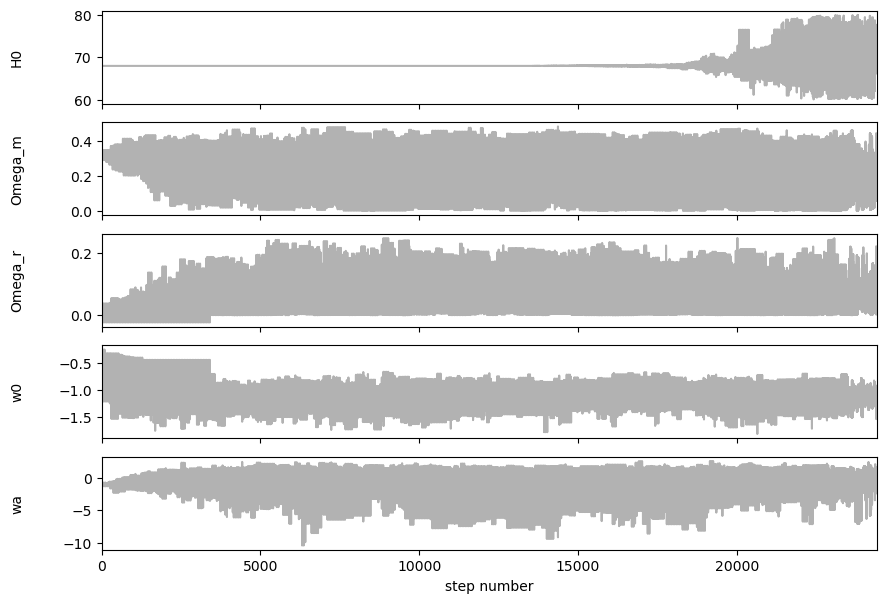

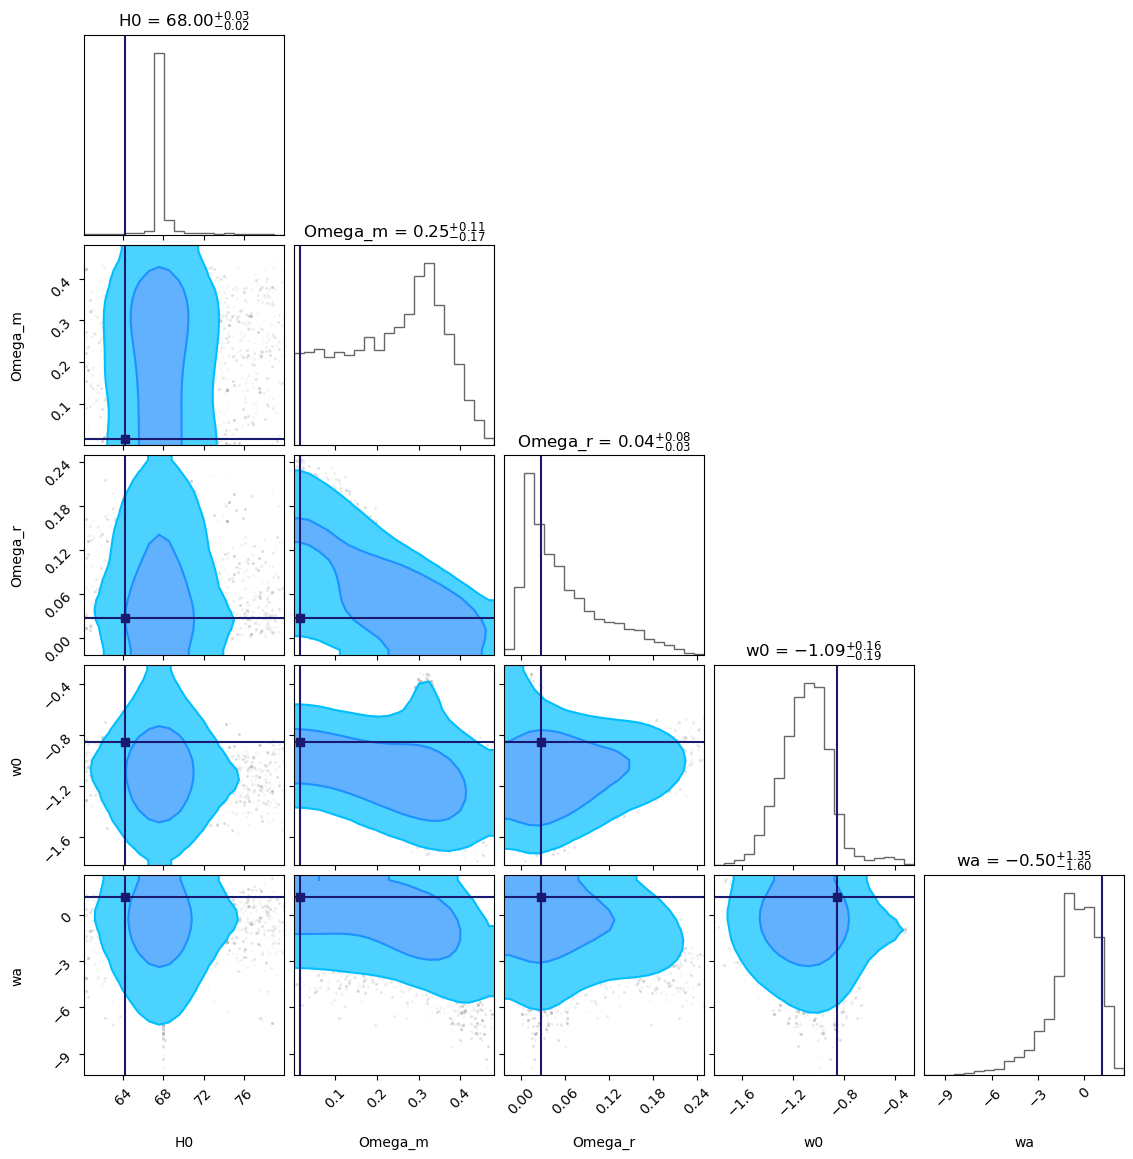

In [376]:
reshaped_samples = samples.reshape(-1, samples.shape[-1])

#i want to delete all the reshaped_samples with H0>100 and H0<40
reshaped_samples=reshaped_samples[reshaped_samples[:,0]>60]
reshaped_samples=reshaped_samples[reshaped_samples[:,0]<80]

#plot the chains for each parameter
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["H0", "Omega_m", "Omega_r", "w0", "wa"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(reshaped_samples[:, i], "k", alpha=0.3)
    #ax.plot(reshaped_samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(reshaped_samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.show()

#'mediumvioletred'
#'hotpink', 'deeppink'

#'midnightblue'
#'deepskyblue', 'dodgerblue'

level_colors = ['deepskyblue', 'dodgerblue']

contourf_kwargs = {
    "colors": ['white', 'deepskyblue', 'dodgerblue'],  # Colors for the filled contours
    "alpha": 0.7  # Transparency of the filled contours
}
fig = corner.corner(reshaped_samples,
                    labels=labels,
                    truths=best_fit_params,
                    truth_color='midnightblue',
                    plot_contours=True,
                    fill_contours=True,
                    levels=[0.68, 0.95],
                    smooth=2.0,
                    show_titles=True,
                    title_fmt=".2f",
                    title_kwargs={"fontsize": 12},
                    hist_kwargs={"density": True, "alpha": 0.6},
                    contour_kwargs={"colors": level_colors},
                    contourf_kwargs=contourf_kwargs
                    )
    
plt.show()

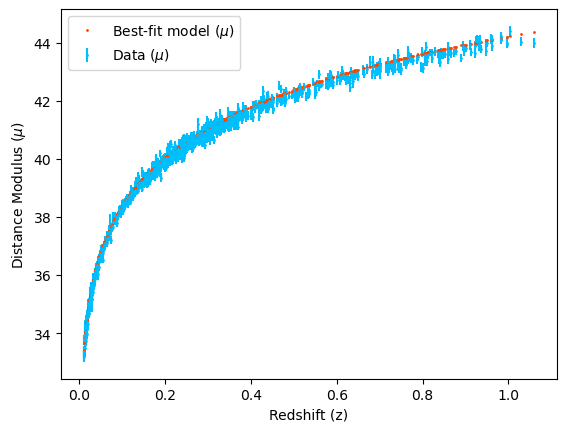

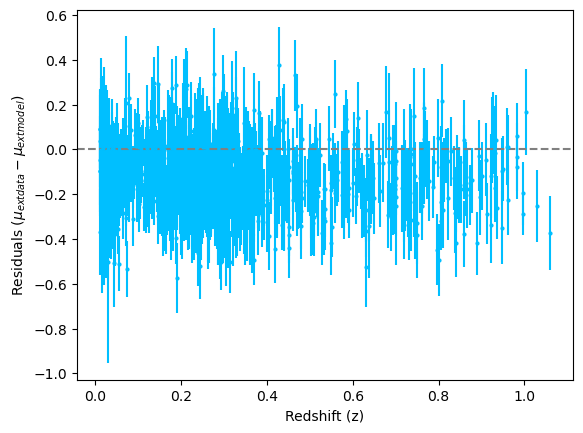

In [374]:
#plot the best fit model
best_fit_params_mcmc = np.mean(reshaped_samples, axis=0)
best_fit_params_mcmc_std = np.std(reshaped_samples, axis=0)
mu_model_best_mcmc = get_mu(z_data, *best_fit_params_mcmc)

plt.errorbar(z_data, mu_data, yerr=dmb, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data, mu_model_best_mcmc, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

#plot the residuals
residuals_mcmc = mu_data - mu_model_best_mcmc
plt.errorbar(z_data, residuals_mcmc, yerr=dmb, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

In [375]:
print("--------------------------------------")
print("Best-fit parameters (MCMC):") #with errors
print("H0:", best_fit_params_mcmc[0], "+/-", best_fit_params_mcmc_std[0])
print("Omega_m:", best_fit_params_mcmc[1], "+/-", best_fit_params_mcmc_std[1])
print("Omega_r:", best_fit_params_mcmc[2], "+/-", best_fit_params_mcmc_std[2])
print("w0:", best_fit_params_mcmc[3], "+/-", best_fit_params_mcmc_std[3])
print("wa:", best_fit_params_mcmc[4], "+/-", best_fit_params_mcmc_std[4])
print("--------------------------------------")

--------------------------------------
Best-fit parameters (MCMC):
H0: 68.33533477828372 +/- 2.4660880001564776
Omega_m: 0.2094600622610158 +/- 0.12539927666403608
Omega_r: 0.0651920337296401 +/- 0.05462072302803837
w0: -1.0988226412867326 +/- 0.1704505505116957
wa: -0.7045252133699558 +/- 1.7935517289346508
--------------------------------------
